In [1]:
import optuna
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import GEMA
from GEMA import Map, classification
from src import workflow as wf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

training_times = []
total_times = []
n_trials = 630

def objective(trial):
    side_map = trial.suggest_int("side_map", 5, 25)
    epochs = trial.suggest_categorical("epochs", [500, 1000, 2500, 5000, 7500, 10000])
    learning_rate = trial.suggest_categorical("learning_rate", [0.01, 0.05, 0.1, 0.2, 0.3])

    print(f"Trying: side_map={side_map}, epochs={epochs}, learning_rate={learning_rate}")

    start_time = time.time()
    
    main_map = GEMA.Map(
        data_som,
        side_map,
        epochs,
        initial_lr=learning_rate,
        initial_neighbourhood=0,
        distance='euclidean',
        use_decay=False,
        presentation='random',
        weights='random'
    )

    training_time = time.time() - start_time
    training_times.append(training_time)
    
    main_classification = GEMA.Classification(main_map, data_som)

    quantization_error = main_classification.quantization_error
    topological_error = main_classification.topological_error

    score = quantization_error + topological_error

    errors.append({
        "side_map": side_map,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "quantization_error": quantization_error,
        "topological_error": topological_error
    })


    return score


2025-03-14 09:10:48.150023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 09:10:48.185704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-14 09:10:48.185733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-14 09:10:48.185755: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 09:10:48.191358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 09:10:48.192368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Oil Spill Dataset

## Import and Clean 

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)

In [3]:
data_dropped = wf.drop_missing_values_columns(data, 5)
datos_mode = wf.mode_imputation(data_dropped, 49)

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  50


In [4]:
datos_mode=datos_mode.drop(columns = [49])
data_std = wf.min_max_normalization(datos_mode)
target = data[49].values
label_names={0:'Not_spiled', 1:'Spiled'}
data_som=data_std.to_numpy()
data_som.shape

(937, 49)

## Grid Search

In [5]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-12 09:18:11,133] A new study created in memory with name: no-name-7def5c08-2f80-4e2f-9d81-f97947e247be


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=24, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:12,661] Trial 0 finished with value: 0.8655393810032017 and parameters: {'side_map': 24, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 0 with value: 0.8655393810032017.


Trying: side_map=22, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:14,443] Trial 1 finished with value: 0.7883773852721452 and parameters: {'side_map': 22, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 1 with value: 0.7883773852721452.


Trying: side_map=5, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:15,604] Trial 2 finished with value: 0.8180452294557099 and parameters: {'side_map': 5, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 1 with value: 0.7883773852721452.


Trying: side_map=15, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:16,781] Trial 3 finished with value: 0.8443225720384204 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 1 with value: 0.7883773852721452.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:19,452] Trial 4 finished with value: 0.5949544717182498 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=25, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:24,052] Trial 5 finished with value: 0.6105352187833512 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=10, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:25,535] Trial 6 finished with value: 0.6869544717182496 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:26,793] Trial 7 finished with value: 0.8489176200640342 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=7, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:28,176] Trial 8 finished with value: 0.7240146851654214 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=10, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:30,210] Trial 9 finished with value: 0.6507627321237993 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 4 with value: 0.5949544717182498.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:33,944] Trial 10 finished with value: 0.5695381536819637 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 10 with value: 0.5695381536819637.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:37,668] Trial 11 finished with value: 0.5613535112059764 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 11 with value: 0.5613535112059764.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:41,429] Trial 12 finished with value: 0.5578661259338313 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 12 with value: 0.5578661259338313.


Trying: side_map=19, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:44,558] Trial 13 finished with value: 0.7044278335112059 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 12 with value: 0.5578661259338313.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:48,063] Trial 14 finished with value: 0.557743340448239 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:51,349] Trial 15 finished with value: 0.5819783884738527 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=13, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:53,313] Trial 16 finished with value: 0.757891803628602 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=22, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:18:58,466] Trial 17 finished with value: 0.5969497545357525 and parameters: {'side_map': 22, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:03,323] Trial 18 finished with value: 0.594851462113127 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:06,732] Trial 19 finished with value: 0.5728681536819638 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=22, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:10,827] Trial 20 finished with value: 0.6243206083244398 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:14,643] Trial 21 finished with value: 0.5734678975453575 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:21,238] Trial 22 finished with value: 0.5874845357524013 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:26,023] Trial 23 finished with value: 0.5622789114194238 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:31,987] Trial 24 finished with value: 0.6129325933831375 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=18, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:33,699] Trial 25 finished with value: 2.010455880469584 and parameters: {'side_map': 18, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=23, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:38,094] Trial 26 finished with value: 0.6873330309498399 and parameters: {'side_map': 23, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=14, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:40,894] Trial 27 finished with value: 0.5796703094983991 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:45,402] Trial 28 finished with value: 0.588488879402348 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=25, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:48,198] Trial 29 finished with value: 0.778949871931697 and parameters: {'side_map': 25, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=20, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:50,026] Trial 30 finished with value: 0.8547737139807898 and parameters: {'side_map': 20, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:54,555] Trial 31 finished with value: 0.6030988900747065 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:19:59,295] Trial 32 finished with value: 0.5678630949839915 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:05,022] Trial 33 finished with value: 0.5811029669156884 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:10,154] Trial 34 finished with value: 0.6096698292422625 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=23, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:11,953] Trial 35 finished with value: 0.9517387833511207 and parameters: {'side_map': 23, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=20, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:13,972] Trial 36 finished with value: 0.742734044823906 and parameters: {'side_map': 20, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:17,212] Trial 37 finished with value: 0.61711 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:20,988] Trial 38 finished with value: 0.6032732123799359 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=16, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:22,394] Trial 39 finished with value: 2.023004343649947 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:23,783] Trial 40 finished with value: 0.8247005442902882 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:27,364] Trial 41 finished with value: 0.6037364887940235 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:31,439] Trial 42 finished with value: 0.5610489327641409 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:35,448] Trial 43 finished with value: 0.561695218783351 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=24, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:39,776] Trial 44 finished with value: 0.6260635645677695 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:41,639] Trial 45 finished with value: 0.7079316435432231 and parameters: {'side_map': 21, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=23, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:44,375] Trial 46 finished with value: 0.675108537886873 and parameters: {'side_map': 23, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=20, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:47,512] Trial 47 finished with value: 0.5966501067235859 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=6, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:50,100] Trial 48 finished with value: 0.7803756563500532 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=19, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:53,793] Trial 49 finished with value: 0.5954776307363927 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=22, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:55,211] Trial 50 finished with value: 0.8810004909284952 and parameters: {'side_map': 22, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:20:59,149] Trial 51 finished with value: 0.5747609605122732 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:02,947] Trial 52 finished with value: 0.6038530522945571 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 14 with value: 0.557743340448239.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:06,567] Trial 53 finished with value: 0.5366747705442902 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:11,251] Trial 54 finished with value: 0.5760945570971184 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:15,441] Trial 55 finished with value: 0.5640635325506937 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=22, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:19,908] Trial 56 finished with value: 0.7238213233724654 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:22,491] Trial 57 finished with value: 0.6437936179295624 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:26,303] Trial 58 finished with value: 0.5545812913553896 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:29,112] Trial 59 finished with value: 0.6975378228388474 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:32,938] Trial 60 finished with value: 0.5754222091782284 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:37,059] Trial 61 finished with value: 0.5556522198505869 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:40,492] Trial 62 finished with value: 0.5889004589114194 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:44,567] Trial 63 finished with value: 0.5456024866595517 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:48,575] Trial 64 finished with value: 0.6072315261472786 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:52,439] Trial 65 finished with value: 0.5626396691568837 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:53,904] Trial 66 finished with value: 0.8579298078975454 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:58,145] Trial 67 finished with value: 0.5807400106723587 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:21:59,928] Trial 68 finished with value: 0.9941733191035218 and parameters: {'side_map': 20, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:03,494] Trial 69 finished with value: 0.5546388367129136 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:06,557] Trial 70 finished with value: 0.6017830096051227 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:09,520] Trial 71 finished with value: 0.6035910138740662 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:13,655] Trial 72 finished with value: 0.5560447278548559 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:16,830] Trial 73 finished with value: 0.573129295624333 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:20,448] Trial 74 finished with value: 0.5934422518676628 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=14, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:21,945] Trial 75 finished with value: 0.8207668836712912 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:25,501] Trial 76 finished with value: 0.5907184845250801 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:28,128] Trial 77 finished with value: 0.6409501173959445 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:30,296] Trial 78 finished with value: 0.654255560298826 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:33,881] Trial 79 finished with value: 0.5543976093916756 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:37,079] Trial 80 finished with value: 0.5879820704375667 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:40,458] Trial 81 finished with value: 0.5873868729989328 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:44,015] Trial 82 finished with value: 0.5782097331910352 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:47,728] Trial 83 finished with value: 0.565333500533618 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:50,492] Trial 84 finished with value: 0.5819588367129136 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:51,775] Trial 85 finished with value: 0.8368130309498399 and parameters: {'side_map': 18, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:55,529] Trial 86 finished with value: 0.5935067129135538 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:22:58,908] Trial 87 finished with value: 0.5592521344717183 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=15, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:00,870] Trial 88 finished with value: 0.6787001173959445 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:04,993] Trial 89 finished with value: 0.5836594450373532 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:09,053] Trial 90 finished with value: 0.7461182497331911 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:12,907] Trial 91 finished with value: 0.556693970117396 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:16,946] Trial 92 finished with value: 0.5780898826040555 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:20,599] Trial 93 finished with value: 0.5678976414087513 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:24,495] Trial 94 finished with value: 0.5532510565635006 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:27,823] Trial 95 finished with value: 0.5740136712913555 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:31,797] Trial 96 finished with value: 0.5986211632870864 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=13, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:33,208] Trial 97 finished with value: 0.8601154749199573 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:36,589] Trial 98 finished with value: 0.55895848452508 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:40,358] Trial 99 finished with value: 0.6568807150480256 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=15, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:42,669] Trial 100 finished with value: 0.6244164140875132 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:46,605] Trial 101 finished with value: 0.5978166382070438 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:50,162] Trial 102 finished with value: 0.5609179722518677 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:54,354] Trial 103 finished with value: 0.5948273745997865 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:23:58,219] Trial 104 finished with value: 0.6028909071504802 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=20, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:01,544] Trial 105 finished with value: 0.6305684418356456 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:05,038] Trial 106 finished with value: 0.5547604909284953 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 53 with value: 0.5366747705442902.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:08,493] Trial 107 finished with value: 0.522388665955176 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:12,443] Trial 108 finished with value: 0.5670727534685165 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:13,664] Trial 109 finished with value: 0.8026170864461045 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:16,890] Trial 110 finished with value: 0.5518845037353255 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:19,956] Trial 111 finished with value: 0.5444213980789755 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:23,148] Trial 112 finished with value: 0.5941307470651014 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:26,266] Trial 113 finished with value: 0.552416371398079 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:29,321] Trial 114 finished with value: 0.5583336179295625 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:32,711] Trial 115 finished with value: 0.595960416221985 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:35,684] Trial 116 finished with value: 0.562661985058698 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:37,283] Trial 117 finished with value: 0.721655795090715 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:40,804] Trial 118 finished with value: 0.630245485592316 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:44,055] Trial 119 finished with value: 0.7070199786552829 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:47,235] Trial 120 finished with value: 0.5794181856990395 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:50,543] Trial 121 finished with value: 0.5620191889007471 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:53,933] Trial 122 finished with value: 0.5628001494130203 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:24:57,200] Trial 123 finished with value: 0.5522686019210246 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:00,430] Trial 124 finished with value: 0.5603265955176094 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:03,912] Trial 125 finished with value: 0.5546221451440768 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:07,084] Trial 126 finished with value: 0.56346310565635 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:10,101] Trial 127 finished with value: 0.5824962113127001 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:11,452] Trial 128 finished with value: 0.7714478228388475 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:14,658] Trial 129 finished with value: 0.5404071504802561 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:17,828] Trial 130 finished with value: 0.5799127534685165 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:21,000] Trial 131 finished with value: 0.5578583884738528 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:24,378] Trial 132 finished with value: 0.5691318676627535 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:27,575] Trial 133 finished with value: 0.5901850053361792 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:30,604] Trial 134 finished with value: 0.6170949092849519 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:32,999] Trial 135 finished with value: 0.6410929989327642 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:36,349] Trial 136 finished with value: 0.5336052934898612 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:40,587] Trial 137 finished with value: 0.5761917716115261 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:44,666] Trial 138 finished with value: 0.5520794663820704 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:46,240] Trial 139 finished with value: 0.8267844503735327 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:50,727] Trial 140 finished with value: 0.5559276734258272 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:54,788] Trial 141 finished with value: 0.5751852614727855 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:25:58,506] Trial 142 finished with value: 0.5836684631803628 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:02,103] Trial 143 finished with value: 0.5810719423692636 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:05,458] Trial 144 finished with value: 0.5935028922091783 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:09,246] Trial 145 finished with value: 0.5613225933831376 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:13,143] Trial 146 finished with value: 0.7112026360725721 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:15,171] Trial 147 finished with value: 0.7143327748132337 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:18,673] Trial 148 finished with value: 0.5922131696905015 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:22,264] Trial 149 finished with value: 0.5828471931696906 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:26,332] Trial 150 finished with value: 0.6112731696905016 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:30,269] Trial 151 finished with value: 0.5821143649946638 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:34,201] Trial 152 finished with value: 0.5919907363927428 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:38,265] Trial 153 finished with value: 0.544968879402348 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:41,730] Trial 154 finished with value: 0.6099365314834578 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:45,698] Trial 155 finished with value: 0.6088672785485593 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:49,522] Trial 156 finished with value: 0.5487489967982925 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:53,252] Trial 157 finished with value: 0.5962608537886873 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:54,783] Trial 158 finished with value: 0.844674076840982 and parameters: {'side_map': 17, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:26:58,404] Trial 159 finished with value: 0.6290518036286019 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:01,901] Trial 160 finished with value: 0.5597567022411953 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:05,400] Trial 161 finished with value: 0.575263916755603 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:08,743] Trial 162 finished with value: 0.5484107043756671 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:12,073] Trial 163 finished with value: 0.5890643649946639 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:15,675] Trial 164 finished with value: 0.6078443116328709 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:19,071] Trial 165 finished with value: 0.5874982817502667 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:22,767] Trial 166 finished with value: 0.5697893916755603 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:25,057] Trial 167 finished with value: 0.6246377374599787 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:28,338] Trial 168 finished with value: 0.5921111953041622 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:31,846] Trial 169 finished with value: 0.5984585592315901 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:35,280] Trial 170 finished with value: 0.6027631270010672 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:38,644] Trial 171 finished with value: 0.573439637139808 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:41,937] Trial 172 finished with value: 0.5933179402347919 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:45,237] Trial 173 finished with value: 0.5955165314834578 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:48,475] Trial 174 finished with value: 0.5708561259338314 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:51,911] Trial 175 finished with value: 0.5834648879402348 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:53,280] Trial 176 finished with value: 0.7932367235859126 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:56,589] Trial 177 finished with value: 0.5891334364994665 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:27:59,805] Trial 178 finished with value: 0.5322204055496265 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:03,173] Trial 179 finished with value: 0.7200997011739595 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:06,381] Trial 180 finished with value: 0.597608537886873 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:09,684] Trial 181 finished with value: 0.565525848452508 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:12,952] Trial 182 finished with value: 0.5682610138740661 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:16,360] Trial 183 finished with value: 0.5989620277481323 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:19,526] Trial 184 finished with value: 0.593711696905016 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:22,702] Trial 185 finished with value: 0.5655811846318036 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:24,423] Trial 186 finished with value: 0.6497494663820704 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:28,052] Trial 187 finished with value: 0.5703278655282817 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:31,654] Trial 188 finished with value: 0.576659530416222 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:35,492] Trial 189 finished with value: 0.6066688260405549 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:38,869] Trial 190 finished with value: 0.5678925933831377 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:42,919] Trial 191 finished with value: 0.593500576307364 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:46,614] Trial 192 finished with value: 0.5869699359658485 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:50,290] Trial 193 finished with value: 0.5897092315901814 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=5, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:53,384] Trial 194 finished with value: 0.8995698719316969 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:57,315] Trial 195 finished with value: 0.5921993916755603 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:28:58,858] Trial 196 finished with value: 0.7932434791889007 and parameters: {'side_map': 18, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:02,817] Trial 197 finished with value: 0.5462471611526147 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:06,538] Trial 198 finished with value: 0.579930992529349 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:10,344] Trial 199 finished with value: 0.5619665635005336 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:14,179] Trial 200 finished with value: 0.5709687513340449 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:17,997] Trial 201 finished with value: 0.6097789434364994 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:22,039] Trial 202 finished with value: 0.5620225720384205 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:27,574] Trial 203 finished with value: 0.5557408537886873 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:32,589] Trial 204 finished with value: 0.6101770544290288 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:37,267] Trial 205 finished with value: 0.5877548239060832 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:42,958] Trial 206 finished with value: 0.6017841088580577 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:45,997] Trial 207 finished with value: 0.6508815261472786 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:50,580] Trial 208 finished with value: 0.5700418676627534 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:54,561] Trial 209 finished with value: 0.5940643543223052 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:29:59,429] Trial 210 finished with value: 0.5948095090715048 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:05,154] Trial 211 finished with value: 0.5970301280683031 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:11,036] Trial 212 finished with value: 0.5616318463180363 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:16,517] Trial 213 finished with value: 0.5655267449306296 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:23,742] Trial 214 finished with value: 0.5834327748132337 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:30,027] Trial 215 finished with value: 0.5619006830309499 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=23, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:37,078] Trial 216 finished with value: 0.5659665635005336 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:38,932] Trial 217 finished with value: 0.8636393276414087 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:43,989] Trial 218 finished with value: 0.6052393703308431 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:49,020] Trial 219 finished with value: 0.5572062540021345 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:54,003] Trial 220 finished with value: 0.6284074599786553 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:30:58,009] Trial 221 finished with value: 0.5507402668089648 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:02,294] Trial 222 finished with value: 0.6958332337246531 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:07,395] Trial 223 finished with value: 0.5833742902881537 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:13,832] Trial 224 finished with value: 0.5904490501600854 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:18,970] Trial 225 finished with value: 0.6821037673425827 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:22,807] Trial 226 finished with value: 0.5695793810032017 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:24,351] Trial 227 finished with value: 0.6902404802561366 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:27,980] Trial 228 finished with value: 0.6239644717182498 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:31,532] Trial 229 finished with value: 0.6035729455709712 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:34,476] Trial 230 finished with value: 0.6302208324439701 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:37,601] Trial 231 finished with value: 0.546803916755603 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:40,322] Trial 232 finished with value: 0.5694279402347919 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:43,667] Trial 233 finished with value: 0.5709531270010672 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:46,708] Trial 234 finished with value: 0.5977259124866596 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:49,558] Trial 235 finished with value: 0.5502018036286019 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:52,337] Trial 236 finished with value: 0.5623451120597651 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:55,525] Trial 237 finished with value: 0.5597097972251868 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:31:58,103] Trial 238 finished with value: 0.6323082497331911 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:01,043] Trial 239 finished with value: 0.5632970651013873 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:02,457] Trial 240 finished with value: 0.7303881750266807 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:05,609] Trial 241 finished with value: 0.5668089434364995 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:08,884] Trial 242 finished with value: 0.5801666915688367 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:12,775] Trial 243 finished with value: 0.5656022945570971 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:15,880] Trial 244 finished with value: 0.5897437139807898 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:19,035] Trial 245 finished with value: 0.621573628601921 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:22,432] Trial 246 finished with value: 0.5509331696905015 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:25,247] Trial 247 finished with value: 0.6234373959445036 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:28,492] Trial 248 finished with value: 0.5620270117395945 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:31,950] Trial 249 finished with value: 0.5824488900747065 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:34,122] Trial 250 finished with value: 0.6356278121664888 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:37,371] Trial 251 finished with value: 0.5881016862326574 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:40,641] Trial 252 finished with value: 0.5708061686232657 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:43,538] Trial 253 finished with value: 0.5855602027748132 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:46,564] Trial 254 finished with value: 0.5978289220917823 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=6, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:49,179] Trial 255 finished with value: 0.7953785805763074 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:52,385] Trial 256 finished with value: 0.5515737673425827 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:55,928] Trial 257 finished with value: 0.5672521131270011 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:57,167] Trial 258 finished with value: 0.8379278975453575 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:32:59,959] Trial 259 finished with value: 0.5504634364994665 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:03,203] Trial 260 finished with value: 0.5546949626467449 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:06,429] Trial 261 finished with value: 0.6866351334044825 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:09,175] Trial 262 finished with value: 0.5955159551760939 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:11,854] Trial 263 finished with value: 0.587317075773746 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:13,469] Trial 264 finished with value: 0.6431072251867662 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:16,572] Trial 265 finished with value: 0.6088883137673424 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:19,697] Trial 266 finished with value: 0.5836478868729988 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:22,695] Trial 267 finished with value: 0.6321745570971185 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:25,935] Trial 268 finished with value: 0.546692689434365 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:29,154] Trial 269 finished with value: 0.605926318036286 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:32,505] Trial 270 finished with value: 0.597803393810032 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:35,157] Trial 271 finished with value: 0.6017789541088581 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:38,460] Trial 272 finished with value: 0.5580469263607257 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=24, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:39,941] Trial 273 finished with value: 0.8479901173959444 and parameters: {'side_map': 24, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:43,455] Trial 274 finished with value: 0.5606672998932765 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:46,698] Trial 275 finished with value: 0.5759995517609392 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:49,904] Trial 276 finished with value: 0.5280710138740662 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:53,093] Trial 277 finished with value: 0.5582937353255069 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:33:57,098] Trial 278 finished with value: 0.5745398932764141 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:01,750] Trial 279 finished with value: 0.5904883778014941 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:04,777] Trial 280 finished with value: 0.5902659658484525 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:09,716] Trial 281 finished with value: 0.571362113127001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:15,103] Trial 282 finished with value: 0.5266733511205977 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:20,502] Trial 283 finished with value: 0.5574828388473853 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:25,288] Trial 284 finished with value: 0.581774386339381 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:29,129] Trial 285 finished with value: 0.6174410565635005 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:33,815] Trial 286 finished with value: 0.5869793810032017 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:38,727] Trial 287 finished with value: 0.582985667022412 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:40,492] Trial 288 finished with value: 2.0479918143009606 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:45,254] Trial 289 finished with value: 0.554929423692636 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:49,440] Trial 290 finished with value: 0.5743142689434366 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=25, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:54,892] Trial 291 finished with value: 0.5839278868729989 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:34:58,403] Trial 292 finished with value: 0.587799423692636 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:01,675] Trial 293 finished with value: 0.6060532977588047 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:03,484] Trial 294 finished with value: 0.7170389647812166 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:06,928] Trial 295 finished with value: 0.5561619103521878 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:10,554] Trial 296 finished with value: 0.5627361472785486 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:14,485] Trial 297 finished with value: 0.5846346531483458 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:17,608] Trial 298 finished with value: 0.6253583991462113 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:20,334] Trial 299 finished with value: 0.5939068623265742 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:23,950] Trial 300 finished with value: 0.5286212700106724 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:27,352] Trial 301 finished with value: 0.5761676840981858 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:30,313] Trial 302 finished with value: 0.6370012379935965 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:33,718] Trial 303 finished with value: 0.5959611312700107 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:35,084] Trial 304 finished with value: 0.8305552934898612 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:38,515] Trial 305 finished with value: 0.5684653468516542 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:41,732] Trial 306 finished with value: 0.5825547385272145 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:45,221] Trial 307 finished with value: 0.6007177374599787 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:48,463] Trial 308 finished with value: 0.5425430949839916 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:51,683] Trial 309 finished with value: 0.5551397331910353 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:53,761] Trial 310 finished with value: 0.6540107684098185 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:56,515] Trial 311 finished with value: 0.5603972678762006 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:35:59,222] Trial 312 finished with value: 0.5816449519743863 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:01,981] Trial 313 finished with value: 0.5910243436499466 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:05,199] Trial 314 finished with value: 0.602993810032017 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:08,590] Trial 315 finished with value: 0.5924480256136606 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:11,529] Trial 316 finished with value: 0.5736993810032017 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:12,833] Trial 317 finished with value: 2.047126157950907 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:16,469] Trial 318 finished with value: 0.5663043863393811 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:19,572] Trial 319 finished with value: 0.587407363927428 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:23,907] Trial 320 finished with value: 0.5779905976520812 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:27,492] Trial 321 finished with value: 0.558830416221985 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:30,879] Trial 322 finished with value: 0.5787706723585913 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:34,803] Trial 323 finished with value: 0.6141501067235859 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:36,565] Trial 324 finished with value: 0.6790659124866595 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:39,574] Trial 325 finished with value: 0.5663428922091782 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:43,834] Trial 326 finished with value: 0.5794370864461046 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:48,005] Trial 327 finished with value: 0.622634023479189 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:54,541] Trial 328 finished with value: 0.5885280042689435 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:36:58,554] Trial 329 finished with value: 0.5688695090715048 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:02,750] Trial 330 finished with value: 0.5852866702241195 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:07,343] Trial 331 finished with value: 0.5750641195304163 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:08,700] Trial 332 finished with value: 0.8358848772678763 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:11,500] Trial 333 finished with value: 0.5691777054429028 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:16,669] Trial 334 finished with value: 0.5922991462113126 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:21,390] Trial 335 finished with value: 0.5722703735325507 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:25,649] Trial 336 finished with value: 0.5867688367129136 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:29,466] Trial 337 finished with value: 0.5470336606189967 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:32,253] Trial 338 finished with value: 0.6238508644610459 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:36,144] Trial 339 finished with value: 0.5845330202774813 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:39,815] Trial 340 finished with value: 0.5524744397011739 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:43,075] Trial 341 finished with value: 0.5748135432230522 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:46,892] Trial 342 finished with value: 0.732116499466382 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:51,062] Trial 343 finished with value: 0.5741560192102455 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:56,587] Trial 344 finished with value: 0.6090961045891141 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:37:59,960] Trial 345 finished with value: 0.5575867982924226 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:03,535] Trial 346 finished with value: 0.5325394130202774 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:04,986] Trial 347 finished with value: 0.7728662966915688 and parameters: {'side_map': 10, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:08,530] Trial 348 finished with value: 0.6364799359658485 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:11,688] Trial 349 finished with value: 0.551266840981857 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:14,672] Trial 350 finished with value: 0.6330766382070437 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:17,390] Trial 351 finished with value: 0.6077298612593383 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:20,190] Trial 352 finished with value: 0.6125394023479189 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:21,694] Trial 353 finished with value: 0.6345033511205976 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:25,070] Trial 354 finished with value: 0.6888079509071504 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:27,827] Trial 355 finished with value: 0.5764188687299893 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=23, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:32,239] Trial 356 finished with value: 0.5802599679829241 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:35,847] Trial 357 finished with value: 0.5891130096051227 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:39,876] Trial 358 finished with value: 0.5733807577374599 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:43,049] Trial 359 finished with value: 0.6150040554962647 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:46,960] Trial 360 finished with value: 0.6006823906083244 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:50,738] Trial 361 finished with value: 0.5645693169690502 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:52,227] Trial 362 finished with value: 0.7376082604055496 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:56,664] Trial 363 finished with value: 0.5718573425827107 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:38:59,828] Trial 364 finished with value: 0.6743814727854855 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:03,668] Trial 365 finished with value: 0.5643416862326573 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:07,543] Trial 366 finished with value: 0.5958896264674494 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:11,310] Trial 367 finished with value: 0.5938213553895411 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:14,196] Trial 368 finished with value: 0.6179050693703309 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:18,029] Trial 369 finished with value: 0.551095667022412 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:21,760] Trial 370 finished with value: 0.5514289434364994 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:25,337] Trial 371 finished with value: 0.7211726040554963 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:29,082] Trial 372 finished with value: 0.6036929562433297 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:32,973] Trial 373 finished with value: 0.5827332017075775 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:36,870] Trial 374 finished with value: 0.5532317075773746 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:38,742] Trial 375 finished with value: 0.9127300533617929 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=6, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:41,874] Trial 376 finished with value: 0.678732924226254 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:45,943] Trial 377 finished with value: 0.568440522945571 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:49,603] Trial 378 finished with value: 0.557155901814301 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:53,412] Trial 379 finished with value: 0.571489060832444 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=24, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:39:59,505] Trial 380 finished with value: 0.6757847385272145 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:03,343] Trial 381 finished with value: 0.5534864674493063 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:08,010] Trial 382 finished with value: 0.5863447385272145 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:11,077] Trial 383 finished with value: 0.6279589220917823 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:13,633] Trial 384 finished with value: 0.7035144183564568 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:17,228] Trial 385 finished with value: 0.5918564354322305 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:20,265] Trial 386 finished with value: 0.5811031483457844 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:23,602] Trial 387 finished with value: 0.543084962646745 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:27,157] Trial 388 finished with value: 0.571990704375667 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:28,628] Trial 389 finished with value: 0.7962741408751335 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:31,675] Trial 390 finished with value: 0.5908900747065101 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:34,984] Trial 391 finished with value: 0.5474795517609392 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:38,046] Trial 392 finished with value: 0.6019031056563501 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:41,074] Trial 393 finished with value: 0.5429438527214515 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:44,424] Trial 394 finished with value: 0.5646045357524013 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:47,419] Trial 395 finished with value: 0.7378571718249732 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:49,488] Trial 396 finished with value: 0.6691211953041623 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:52,577] Trial 397 finished with value: 0.5849707470651014 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:55,720] Trial 398 finished with value: 0.5698611953041622 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:40:58,209] Trial 399 finished with value: 0.6073472785485593 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:01,114] Trial 400 finished with value: 0.5969696584845252 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:04,352] Trial 401 finished with value: 0.6271437459978656 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:07,389] Trial 402 finished with value: 0.5748007790821772 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:10,576] Trial 403 finished with value: 0.5647608537886873 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:13,705] Trial 404 finished with value: 0.5786937886872999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:14,910] Trial 405 finished with value: 0.8861104375667023 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:18,105] Trial 406 finished with value: 0.6127634898612593 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:21,605] Trial 407 finished with value: 0.6774295090715048 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:25,154] Trial 408 finished with value: 0.5962850800426894 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:28,862] Trial 409 finished with value: 0.5547177161152614 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:30,830] Trial 410 finished with value: 0.6552015688367128 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:34,210] Trial 411 finished with value: 0.6078491248665955 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:37,706] Trial 412 finished with value: 0.5874700853788687 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:40,909] Trial 413 finished with value: 0.5681310565635005 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:44,901] Trial 414 finished with value: 0.5904736072572039 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:48,449] Trial 415 finished with value: 0.5773423692636073 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:51,736] Trial 416 finished with value: 0.6268721878335112 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:53,225] Trial 417 finished with value: 0.7395345570971184 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:41:56,508] Trial 418 finished with value: 0.5701614727854857 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:00,795] Trial 419 finished with value: 0.5570891035218783 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:04,263] Trial 420 finished with value: 0.5828326574172892 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:07,155] Trial 421 finished with value: 0.6012686125933832 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:10,014] Trial 422 finished with value: 0.5907668943436499 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:12,040] Trial 423 finished with value: 0.7475900960512272 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:14,938] Trial 424 finished with value: 0.5633618569903949 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:17,595] Trial 425 finished with value: 0.6100857203842049 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:20,658] Trial 426 finished with value: 0.5403805229455709 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:23,223] Trial 427 finished with value: 0.5923660725720384 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:26,392] Trial 428 finished with value: 0.5734948772678762 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:29,818] Trial 429 finished with value: 0.5930345250800427 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:32,906] Trial 430 finished with value: 0.57447310565635 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:35,812] Trial 431 finished with value: 0.5590308644610459 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:36,905] Trial 432 finished with value: 0.8633121985058698 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:40,305] Trial 433 finished with value: 0.5753694983991462 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:43,180] Trial 434 finished with value: 0.6227612379935966 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:46,269] Trial 435 finished with value: 0.5708597865528282 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:49,090] Trial 436 finished with value: 0.5827104909284953 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:52,267] Trial 437 finished with value: 0.577919007470651 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:53,733] Trial 438 finished with value: 0.6644453681963713 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:56,625] Trial 439 finished with value: 0.5609516542155817 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:42:59,678] Trial 440 finished with value: 0.5681675880469584 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:02,724] Trial 441 finished with value: 0.5638752721451441 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:05,598] Trial 442 finished with value: 0.6004974279615795 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:08,541] Trial 443 finished with value: 0.5788850693703309 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=5, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:10,879] Trial 444 finished with value: 0.7554060832443971 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:13,694] Trial 445 finished with value: 0.5853074386339381 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:14,822] Trial 446 finished with value: 0.7851788367129134 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:17,453] Trial 447 finished with value: 0.5611761045891142 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=23, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:21,187] Trial 448 finished with value: 0.7239897865528281 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:24,238] Trial 449 finished with value: 0.5741813127001067 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:27,482] Trial 450 finished with value: 0.5693882604055496 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:29,566] Trial 451 finished with value: 0.6133081536819637 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:32,286] Trial 452 finished with value: 0.6207484098185698 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:35,171] Trial 453 finished with value: 0.5870548132337247 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:38,016] Trial 454 finished with value: 0.5414929242262541 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:40,851] Trial 455 finished with value: 0.5923502668089649 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:43,239] Trial 456 finished with value: 0.5986025933831377 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:46,022] Trial 457 finished with value: 0.5620602134471717 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:48,940] Trial 458 finished with value: 0.5712858057630736 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:51,782] Trial 459 finished with value: 0.5747379402347919 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:52,831] Trial 460 finished with value: 0.9493075773745997 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:55,783] Trial 461 finished with value: 0.5832680256136606 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:43:58,516] Trial 462 finished with value: 0.5526812486659551 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:01,445] Trial 463 finished with value: 0.5865817716115261 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:04,466] Trial 464 finished with value: 0.5950736926360727 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:05,978] Trial 465 finished with value: 0.7021424653148346 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:08,787] Trial 466 finished with value: 0.5522898185699039 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:11,753] Trial 467 finished with value: 0.5969507684098185 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:14,542] Trial 468 finished with value: 0.5719840341515474 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:17,416] Trial 469 finished with value: 0.6147927427961579 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:20,254] Trial 470 finished with value: 0.5632205869797224 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:23,329] Trial 471 finished with value: 0.5852084098185699 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:25,923] Trial 472 finished with value: 0.5363547598719316 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:28,728] Trial 473 finished with value: 0.5451716221985059 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:30,003] Trial 474 finished with value: 0.7865718356456777 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:32,651] Trial 475 finished with value: 0.5537622838847386 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:35,444] Trial 476 finished with value: 0.5747518356456777 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:38,139] Trial 477 finished with value: 0.6717373852721451 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:40,816] Trial 478 finished with value: 0.5839423159018142 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:43,517] Trial 479 finished with value: 0.531266189967983 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:46,111] Trial 480 finished with value: 0.5733422625400214 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:48,759] Trial 481 finished with value: 0.5615310565635006 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:51,310] Trial 482 finished with value: 0.6032001387406617 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:53,575] Trial 483 finished with value: 0.5771742902881537 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:55,420] Trial 484 finished with value: 0.6198039381003202 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:44:58,028] Trial 485 finished with value: 0.5876865101387407 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:00,744] Trial 486 finished with value: 0.5655228495197439 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:03,447] Trial 487 finished with value: 0.5501878441835646 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:06,123] Trial 488 finished with value: 0.5887630843116329 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:08,871] Trial 489 finished with value: 0.6696281856990395 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:09,956] Trial 490 finished with value: 0.8626414087513339 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:12,680] Trial 491 finished with value: 0.5964008537886872 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:15,238] Trial 492 finished with value: 0.5535915581643542 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:18,873] Trial 493 finished with value: 0.5845151547491996 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:21,618] Trial 494 finished with value: 0.5347754855923159 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:24,388] Trial 495 finished with value: 0.5682097331910353 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:25,756] Trial 496 finished with value: 0.6416144397011739 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:28,458] Trial 497 finished with value: 0.6298560832443971 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:31,111] Trial 498 finished with value: 0.5407991995731056 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:33,895] Trial 499 finished with value: 0.5735002241195304 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:36,487] Trial 500 finished with value: 0.5822648452508004 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:39,079] Trial 501 finished with value: 0.5638533084311633 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:41,717] Trial 502 finished with value: 0.5523625933831376 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:42,846] Trial 503 finished with value: 0.7754357844183564 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:45,569] Trial 504 finished with value: 0.7030003521878333 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:48,233] Trial 505 finished with value: 0.5785407684098186 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:50,924] Trial 506 finished with value: 0.5585145037353255 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:53,719] Trial 507 finished with value: 0.5779193276414087 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:45:56,343] Trial 508 finished with value: 0.5421576093916756 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=25, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:00,494] Trial 509 finished with value: 0.6090786872998932 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:02,332] Trial 510 finished with value: 0.6456024866595518 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:04,913] Trial 511 finished with value: 0.5862443970117396 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:07,660] Trial 512 finished with value: 0.5348233724653148 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:10,268] Trial 513 finished with value: 0.588426499466382 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:12,495] Trial 514 finished with value: 0.5885519103521878 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:15,041] Trial 515 finished with value: 0.57289 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:17,593] Trial 516 finished with value: 0.5917393169690501 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:20,232] Trial 517 finished with value: 0.642958591248666 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:22,824] Trial 518 finished with value: 0.5795619743863394 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:23,913] Trial 519 finished with value: 0.8903460512273211 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:26,612] Trial 520 finished with value: 0.5627181536819638 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:29,247] Trial 521 finished with value: 0.5595580042689434 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:32,196] Trial 522 finished with value: 0.5845771504802562 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:34,770] Trial 523 finished with value: 0.5908516435432231 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:36,111] Trial 524 finished with value: 0.7266303842049093 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:38,650] Trial 525 finished with value: 0.5408317075773745 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:41,276] Trial 526 finished with value: 0.5738664140875133 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:43,892] Trial 527 finished with value: 0.5639435432230524 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:46,414] Trial 528 finished with value: 0.5968574813233725 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:49,030] Trial 529 finished with value: 0.5401714194236926 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:51,553] Trial 530 finished with value: 0.5896857630736392 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:54,957] Trial 531 finished with value: 0.5952859551760941 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:46:59,072] Trial 532 finished with value: 0.5711540981856991 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:02,918] Trial 533 finished with value: 0.7208637353255068 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:04,352] Trial 534 finished with value: 0.8021254749199572 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:08,082] Trial 535 finished with value: 0.5589820384204909 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:11,545] Trial 536 finished with value: 0.5894429775880469 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:14,608] Trial 537 finished with value: 0.585195090715048 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:17,516] Trial 538 finished with value: 0.5762016648879402 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:20,271] Trial 539 finished with value: 0.6141376307363927 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:23,067] Trial 540 finished with value: 0.5740217929562433 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:25,970] Trial 541 finished with value: 0.5438296691568837 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:27,796] Trial 542 finished with value: 0.5977879188900747 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:30,520] Trial 543 finished with value: 0.6569867235859125 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:33,422] Trial 544 finished with value: 0.647902924226254 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:37,006] Trial 545 finished with value: 0.5702253895410886 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:40,165] Trial 546 finished with value: 0.5414937993596585 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:43,442] Trial 547 finished with value: 0.55477696905016 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:46,405] Trial 548 finished with value: 0.5568123479188901 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:47,479] Trial 549 finished with value: 0.7874365208110992 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:50,249] Trial 550 finished with value: 0.5853590501600854 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:52,995] Trial 551 finished with value: 0.578124151547492 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:55,666] Trial 552 finished with value: 0.5681280042689434 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:58,418] Trial 553 finished with value: 0.5958448239060832 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:47:59,892] Trial 554 finished with value: 0.7044601387406617 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:02,841] Trial 555 finished with value: 0.5727662433297759 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:05,661] Trial 556 finished with value: 0.5653492636072572 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:08,658] Trial 557 finished with value: 0.5564555176093917 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:11,366] Trial 558 finished with value: 0.6345596798292422 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:14,014] Trial 559 finished with value: 0.7165230629669157 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:16,903] Trial 560 finished with value: 0.5668413233724653 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:19,541] Trial 561 finished with value: 0.6016329028815368 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:22,064] Trial 562 finished with value: 0.5976462006403416 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:23,279] Trial 563 finished with value: 0.7838336072572039 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:25,983] Trial 564 finished with value: 0.6306664674493063 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:28,561] Trial 565 finished with value: 0.5571982283884739 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:31,417] Trial 566 finished with value: 0.5411390181430096 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:34,631] Trial 567 finished with value: 0.5489274813233724 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:37,348] Trial 568 finished with value: 0.5601898612593383 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:39,154] Trial 569 finished with value: 0.6146234151547492 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:41,938] Trial 570 finished with value: 0.5672076840981857 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:44,619] Trial 571 finished with value: 0.6417767769477054 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:47,254] Trial 572 finished with value: 0.569463628601921 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:50,048] Trial 573 finished with value: 0.5570713980789754 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:52,277] Trial 574 finished with value: 0.6319005442902881 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:55,509] Trial 575 finished with value: 0.5702672465314835 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:56,674] Trial 576 finished with value: 0.7879046211312699 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:48:59,821] Trial 577 finished with value: 0.5393961152614728 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:03,048] Trial 578 finished with value: 0.5529700853788687 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:06,453] Trial 579 finished with value: 0.5826982283884738 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:09,727] Trial 580 finished with value: 0.5751196905016008 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:13,102] Trial 581 finished with value: 0.5624369903948773 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:14,912] Trial 582 finished with value: 0.6369282283884737 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:18,382] Trial 583 finished with value: 0.5554252828175027 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:23,245] Trial 584 finished with value: 0.581256499466382 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:28,409] Trial 585 finished with value: 0.5735959765208111 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:31,896] Trial 586 finished with value: 0.5592217929562433 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:35,345] Trial 587 finished with value: 0.7141621131270011 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:39,101] Trial 588 finished with value: 0.5760339594450374 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:43,776] Trial 589 finished with value: 0.5527329135538954 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:45,248] Trial 590 finished with value: 0.762119007470651 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:48,558] Trial 591 finished with value: 0.6188026467449306 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:51,583] Trial 592 finished with value: 0.5526841088580576 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:55,007] Trial 593 finished with value: 0.5687084631803628 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:49:57,946] Trial 594 finished with value: 0.5854245464247599 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:00,845] Trial 595 finished with value: 0.5816081536819637 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:04,345] Trial 596 finished with value: 0.6079286446104588 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:06,484] Trial 597 finished with value: 0.6069971824973319 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:09,930] Trial 598 finished with value: 0.5367376414087514 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:13,522] Trial 599 finished with value: 0.5945278014941302 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:16,348] Trial 600 finished with value: 0.6980443009605124 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:20,688] Trial 601 finished with value: 0.5828004802561366 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:26,125] Trial 602 finished with value: 0.5787495517609391 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:30,103] Trial 603 finished with value: 0.585349530416222 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:33,614] Trial 604 finished with value: 0.5346943543223052 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:35,269] Trial 605 finished with value: 0.8002207150480255 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:38,363] Trial 606 finished with value: 0.5779672038420491 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:41,470] Trial 607 finished with value: 0.5655324653148346 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:45,172] Trial 608 finished with value: 0.5623474386339381 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:50,471] Trial 609 finished with value: 0.575759060832444 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:54,731] Trial 610 finished with value: 0.5749337139807897 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:50:58,333] Trial 611 finished with value: 0.700524023479189 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:02,591] Trial 612 finished with value: 0.5592967235859125 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:06,417] Trial 613 finished with value: 0.6774994770544289 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:09,491] Trial 614 finished with value: 0.5813786872998933 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:12,443] Trial 615 finished with value: 0.6066204482390608 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:16,074] Trial 616 finished with value: 0.5783362860192103 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:20,140] Trial 617 finished with value: 0.5669582604055496 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:21,688] Trial 618 finished with value: 0.7568268836712914 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:26,240] Trial 619 finished with value: 0.6051017822838847 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:29,350] Trial 620 finished with value: 0.5752998292422625 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:33,097] Trial 621 finished with value: 0.5736614194236926 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:36,878] Trial 622 finished with value: 0.569807203842049 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:39,907] Trial 623 finished with value: 0.575025325506937 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:43,248] Trial 624 finished with value: 0.5810308751334045 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=16, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:45,752] Trial 625 finished with value: 0.693677363927428 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:48,948] Trial 626 finished with value: 0.568516478121665 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:52,760] Trial 627 finished with value: 0.5780071077908218 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=15, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:55,919] Trial 628 finished with value: 0.5949779829242262 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/937 [00:00<?, ?it/s]

[I 2025-03-12 09:51:59,671] Trial 629 finished with value: 0.5954274386339382 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 107 with value: 0.522388665955176.


In [6]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")


Mejores hiperparámetros: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}

Training Time Statistics:
Median Training Time: 2.09 seconds
Standard Deviation: 0.83 seconds
Total Training Time: 42 minutes 16 seconds


## Sensitivity Analysis

In [7]:
errors_df = pd.DataFrame(errors)

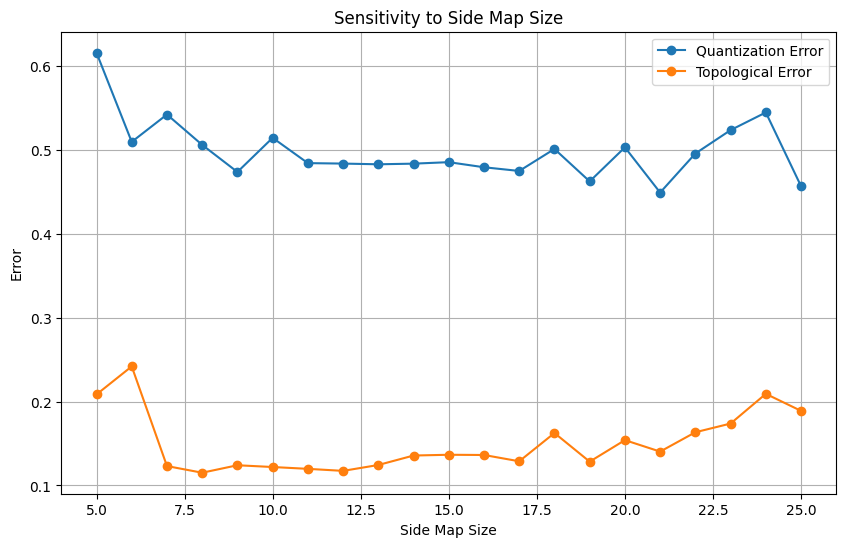

In [8]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

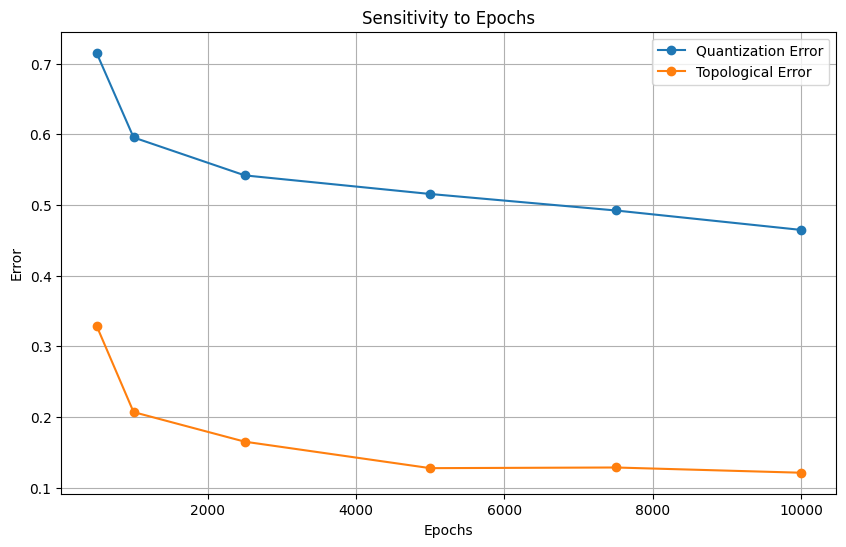

In [9]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

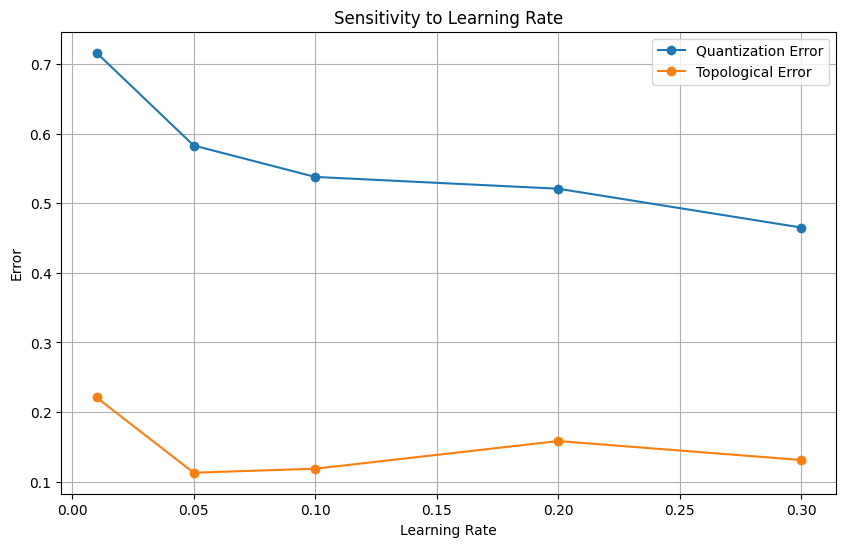

In [10]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()

# Breast Cancer Dataset

## Import and Clean 

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)
data[3] = data[3].replace({1: 0, 2: 1})

In [3]:
data_dropped = wf.drop_missing_values_columns(data, 5)
datos_mode = wf.mode_imputation(data_dropped, 3)
datos_mode[3].value_counts()

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  4


3
0    225
1     81
Name: count, dtype: int64

In [4]:
datos_mode=datos_mode.drop(columns = [3])
data_std = wf.min_max_normalization(datos_mode)
target = data[3].values
label_names={0:'plus 5', 1:'minus 5'}
data_som=data_std.to_numpy()
data_som.shape

(306, 3)

## Grid Search

In [25]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-12 12:22:58,227] A new study created in memory with name: no-name-7591092d-7c14-48df-b97d-1c89a7878bbb


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:23:04,733] Trial 0 finished with value: 0.23248217801628424 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 0 with value: 0.23248217801628424.


Trying: side_map=9, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[W 2025-03-12 12:23:11,499] Trial 1 failed with parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.01} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_3442/3027466698.py", line 41, in objective
    main_classification = GEMA.Classification(main_map, data_som)
  File "/usr/local/lib/python3.10/dist-packages/GEMA/classification.py", line 73, in __init__
    self.classification_map['y'][pattern] = bmu_pos[1]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 1288, in __setitem__
    cacher_needs_updating = self._check_is_chained_assignment_possible()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 1490, in _check_is_chained_assignment_possible
    if ref is not None and ref._is_mixed_type:
  File "/usr/local/lib/python3.10/dist-pa

In [6]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")

Mejores hiperparámetros: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}

Training Time Statistics:
Median Training Time: 1.74 seconds
Standard Deviation: 0.57 seconds
Total Training Time: 16 minutes 40 seconds


## Sensitivity Analysis

In [7]:
errors_df = pd.DataFrame(errors)

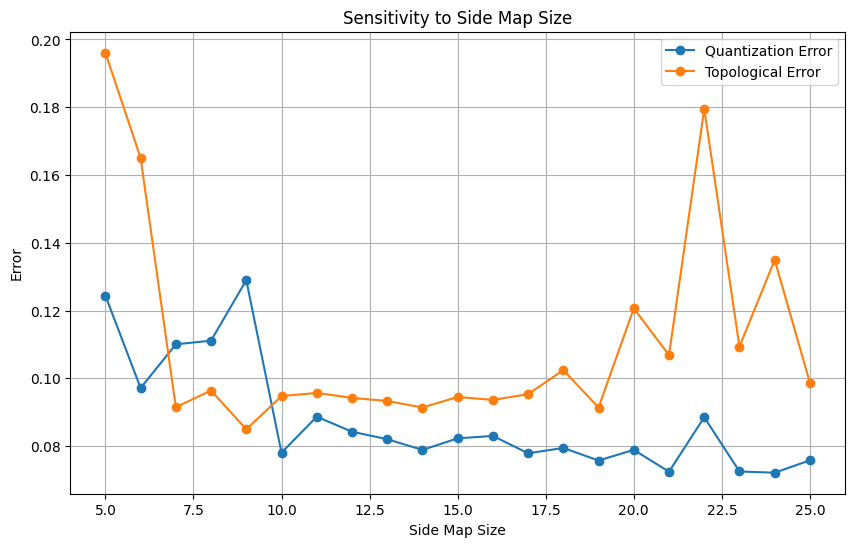

In [8]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

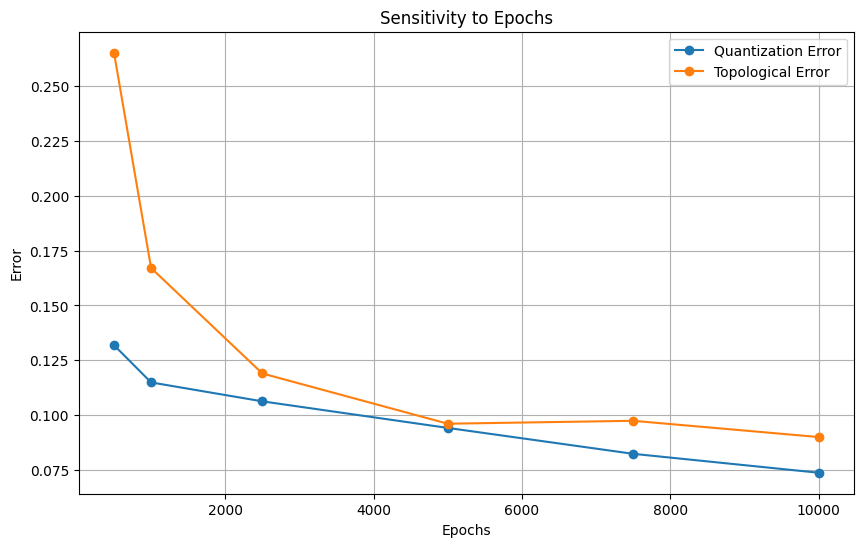

In [9]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

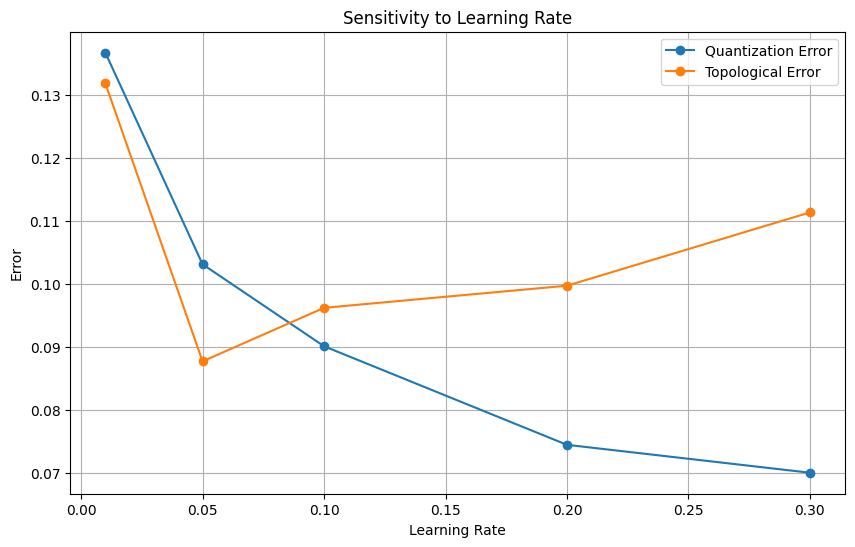

In [10]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()

# Bank Credits Dataset

## Import and Clean 

In [11]:
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)
columns_to_encode = [0, 2, 3, 4, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

data[20] = data[20].replace({1: 0, 2: 1})

In [12]:
data_dropped = wf.drop_missing_values_columns(data, 5)
datos_mode = data_dropped
datos_mode = wf.mode_imputation(data_dropped, 3)

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  21


In [13]:
datos_mode=datos_mode.drop(columns = [20])
df = datos_mode.astype(int, errors='ignore')
data_std = wf.min_max_normalization(datos_mode)
data_som=data_std.to_numpy()
data_som.shape

(1000, 20)

## Grid Search

In [14]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-12 11:47:16,084] A new study created in memory with name: no-name-750741dc-9939-4046-bbc7-a91f60e05d4b


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=19, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:17,665] Trial 0 finished with value: 1.16507442 and parameters: {'side_map': 19, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 0 with value: 1.16507442.


Trying: side_map=25, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:18,667] Trial 1 finished with value: 1.5515970699999997 and parameters: {'side_map': 25, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 0 with value: 1.16507442.


Trying: side_map=19, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:20,325] Trial 2 finished with value: 1.13984585 and parameters: {'side_map': 19, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 2 with value: 1.13984585.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:21,321] Trial 3 finished with value: 1.48391659 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 2 with value: 1.13984585.


Trying: side_map=11, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:23,243] Trial 4 finished with value: 1.23139131 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 2 with value: 1.13984585.


Trying: side_map=5, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:25,359] Trial 5 finished with value: 1.5490976300000003 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 2 with value: 1.13984585.


Trying: side_map=25, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:26,636] Trial 6 finished with value: 1.53700361 and parameters: {'side_map': 25, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 2 with value: 1.13984585.


Trying: side_map=24, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:29,938] Trial 7 finished with value: 1.1481029900000002 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 2 with value: 1.13984585.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:32,932] Trial 8 finished with value: 1.13486917 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 8 with value: 1.13486917.


Trying: side_map=9, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:34,084] Trial 9 finished with value: 1.3976014399999999 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 8 with value: 1.13486917.


Trying: side_map=17, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:35,465] Trial 10 finished with value: 1.3206288 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 8 with value: 1.13486917.


Trying: side_map=20, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:38,360] Trial 11 finished with value: 1.08716562 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 11 with value: 1.08716562.


Trying: side_map=21, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:41,430] Trial 12 finished with value: 1.11334837 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 11 with value: 1.08716562.


Trying: side_map=21, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:44,375] Trial 13 finished with value: 1.08855152 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 11 with value: 1.08716562.


Trying: side_map=21, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:47,303] Trial 14 finished with value: 1.07760308 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 14 with value: 1.07760308.


Trying: side_map=22, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:50,394] Trial 15 finished with value: 1.12709104 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 14 with value: 1.07760308.


Trying: side_map=16, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:51,799] Trial 16 finished with value: 1.27476588 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 14 with value: 1.07760308.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:54,407] Trial 17 finished with value: 1.1238825799999999 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 14 with value: 1.07760308.


Trying: side_map=22, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:55,865] Trial 18 finished with value: 2.09939975 and parameters: {'side_map': 22, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 14 with value: 1.07760308.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:47:58,546] Trial 19 finished with value: 1.06355172 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 19 with value: 1.06355172.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:01,033] Trial 20 finished with value: 1.06027289 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:03,785] Trial 21 finished with value: 1.0841012600000002 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:06,590] Trial 22 finished with value: 1.17006542 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:09,508] Trial 23 finished with value: 1.1236785999999999 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:12,285] Trial 24 finished with value: 1.1427980899999999 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:16,488] Trial 25 finished with value: 1.20794803 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 20 with value: 1.06027289.


Trying: side_map=7, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:19,433] Trial 26 finished with value: 1.2699015400000002 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=11, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:21,434] Trial 27 finished with value: 1.33874829 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:24,119] Trial 28 finished with value: 1.10491458 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=16, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:26,485] Trial 29 finished with value: 1.16078765 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:29,836] Trial 30 finished with value: 1.1684485199999999 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 20 with value: 1.06027289.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:32,574] Trial 31 finished with value: 1.0701629600000002 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:35,600] Trial 32 finished with value: 1.07813488 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:38,678] Trial 33 finished with value: 1.1108995200000003 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 20 with value: 1.06027289.


Trying: side_map=18, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:39,914] Trial 34 finished with value: 1.5051097999999998 and parameters: {'side_map': 18, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 20 with value: 1.06027289.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:41,871] Trial 35 finished with value: 1.16851339 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:44,616] Trial 36 finished with value: 1.14919298 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 20 with value: 1.06027289.


Trying: side_map=5, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:47,260] Trial 37 finished with value: 1.41771913 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=14, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:48,542] Trial 38 finished with value: 1.41727724 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 20 with value: 1.06027289.


Trying: side_map=7, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:50,691] Trial 39 finished with value: 1.32274045 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 20 with value: 1.06027289.


Trying: side_map=12, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:51,916] Trial 40 finished with value: 1.37156809 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:54,620] Trial 41 finished with value: 1.09533942 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=10, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:48:57,143] Trial 42 finished with value: 1.08816085 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 1.06027289.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:00,193] Trial 43 finished with value: 1.1238339800000001 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 20 with value: 1.06027289.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:02,974] Trial 44 finished with value: 1.03910426 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:05,007] Trial 45 finished with value: 1.18080655 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:08,228] Trial 46 finished with value: 1.13441488 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=24, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:10,201] Trial 47 finished with value: 1.36189727 and parameters: {'side_map': 24, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:13,297] Trial 48 finished with value: 1.0866039399999998 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:16,750] Trial 49 finished with value: 1.0936019 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:18,098] Trial 50 finished with value: 2.15890971 and parameters: {'side_map': 10, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:21,123] Trial 51 finished with value: 1.10604343 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:24,137] Trial 52 finished with value: 1.0754441 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:26,865] Trial 53 finished with value: 1.0895368300000001 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:29,819] Trial 54 finished with value: 1.11656778 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:32,629] Trial 55 finished with value: 1.12464757 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:35,143] Trial 56 finished with value: 1.10136922 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:37,570] Trial 57 finished with value: 1.11625954 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:38,931] Trial 58 finished with value: 1.4294799499999997 and parameters: {'side_map': 17, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:42,151] Trial 59 finished with value: 1.07741083 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:43,739] Trial 60 finished with value: 1.2960652799999999 and parameters: {'side_map': 20, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=22, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:47,376] Trial 61 finished with value: 1.1180429399999998 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:51,182] Trial 62 finished with value: 1.09067407 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=23, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:54,858] Trial 63 finished with value: 1.11639025 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:49:58,543] Trial 64 finished with value: 1.1070265 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:01,691] Trial 65 finished with value: 1.22847985 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:04,322] Trial 66 finished with value: 1.11149824 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:06,152] Trial 67 finished with value: 1.1705888899999999 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:08,806] Trial 68 finished with value: 1.10998252 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=25, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:12,283] Trial 69 finished with value: 1.11317947 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=23, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:13,602] Trial 70 finished with value: 1.54905169 and parameters: {'side_map': 23, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:16,254] Trial 71 finished with value: 1.07873565 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:19,164] Trial 72 finished with value: 1.0921730600000001 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:21,983] Trial 73 finished with value: 1.0731854500000002 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:24,940] Trial 74 finished with value: 1.0718162500000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:27,755] Trial 75 finished with value: 1.0920303 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:30,415] Trial 76 finished with value: 1.20336724 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:31,636] Trial 77 finished with value: 1.35193917 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:34,542] Trial 78 finished with value: 1.07091976 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:36,026] Trial 79 finished with value: 1.29075448 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:38,875] Trial 80 finished with value: 1.18486082 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:42,158] Trial 81 finished with value: 1.09538412 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:45,091] Trial 82 finished with value: 1.0936961600000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:48,272] Trial 83 finished with value: 1.07545485 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:51,688] Trial 84 finished with value: 1.07124315 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:54,628] Trial 85 finished with value: 1.10150892 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:50:57,279] Trial 86 finished with value: 1.1047658900000001 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:00,264] Trial 87 finished with value: 1.07289086 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:02,116] Trial 88 finished with value: 1.15199567 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:04,808] Trial 89 finished with value: 1.05217764 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:07,463] Trial 90 finished with value: 1.0678489500000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:10,213] Trial 91 finished with value: 1.08291587 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:13,047] Trial 92 finished with value: 1.10758844 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:15,755] Trial 93 finished with value: 1.1009936599999999 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:18,441] Trial 94 finished with value: 1.10182245 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:20,998] Trial 95 finished with value: 1.11764155 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:22,060] Trial 96 finished with value: 1.56719281 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:24,468] Trial 97 finished with value: 1.1100754899999998 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:26,996] Trial 98 finished with value: 1.09923097 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:29,621] Trial 99 finished with value: 1.0917460399999999 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:30,895] Trial 100 finished with value: 1.4886228099999999 and parameters: {'side_map': 18, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:33,447] Trial 101 finished with value: 1.0883440100000001 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:36,009] Trial 102 finished with value: 1.08071003 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:38,609] Trial 103 finished with value: 1.0946504199999998 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:41,375] Trial 104 finished with value: 1.0913161999999998 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:43,920] Trial 105 finished with value: 1.05633331 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:45,370] Trial 106 finished with value: 1.2926181300000001 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:47,890] Trial 107 finished with value: 1.08791736 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:50,523] Trial 108 finished with value: 1.10562035 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:53,167] Trial 109 finished with value: 1.08522629 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:54,959] Trial 110 finished with value: 1.12713202 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:51:57,629] Trial 111 finished with value: 1.10091415 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:00,717] Trial 112 finished with value: 1.08293648 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:03,473] Trial 113 finished with value: 1.09713707 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:06,119] Trial 114 finished with value: 1.09867746 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:08,703] Trial 115 finished with value: 1.10329146 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:11,308] Trial 116 finished with value: 1.09577777 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:14,361] Trial 117 finished with value: 1.0826046 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:16,994] Trial 118 finished with value: 1.0738019900000002 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:18,521] Trial 119 finished with value: 1.54765233 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:21,595] Trial 120 finished with value: 1.06889182 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:24,364] Trial 121 finished with value: 1.0968444400000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:27,625] Trial 122 finished with value: 1.1004314499999999 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:31,482] Trial 123 finished with value: 1.09911055 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:35,056] Trial 124 finished with value: 1.12716736 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:38,862] Trial 125 finished with value: 1.09293754 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:41,665] Trial 126 finished with value: 1.12112299 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:44,497] Trial 127 finished with value: 1.17284951 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:47,456] Trial 128 finished with value: 1.0896910100000001 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:50,549] Trial 129 finished with value: 1.21645379 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:51,841] Trial 130 finished with value: 1.36640519 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:54,590] Trial 131 finished with value: 1.0879761600000002 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:52:57,709] Trial 132 finished with value: 1.0992382 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:00,635] Trial 133 finished with value: 1.1136746899999999 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:02,287] Trial 134 finished with value: 1.2508082799999998 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:05,259] Trial 135 finished with value: 1.08870842 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:08,405] Trial 136 finished with value: 1.1462287500000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:11,503] Trial 137 finished with value: 1.08487542 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:14,457] Trial 138 finished with value: 1.0900648999999998 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:16,484] Trial 139 finished with value: 1.19716552 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:19,811] Trial 140 finished with value: 1.07931159 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:22,553] Trial 141 finished with value: 1.08804657 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:25,221] Trial 142 finished with value: 1.10927205 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:27,944] Trial 143 finished with value: 1.08375764 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:30,940] Trial 144 finished with value: 1.07463928 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:33,852] Trial 145 finished with value: 1.0905506399999998 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:36,716] Trial 146 finished with value: 1.10676618 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:39,900] Trial 147 finished with value: 1.0830039 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:41,161] Trial 148 finished with value: 1.56421208 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:44,004] Trial 149 finished with value: 1.0536313000000002 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:47,135] Trial 150 finished with value: 1.07520179 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:50,233] Trial 151 finished with value: 1.10311387 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:53,102] Trial 152 finished with value: 1.1081365699999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:56,140] Trial 153 finished with value: 1.09622083 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:53:59,220] Trial 154 finished with value: 1.09858673 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:02,129] Trial 155 finished with value: 1.10004785 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:05,635] Trial 156 finished with value: 1.08374181 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:08,149] Trial 157 finished with value: 1.0919875700000001 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:11,487] Trial 158 finished with value: 1.0956287 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:14,290] Trial 159 finished with value: 1.08387135 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:15,504] Trial 160 finished with value: 2.00103002 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:18,237] Trial 161 finished with value: 1.05492301 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:21,454] Trial 162 finished with value: 1.08359728 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:24,219] Trial 163 finished with value: 1.06400894 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:27,029] Trial 164 finished with value: 1.08741128 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:29,916] Trial 165 finished with value: 1.11202584 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:31,488] Trial 166 finished with value: 1.19396109 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:34,639] Trial 167 finished with value: 1.1004725599999998 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:37,395] Trial 168 finished with value: 1.09389507 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:40,316] Trial 169 finished with value: 1.0765204 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:43,126] Trial 170 finished with value: 1.10170277 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:45,983] Trial 171 finished with value: 1.08853146 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:48,926] Trial 172 finished with value: 1.06806506 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:51,815] Trial 173 finished with value: 1.08449206 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:54,581] Trial 174 finished with value: 1.11993466 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:57,199] Trial 175 finished with value: 1.07439628 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:54:59,479] Trial 176 finished with value: 1.1429919099999999 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:02,321] Trial 177 finished with value: 1.0879653 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:05,149] Trial 178 finished with value: 1.10990595 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:08,256] Trial 179 finished with value: 1.08718949 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:11,215] Trial 180 finished with value: 1.1303322500000001 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:13,936] Trial 181 finished with value: 1.08180935 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:16,742] Trial 182 finished with value: 1.09238204 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:19,658] Trial 183 finished with value: 1.11662411 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:22,516] Trial 184 finished with value: 1.1086139599999998 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:25,376] Trial 185 finished with value: 1.0807398799999999 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:28,330] Trial 186 finished with value: 1.1184238 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:29,544] Trial 187 finished with value: 1.45540242 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:32,291] Trial 188 finished with value: 1.0959404299999997 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:35,171] Trial 189 finished with value: 1.07397587 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:38,593] Trial 190 finished with value: 1.08913355 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:41,530] Trial 191 finished with value: 1.08151318 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:44,449] Trial 192 finished with value: 1.0714389000000002 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:47,521] Trial 193 finished with value: 1.09366427 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:50,607] Trial 194 finished with value: 1.11809264 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:53,063] Trial 195 finished with value: 1.0934488500000001 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:55,887] Trial 196 finished with value: 1.11109522 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:55:58,919] Trial 197 finished with value: 1.09431188 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:00,265] Trial 198 finished with value: 1.3736564299999998 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:03,101] Trial 199 finished with value: 1.1886531 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:05,901] Trial 200 finished with value: 1.0736887300000002 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:09,805] Trial 201 finished with value: 1.0929727 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:12,782] Trial 202 finished with value: 1.0678688600000001 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:15,700] Trial 203 finished with value: 1.1260148799999998 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:18,529] Trial 204 finished with value: 1.10332354 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:21,409] Trial 205 finished with value: 1.0825358299999999 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:24,188] Trial 206 finished with value: 1.10934029 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:25,756] Trial 207 finished with value: 1.24831814 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:28,334] Trial 208 finished with value: 1.0968069900000001 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:30,965] Trial 209 finished with value: 1.09868543 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:33,499] Trial 210 finished with value: 1.11401651 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:36,033] Trial 211 finished with value: 1.0753641700000003 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=6, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:38,389] Trial 212 finished with value: 1.26918027 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:41,184] Trial 213 finished with value: 1.1069507699999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:43,656] Trial 214 finished with value: 1.1552497499999999 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:46,333] Trial 215 finished with value: 1.08334219 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:49,090] Trial 216 finished with value: 1.09536784 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:50,932] Trial 217 finished with value: 1.17544514 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:53,780] Trial 218 finished with value: 1.07314415 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:56,462] Trial 219 finished with value: 1.08522843 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:56:59,139] Trial 220 finished with value: 1.1375312400000002 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:01,978] Trial 221 finished with value: 1.09692767 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:04,725] Trial 222 finished with value: 1.06786389 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:07,488] Trial 223 finished with value: 1.0666922099999998 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:10,369] Trial 224 finished with value: 1.10056822 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:13,174] Trial 225 finished with value: 1.11194489 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:15,907] Trial 226 finished with value: 1.0878441099999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:18,847] Trial 227 finished with value: 1.10514369 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:21,627] Trial 228 finished with value: 1.1078434400000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:22,694] Trial 229 finished with value: 1.4964460899999998 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:25,526] Trial 230 finished with value: 1.0536682000000002 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:28,348] Trial 231 finished with value: 1.09969911 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:31,182] Trial 232 finished with value: 1.07537563 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:34,053] Trial 233 finished with value: 1.10947885 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:36,807] Trial 234 finished with value: 1.07591807 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:39,595] Trial 235 finished with value: 1.0815584999999999 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:42,329] Trial 236 finished with value: 1.0942858599999998 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:45,001] Trial 237 finished with value: 1.0769750200000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:47,801] Trial 238 finished with value: 1.09161052 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:50,698] Trial 239 finished with value: 1.10394192 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:52,963] Trial 240 finished with value: 1.13705953 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:55,567] Trial 241 finished with value: 1.10190134 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:57:58,153] Trial 242 finished with value: 1.11098928 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:00,879] Trial 243 finished with value: 1.0837395600000002 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:03,470] Trial 244 finished with value: 1.06836171 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:06,041] Trial 245 finished with value: 1.2126207 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:08,741] Trial 246 finished with value: 1.1030697600000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:11,793] Trial 247 finished with value: 1.09110768 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:14,613] Trial 248 finished with value: 1.05548483 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:17,451] Trial 249 finished with value: 1.08512364 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:19,037] Trial 250 finished with value: 1.27197651 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:20,339] Trial 251 finished with value: 1.4779220400000002 and parameters: {'side_map': 19, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:23,811] Trial 252 finished with value: 1.0705487900000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:26,859] Trial 253 finished with value: 1.0859071200000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:30,022] Trial 254 finished with value: 1.11233454 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:33,184] Trial 255 finished with value: 1.09983798 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:36,239] Trial 256 finished with value: 1.0785597999999998 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:39,950] Trial 257 finished with value: 1.0716845099999999 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:42,097] Trial 258 finished with value: 1.15989908 and parameters: {'side_map': 18, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:45,394] Trial 259 finished with value: 1.0963583399999999 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:48,704] Trial 260 finished with value: 1.10358786 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:51,863] Trial 261 finished with value: 1.1673874599999998 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:54,768] Trial 262 finished with value: 1.08619946 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:58:57,713] Trial 263 finished with value: 1.07302943 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:00,540] Trial 264 finished with value: 1.07981977 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:03,406] Trial 265 finished with value: 1.08937861 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:04,521] Trial 266 finished with value: 1.4653648600000002 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:07,546] Trial 267 finished with value: 1.09291074 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:10,467] Trial 268 finished with value: 1.0679878299999999 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:13,161] Trial 269 finished with value: 1.1078676 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:15,854] Trial 270 finished with value: 1.08086853 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:18,750] Trial 271 finished with value: 1.0860313899999998 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:21,109] Trial 272 finished with value: 1.1383439599999998 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:23,993] Trial 273 finished with value: 1.0809215399999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:27,150] Trial 274 finished with value: 1.10767339 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:30,031] Trial 275 finished with value: 1.18006538 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:31,327] Trial 276 finished with value: 1.39239216 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:34,347] Trial 277 finished with value: 1.12335033 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:37,677] Trial 278 finished with value: 1.0717955 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:40,681] Trial 279 finished with value: 1.1005779 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:43,935] Trial 280 finished with value: 1.09301391 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:45,580] Trial 281 finished with value: 1.25109486 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:48,235] Trial 282 finished with value: 1.1430804 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:51,671] Trial 283 finished with value: 1.06489513 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:54,392] Trial 284 finished with value: 1.07123616 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:57,097] Trial 285 finished with value: 1.10073606 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 11:59:59,984] Trial 286 finished with value: 1.11957139 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:02,827] Trial 287 finished with value: 1.12740931 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:05,807] Trial 288 finished with value: 1.08556723 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:08,797] Trial 289 finished with value: 1.1366274200000002 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:10,895] Trial 290 finished with value: 1.12636361 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:13,711] Trial 291 finished with value: 1.07747021 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:17,751] Trial 292 finished with value: 1.0796644299999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:20,632] Trial 293 finished with value: 1.1190637300000001 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:23,567] Trial 294 finished with value: 1.05676762 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:24,988] Trial 295 finished with value: 1.50010204 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:27,896] Trial 296 finished with value: 1.0542814 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:30,909] Trial 297 finished with value: 1.090541 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:33,903] Trial 298 finished with value: 1.1072358199999999 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:36,809] Trial 299 finished with value: 1.09681681 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:39,824] Trial 300 finished with value: 1.09522988 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:42,812] Trial 301 finished with value: 1.0933759 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:45,892] Trial 302 finished with value: 1.2290570600000001 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:48,631] Trial 303 finished with value: 1.16925233 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:51,903] Trial 304 finished with value: 1.06995749 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:53,361] Trial 305 finished with value: 1.41444485 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:56,392] Trial 306 finished with value: 1.09939686 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:00:59,568] Trial 307 finished with value: 1.07867317 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:02,578] Trial 308 finished with value: 1.09180808 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:04,112] Trial 309 finished with value: 1.21794598 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:07,235] Trial 310 finished with value: 1.09739287 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:10,382] Trial 311 finished with value: 1.08563965 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:13,738] Trial 312 finished with value: 1.08012853 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:16,633] Trial 313 finished with value: 1.08803125 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:19,733] Trial 314 finished with value: 1.0827759499999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:22,789] Trial 315 finished with value: 1.09021268 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:25,733] Trial 316 finished with value: 1.1297323700000002 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:28,647] Trial 317 finished with value: 1.0648170499999998 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:31,453] Trial 318 finished with value: 1.08305549 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:34,222] Trial 319 finished with value: 1.06854478 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:36,973] Trial 320 finished with value: 1.10778942 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:39,776] Trial 321 finished with value: 1.10131815 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:42,486] Trial 322 finished with value: 1.07123348 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:44,324] Trial 323 finished with value: 1.13930018 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:47,241] Trial 324 finished with value: 1.0798798600000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:48,506] Trial 325 finished with value: 1.48159697 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:51,359] Trial 326 finished with value: 1.0928673899999999 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:53,938] Trial 327 finished with value: 1.0919336200000003 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:56,918] Trial 328 finished with value: 1.2213080900000004 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:01:59,888] Trial 329 finished with value: 1.0865004900000002 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:02,709] Trial 330 finished with value: 1.06996737 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:05,069] Trial 331 finished with value: 1.1161813 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:07,924] Trial 332 finished with value: 1.0915154399999998 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:10,825] Trial 333 finished with value: 1.06713527 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:13,541] Trial 334 finished with value: 1.08230555 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:16,333] Trial 335 finished with value: 1.1221037699999998 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:17,589] Trial 336 finished with value: 1.34609141 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:20,993] Trial 337 finished with value: 1.07513246 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:23,747] Trial 338 finished with value: 1.06940715 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:26,866] Trial 339 finished with value: 1.09395557 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:28,435] Trial 340 finished with value: 1.2584831600000002 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:31,433] Trial 341 finished with value: 1.0959931699999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:34,848] Trial 342 finished with value: 1.08362581 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=24, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:38,780] Trial 343 finished with value: 1.12961683 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:41,679] Trial 344 finished with value: 1.13360412 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:44,387] Trial 345 finished with value: 1.07947078 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:47,177] Trial 346 finished with value: 1.05351409 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:49,204] Trial 347 finished with value: 1.18361933 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:52,057] Trial 348 finished with value: 1.08551501 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:54,852] Trial 349 finished with value: 1.08681072 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:02:57,770] Trial 350 finished with value: 1.0672336 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:00,821] Trial 351 finished with value: 1.0909436399999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:03,783] Trial 352 finished with value: 1.09856015 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:07,086] Trial 353 finished with value: 1.12502706 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:09,919] Trial 354 finished with value: 1.10820145 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:12,703] Trial 355 finished with value: 1.08241362 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:13,828] Trial 356 finished with value: 1.4894065099999998 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:16,440] Trial 357 finished with value: 1.21740511 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:19,109] Trial 358 finished with value: 1.0982878299999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:21,844] Trial 359 finished with value: 1.09344231 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:24,438] Trial 360 finished with value: 1.10445887 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:26,632] Trial 361 finished with value: 1.1085399 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:29,286] Trial 362 finished with value: 1.08491764 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:31,870] Trial 363 finished with value: 1.0998721000000002 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:34,477] Trial 364 finished with value: 1.09754051 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:35,673] Trial 365 finished with value: 1.34830089 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:38,428] Trial 366 finished with value: 1.1112615499999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:41,251] Trial 367 finished with value: 1.0909450099999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:42,718] Trial 368 finished with value: 1.20574471 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:45,363] Trial 369 finished with value: 1.09511428 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:47,969] Trial 370 finished with value: 1.0895261299999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=11, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:50,547] Trial 371 finished with value: 1.13324237 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:53,095] Trial 372 finished with value: 1.10983313 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:55,888] Trial 373 finished with value: 1.09859492 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:03:58,421] Trial 374 finished with value: 1.1115746499999999 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:00,406] Trial 375 finished with value: 1.18925675 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:03,023] Trial 376 finished with value: 1.10087875 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:05,710] Trial 377 finished with value: 1.0872202100000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:08,378] Trial 378 finished with value: 1.10606373 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:11,153] Trial 379 finished with value: 1.07211788 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:13,803] Trial 380 finished with value: 1.0995259199999998 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:16,665] Trial 381 finished with value: 1.05022631 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:17,769] Trial 382 finished with value: 1.53454458 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:20,745] Trial 383 finished with value: 1.11236212 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:23,970] Trial 384 finished with value: 1.1948789100000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:26,693] Trial 385 finished with value: 1.09815826 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:29,531] Trial 386 finished with value: 1.09265314 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:32,320] Trial 387 finished with value: 1.10570727 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=9, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:34,555] Trial 388 finished with value: 1.12576271 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:37,310] Trial 389 finished with value: 1.06137223 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:40,035] Trial 390 finished with value: 1.07603002 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:42,794] Trial 391 finished with value: 1.07758004 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:44,005] Trial 392 finished with value: 1.37015291 and parameters: {'side_map': 17, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:46,855] Trial 393 finished with value: 1.08969316 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:49,745] Trial 394 finished with value: 1.06357808 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:52,611] Trial 395 finished with value: 1.0725109499999999 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:54,068] Trial 396 finished with value: 1.2621963100000002 and parameters: {'side_map': 18, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:56,815] Trial 397 finished with value: 1.08224191 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:04:59,710] Trial 398 finished with value: 1.1429973199999999 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:02,586] Trial 399 finished with value: 1.09844351 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:05,485] Trial 400 finished with value: 1.09051199 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:08,248] Trial 401 finished with value: 1.07075084 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:11,265] Trial 402 finished with value: 1.07085854 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:13,954] Trial 403 finished with value: 1.08806736 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:16,960] Trial 404 finished with value: 1.10725738 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:19,745] Trial 405 finished with value: 1.09334458 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:21,707] Trial 406 finished with value: 1.14995144 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:24,591] Trial 407 finished with value: 1.07862435 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=10, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:27,092] Trial 408 finished with value: 1.08771547 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:29,817] Trial 409 finished with value: 1.07786618 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:32,622] Trial 410 finished with value: 1.07578675 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:33,811] Trial 411 finished with value: 2.20047612 and parameters: {'side_map': 19, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:36,457] Trial 412 finished with value: 1.08169355 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:39,261] Trial 413 finished with value: 1.0681432599999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:42,118] Trial 414 finished with value: 1.1173896500000002 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:44,785] Trial 415 finished with value: 1.08516174 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:47,537] Trial 416 finished with value: 1.0661675700000002 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:49,892] Trial 417 finished with value: 1.13544344 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:52,616] Trial 418 finished with value: 1.05161272 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:55,395] Trial 419 finished with value: 1.08511242 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:58,182] Trial 420 finished with value: 1.09761634 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:05:59,429] Trial 421 finished with value: 1.36790515 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:02,208] Trial 422 finished with value: 1.1075386 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:04,957] Trial 423 finished with value: 1.07044029 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:07,786] Trial 424 finished with value: 1.1027870599999998 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:10,558] Trial 425 finished with value: 1.08231974 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:13,334] Trial 426 finished with value: 1.06632183 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:14,793] Trial 427 finished with value: 1.283412 and parameters: {'side_map': 18, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:17,560] Trial 428 finished with value: 1.05105014 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:20,450] Trial 429 finished with value: 1.08930497 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:23,218] Trial 430 finished with value: 1.10381507 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:26,895] Trial 431 finished with value: 1.2245414500000003 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:29,785] Trial 432 finished with value: 1.05943269 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:32,653] Trial 433 finished with value: 1.06886 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:34,543] Trial 434 finished with value: 1.1888341 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:37,398] Trial 435 finished with value: 1.14307785 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:40,249] Trial 436 finished with value: 1.0830017600000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:43,064] Trial 437 finished with value: 1.05725561 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:45,848] Trial 438 finished with value: 1.10603702 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:48,703] Trial 439 finished with value: 1.06965905 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:51,628] Trial 440 finished with value: 1.0832059200000002 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:52,740] Trial 441 finished with value: 1.4715265199999998 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:55,597] Trial 442 finished with value: 1.06203078 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:06:58,438] Trial 443 finished with value: 1.05972958 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:01,604] Trial 444 finished with value: 1.09438875 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:04,799] Trial 445 finished with value: 1.06050109 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:08,112] Trial 446 finished with value: 1.07272556 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:11,628] Trial 447 finished with value: 1.04931752 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:14,758] Trial 448 finished with value: 1.12049917 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:18,180] Trial 449 finished with value: 1.08816102 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:21,596] Trial 450 finished with value: 1.08552651 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:22,945] Trial 451 finished with value: 1.44059736 and parameters: {'side_map': 20, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:26,005] Trial 452 finished with value: 1.07662588 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:29,791] Trial 453 finished with value: 1.07748628 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:33,082] Trial 454 finished with value: 1.07181343 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:34,745] Trial 455 finished with value: 1.30541568 and parameters: {'side_map': 19, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:38,055] Trial 456 finished with value: 1.0911301599999998 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:41,562] Trial 457 finished with value: 1.10288018 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:44,803] Trial 458 finished with value: 1.06253552 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:48,013] Trial 459 finished with value: 1.07052216 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:51,330] Trial 460 finished with value: 1.06329079 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:54,715] Trial 461 finished with value: 1.09233414 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:07:58,211] Trial 462 finished with value: 1.07905221 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:00,770] Trial 463 finished with value: 1.19255612 and parameters: {'side_map': 20, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:04,391] Trial 464 finished with value: 1.0948909199999999 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:07,866] Trial 465 finished with value: 1.08566771 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:11,194] Trial 466 finished with value: 1.06751941 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:14,834] Trial 467 finished with value: 1.08684067 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:18,456] Trial 468 finished with value: 1.0750549 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:22,125] Trial 469 finished with value: 1.07456583 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:25,794] Trial 470 finished with value: 1.0628092299999998 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:27,560] Trial 471 finished with value: 1.5594651400000001 and parameters: {'side_map': 20, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:31,694] Trial 472 finished with value: 1.04132076 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:35,108] Trial 473 finished with value: 1.06814516 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:38,658] Trial 474 finished with value: 1.08318063 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:42,332] Trial 475 finished with value: 1.06801134 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:45,822] Trial 476 finished with value: 1.1424947 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:48,722] Trial 477 finished with value: 1.1002759599999998 and parameters: {'side_map': 21, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:52,200] Trial 478 finished with value: 1.08817882 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:55,489] Trial 479 finished with value: 1.08138419 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:08:58,811] Trial 480 finished with value: 1.08512429 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:02,363] Trial 481 finished with value: 1.08320095 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:03,797] Trial 482 finished with value: 1.4448056299999998 and parameters: {'side_map': 20, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:08,033] Trial 483 finished with value: 1.09157642 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:11,706] Trial 484 finished with value: 1.08785653 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=22, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:13,520] Trial 485 finished with value: 1.30266948 and parameters: {'side_map': 22, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:16,464] Trial 486 finished with value: 1.27120375 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:20,245] Trial 487 finished with value: 1.1189760000000002 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:23,990] Trial 488 finished with value: 1.10043817 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:27,511] Trial 489 finished with value: 1.11509458 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:30,933] Trial 490 finished with value: 1.0871846200000002 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:34,077] Trial 491 finished with value: 1.07090982 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:36,251] Trial 492 finished with value: 1.1677756400000001 and parameters: {'side_map': 19, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:39,825] Trial 493 finished with value: 1.10867084 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:43,465] Trial 494 finished with value: 1.0991074699999999 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=25, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:47,160] Trial 495 finished with value: 1.12207834 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:50,443] Trial 496 finished with value: 1.08212778 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:53,866] Trial 497 finished with value: 1.10240036 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:57,082] Trial 498 finished with value: 1.0755691699999999 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=21, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:09:58,427] Trial 499 finished with value: 1.5178083800000002 and parameters: {'side_map': 21, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=20, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:02,072] Trial 500 finished with value: 1.08433118 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:05,542] Trial 501 finished with value: 1.05551144 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:08,596] Trial 502 finished with value: 1.0788031999999999 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:11,692] Trial 503 finished with value: 1.10835076 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:14,289] Trial 504 finished with value: 1.24463722 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:16,739] Trial 505 finished with value: 1.13004289 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:20,075] Trial 506 finished with value: 1.07942097 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:22,947] Trial 507 finished with value: 1.08895961 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:25,938] Trial 508 finished with value: 1.06828886 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:27,200] Trial 509 finished with value: 1.4066743699999997 and parameters: {'side_map': 18, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:30,340] Trial 510 finished with value: 1.09354579 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:33,739] Trial 511 finished with value: 1.07057521 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:37,126] Trial 512 finished with value: 1.10829895 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:40,196] Trial 513 finished with value: 1.07678701 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=5, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:42,796] Trial 514 finished with value: 1.4365221499999998 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:45,589] Trial 515 finished with value: 1.05336375 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:48,413] Trial 516 finished with value: 1.08574913 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:49,959] Trial 517 finished with value: 1.35297884 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:52,932] Trial 518 finished with value: 1.07334256 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:55,757] Trial 519 finished with value: 1.09121875 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:10:58,618] Trial 520 finished with value: 1.06792939 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:00,603] Trial 521 finished with value: 1.16133915 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:03,456] Trial 522 finished with value: 1.22165151 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:06,247] Trial 523 finished with value: 1.06422116 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:09,253] Trial 524 finished with value: 1.05212889 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:12,162] Trial 525 finished with value: 1.07516808 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:15,084] Trial 526 finished with value: 1.08545831 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:16,170] Trial 527 finished with value: 1.4847571300000002 and parameters: {'side_map': 18, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:19,123] Trial 528 finished with value: 1.12236439 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:21,998] Trial 529 finished with value: 1.0820344499999999 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:24,812] Trial 530 finished with value: 1.11157003 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:27,662] Trial 531 finished with value: 1.14387291 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:30,507] Trial 532 finished with value: 1.08582126 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:33,392] Trial 533 finished with value: 1.09147877 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:35,768] Trial 534 finished with value: 1.0997154900000001 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:38,398] Trial 535 finished with value: 1.08792516 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:39,658] Trial 536 finished with value: 1.39038089 and parameters: {'side_map': 19, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:42,554] Trial 537 finished with value: 1.0629923799999998 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:45,340] Trial 538 finished with value: 1.11404741 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:48,154] Trial 539 finished with value: 1.2344000600000002 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:51,112] Trial 540 finished with value: 1.10801915 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:53,896] Trial 541 finished with value: 1.05428615 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:55,358] Trial 542 finished with value: 1.26450721 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:11:58,063] Trial 543 finished with value: 1.09605482 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:00,949] Trial 544 finished with value: 1.08887592 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:03,748] Trial 545 finished with value: 1.16072916 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:06,539] Trial 546 finished with value: 1.06408278 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:09,208] Trial 547 finished with value: 1.0913101 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:12,103] Trial 548 finished with value: 1.0776337200000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:14,865] Trial 549 finished with value: 1.07022073 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:17,647] Trial 550 finished with value: 1.24843912 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:19,578] Trial 551 finished with value: 1.16829032 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:22,369] Trial 552 finished with value: 1.07104069 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:25,113] Trial 553 finished with value: 1.0635021599999999 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:27,732] Trial 554 finished with value: 1.10177768 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:28,813] Trial 555 finished with value: 1.53938782 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:31,717] Trial 556 finished with value: 1.08015708 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:34,388] Trial 557 finished with value: 1.09937493 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:37,624] Trial 558 finished with value: 1.07413639 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:40,690] Trial 559 finished with value: 1.1860353700000001 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:43,571] Trial 560 finished with value: 1.09024198 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:46,466] Trial 561 finished with value: 1.09994882 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:49,146] Trial 562 finished with value: 1.0760538499999999 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:50,416] Trial 563 finished with value: 1.3824758 and parameters: {'side_map': 18, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:53,196] Trial 564 finished with value: 1.07279403 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:55,824] Trial 565 finished with value: 1.2059942700000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:12:58,754] Trial 566 finished with value: 1.0796481299999998 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:01,547] Trial 567 finished with value: 1.0608616 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:04,339] Trial 568 finished with value: 1.08301837 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:05,825] Trial 569 finished with value: 1.3067825400000002 and parameters: {'side_map': 18, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:08,513] Trial 570 finished with value: 1.0620424800000001 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:10,971] Trial 571 finished with value: 1.06184355 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:13,734] Trial 572 finished with value: 1.10514245 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:16,525] Trial 573 finished with value: 1.0600454799999999 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:19,353] Trial 574 finished with value: 1.0918027000000001 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:22,187] Trial 575 finished with value: 1.0739293 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:24,075] Trial 576 finished with value: 1.17532276 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:26,926] Trial 577 finished with value: 1.0895079799999998 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=23, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:30,399] Trial 578 finished with value: 1.15586922 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:33,317] Trial 579 finished with value: 1.09596862 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:36,226] Trial 580 finished with value: 1.0686765699999998 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:39,056] Trial 581 finished with value: 1.09945757 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:41,902] Trial 582 finished with value: 1.0513537400000001 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:42,975] Trial 583 finished with value: 1.4767027499999998 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:45,950] Trial 584 finished with value: 1.12833732 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=22, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:49,553] Trial 585 finished with value: 1.08461298 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:52,845] Trial 586 finished with value: 1.07728229 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:56,375] Trial 587 finished with value: 1.09631028 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:13:59,671] Trial 588 finished with value: 1.2124058100000001 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:02,706] Trial 589 finished with value: 1.0838451 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:05,054] Trial 590 finished with value: 1.09321535 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:08,020] Trial 591 finished with value: 1.0754680399999998 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:11,470] Trial 592 finished with value: 1.09269927 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:14,601] Trial 593 finished with value: 1.06860227 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:15,902] Trial 594 finished with value: 1.45907 and parameters: {'side_map': 17, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:19,679] Trial 595 finished with value: 1.11330335 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:23,355] Trial 596 finished with value: 1.0751528499999998 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:25,160] Trial 597 finished with value: 1.2510313000000002 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:28,728] Trial 598 finished with value: 1.0752584699999999 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:32,105] Trial 599 finished with value: 1.0821779 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:35,095] Trial 600 finished with value: 1.08191242 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:37,963] Trial 601 finished with value: 1.0867944299999999 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:41,313] Trial 602 finished with value: 1.15605956 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=16, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:44,134] Trial 603 finished with value: 1.09269639 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:46,093] Trial 604 finished with value: 1.16377971 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:49,079] Trial 605 finished with value: 1.2537637300000002 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:51,981] Trial 606 finished with value: 1.1028882 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=15, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:54,654] Trial 607 finished with value: 1.09984524 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:14:57,157] Trial 608 finished with value: 1.2085186 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:00,064] Trial 609 finished with value: 1.0464066399999998 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=23, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:03,439] Trial 610 finished with value: 1.07855414 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:06,304] Trial 611 finished with value: 1.07339633 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:09,223] Trial 612 finished with value: 1.07452736 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:10,415] Trial 613 finished with value: 1.5193531 and parameters: {'side_map': 18, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:13,300] Trial 614 finished with value: 1.07056982 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:16,144] Trial 615 finished with value: 1.07830276 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:18,995] Trial 616 finished with value: 1.05715599 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:21,943] Trial 617 finished with value: 1.06986724 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:24,447] Trial 618 finished with value: 1.09103475 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:27,273] Trial 619 finished with value: 1.08546194 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:30,227] Trial 620 finished with value: 1.07778503 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:33,100] Trial 621 finished with value: 1.05534281 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:34,319] Trial 622 finished with value: 1.41511146 and parameters: {'side_map': 18, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:37,280] Trial 623 finished with value: 1.1441089 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:40,205] Trial 624 finished with value: 1.09887876 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:42,853] Trial 625 finished with value: 1.08356908 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=17, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:44,338] Trial 626 finished with value: 1.29525475 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:46,953] Trial 627 finished with value: 1.0865505899999999 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


Trying: side_map=18, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:49,879] Trial 628 finished with value: 1.1656268500000002 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 44 with value: 1.03910426.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-03-12 12:15:52,831] Trial 629 finished with value: 1.07646621 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 44 with value: 1.03910426.


In [15]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")

Mejores hiperparámetros: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.2}

Training Time Statistics:
Median Training Time: 1.78 seconds
Standard Deviation: 0.59 seconds
Total Training Time: 17 minutes 11 seconds
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Sensitivity Analysis

In [16]:
errors_df = pd.DataFrame(errors)

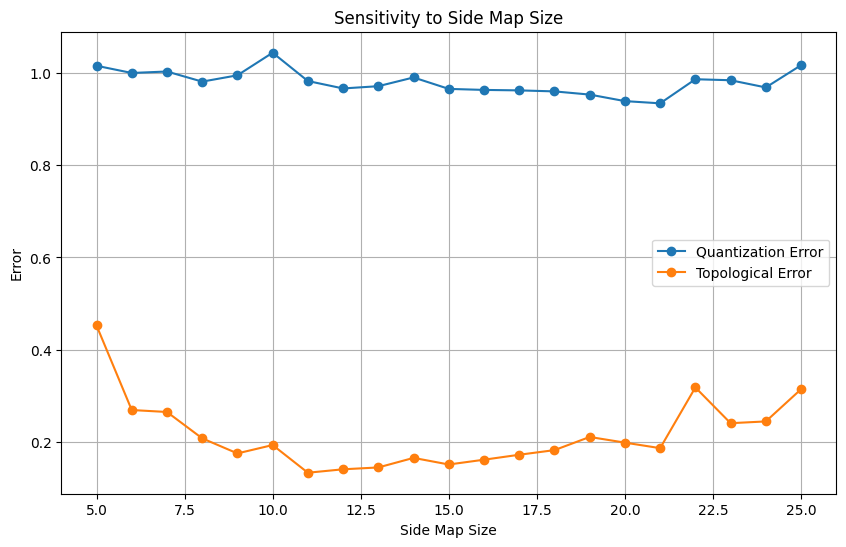

In [17]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

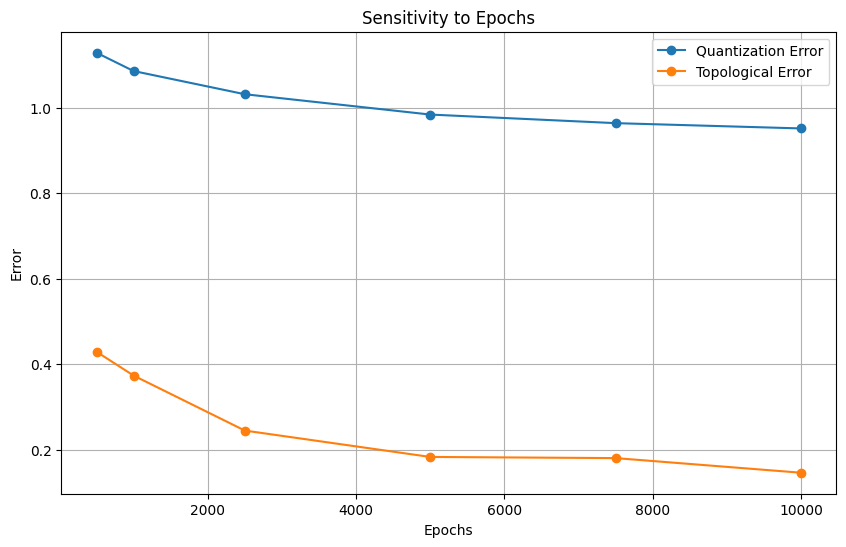

In [18]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

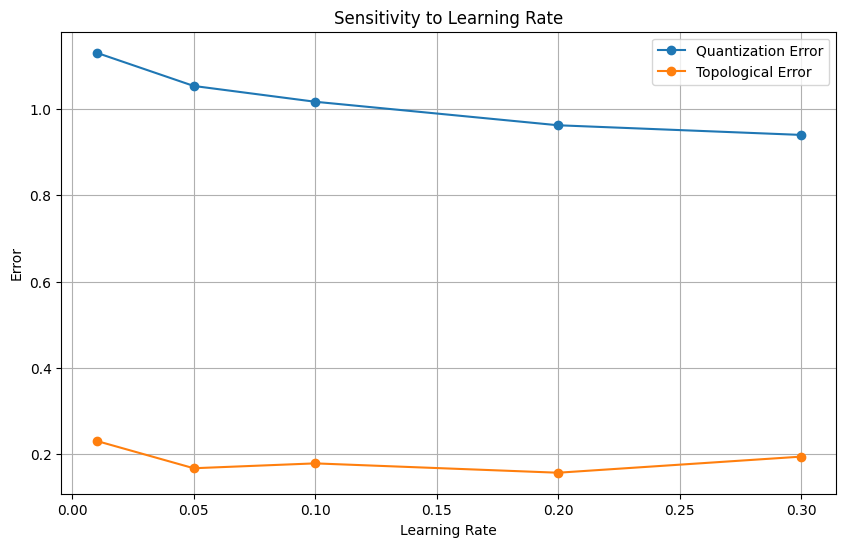

In [19]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()

# Phonemes Dataset

## Import and Clean 

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)

In [3]:
data_dropped = wf.drop_missing_values_columns(data, 5)
datos_mode = wf.mode_imputation(data_dropped, 5)
datos_mode[5].value_counts()

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  6


5
0.0    3818
1.0    1586
Name: count, dtype: int64

In [4]:
datos_mode=datos_mode.drop(columns = [5])
data_std = wf.min_max_normalization(datos_mode)
target = data[5].values
label_names={0:'Nasals', 1:'Orals'}
data_som=data_std.to_numpy()
data_som.shape

(5404, 5)

## Grid Search

In [6]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-12 12:23:58,260] A new study created in memory with name: no-name-071de749-7aae-4650-9c66-98d5ec576ad5


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=18, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:03,973] Trial 0 finished with value: 0.246390177646188 and parameters: {'side_map': 18, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 0 with value: 0.246390177646188.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:11,674] Trial 1 finished with value: 0.22698940044411547 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=6, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:18,498] Trial 2 finished with value: 0.27870049407846037 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=19, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:26,148] Trial 3 finished with value: 0.24378045336787568 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=25, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:32,864] Trial 4 finished with value: 0.2779445373797187 and parameters: {'side_map': 25, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=24, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:39,439] Trial 5 finished with value: 0.30296721317542563 and parameters: {'side_map': 24, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=15, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:46,251] Trial 6 finished with value: 0.23275867505551445 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=24, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:24:54,584] Trial 7 finished with value: 0.2537012971872687 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=9, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:01,544] Trial 8 finished with value: 0.2573291672834937 and parameters: {'side_map': 9, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=19, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:07,998] Trial 9 finished with value: 0.2963431291635826 and parameters: {'side_map': 19, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=11, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:15,497] Trial 10 finished with value: 0.2497334344929682 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=13, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:21,659] Trial 11 finished with value: 1.1325137435233161 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=5, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:29,290] Trial 12 finished with value: 0.30150543301258326 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:36,331] Trial 13 finished with value: 0.2369180551443375 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=9, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:42,937] Trial 14 finished with value: 0.3330364322723909 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=14, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:48,981] Trial 15 finished with value: 0.24820688564026644 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:25:56,893] Trial 16 finished with value: 0.26521295151739455 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=21, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:03,274] Trial 17 finished with value: 0.2620039452257587 and parameters: {'side_map': 21, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=12, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:10,156] Trial 18 finished with value: 0.23299471687638787 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 1 with value: 0.22698940044411547.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:16,865] Trial 19 finished with value: 0.22542725203552927 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 19 with value: 0.22542725203552927.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:23,586] Trial 20 finished with value: 0.2067656347150259 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:30,044] Trial 21 finished with value: 0.22990982790525538 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=22, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:36,805] Trial 22 finished with value: 0.2647065544041451 and parameters: {'side_map': 22, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=21, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:43,213] Trial 23 finished with value: 0.26666797372316803 and parameters: {'side_map': 21, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:49,937] Trial 24 finished with value: 0.2379454200592154 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:26:57,182] Trial 25 finished with value: 0.24946785714285713 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:03,997] Trial 26 finished with value: 0.2385708549222798 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=20, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:10,448] Trial 27 finished with value: 0.25784913027387124 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:16,377] Trial 28 finished with value: 1.1893532735011103 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:21,882] Trial 29 finished with value: 0.3139105014803849 and parameters: {'side_map': 18, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:27,327] Trial 30 finished with value: 0.3205839933382679 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:33,766] Trial 31 finished with value: 0.21966111769059954 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:40,094] Trial 32 finished with value: 0.2176492468541821 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:46,402] Trial 33 finished with value: 0.2470738064396743 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:53,341] Trial 34 finished with value: 0.24771873982235382 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=19, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:27:59,565] Trial 35 finished with value: 0.22710114729829756 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:05,591] Trial 36 finished with value: 0.26065373427091043 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=22, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:12,161] Trial 37 finished with value: 0.24695608808290154 and parameters: {'side_map': 22, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=20, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:18,958] Trial 38 finished with value: 0.22937771095484827 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:24,622] Trial 39 finished with value: 0.3025114526276832 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:31,248] Trial 40 finished with value: 0.2339413064396743 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:37,491] Trial 41 finished with value: 0.23529744448556622 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:43,902] Trial 42 finished with value: 0.23703365840118432 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:51,384] Trial 43 finished with value: 0.22392428941524795 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=19, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:28:58,303] Trial 44 finished with value: 0.25289625832716506 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:05,874] Trial 45 finished with value: 0.24776368800888232 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:12,701] Trial 46 finished with value: 0.2343632438934123 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:18,507] Trial 47 finished with value: 0.46868323094004444 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=5, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:26,800] Trial 48 finished with value: 0.3300151517394523 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=10, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:33,410] Trial 49 finished with value: 0.28201338823094 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=20, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:40,287] Trial 50 finished with value: 0.2548544707623982 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:47,636] Trial 51 finished with value: 0.22616842524056258 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:29:55,335] Trial 52 finished with value: 0.22704011658031087 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:02,834] Trial 53 finished with value: 0.3391239248704663 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:10,499] Trial 54 finished with value: 0.3216956698741673 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=8, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:17,280] Trial 55 finished with value: 0.31193924315321986 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:23,338] Trial 56 finished with value: 0.2564184048852702 and parameters: {'side_map': 18, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:30,255] Trial 57 finished with value: 0.22861385085122135 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:38,036] Trial 58 finished with value: 0.22764053663952627 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:43,398] Trial 59 finished with value: 1.1688966635825313 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:50,507] Trial 60 finished with value: 0.2320102775721688 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:30:58,181] Trial 61 finished with value: 0.32446474463360475 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:06,123] Trial 62 finished with value: 0.22784219652109547 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:13,960] Trial 63 finished with value: 0.22041225758697264 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:22,051] Trial 64 finished with value: 0.2305534437453738 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:29,735] Trial 65 finished with value: 0.2939110418208734 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:36,949] Trial 66 finished with value: 0.2757565951147298 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=19, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:43,837] Trial 67 finished with value: 0.23906622131754257 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:51,127] Trial 68 finished with value: 0.31730623982235384 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:31:56,855] Trial 69 finished with value: 0.32052525536639526 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=25, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:02,741] Trial 70 finished with value: 0.3083108197631384 and parameters: {'side_map': 25, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:10,106] Trial 71 finished with value: 0.22948203182827534 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:18,158] Trial 72 finished with value: 0.305109674315322 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:25,568] Trial 73 finished with value: 0.3118894911176906 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:33,283] Trial 74 finished with value: 0.22730780347890453 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:40,654] Trial 75 finished with value: 0.2273011361954108 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:47,372] Trial 76 finished with value: 0.24770217061435973 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:32:54,027] Trial 77 finished with value: 0.22137349370836418 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:00,899] Trial 78 finished with value: 0.23960771650629165 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:07,022] Trial 79 finished with value: 0.34500640451517395 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:13,613] Trial 80 finished with value: 0.20922513508512214 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:20,220] Trial 81 finished with value: 0.23348896743153222 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:26,714] Trial 82 finished with value: 0.29310328090303484 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:33,234] Trial 83 finished with value: 0.23137058660251664 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:39,915] Trial 84 finished with value: 0.21887970392301997 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:46,828] Trial 85 finished with value: 0.21992200407105844 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:33:53,996] Trial 86 finished with value: 0.2516009011843079 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:00,839] Trial 87 finished with value: 0.22541738712065135 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:07,520] Trial 88 finished with value: 0.2421160991857883 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:13,365] Trial 89 finished with value: 0.3181275 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=19, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:20,206] Trial 90 finished with value: 0.23127113434492969 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:26,909] Trial 91 finished with value: 0.2506293005181347 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:33,170] Trial 92 finished with value: 0.2314564674315322 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:40,053] Trial 93 finished with value: 0.2192125370096225 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:46,864] Trial 94 finished with value: 0.24785212805329385 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:34:53,857] Trial 95 finished with value: 0.23253052923760176 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=10, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:00,729] Trial 96 finished with value: 0.272021819022946 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:07,862] Trial 97 finished with value: 0.2613601128793486 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:14,470] Trial 98 finished with value: 0.23655175425610658 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:21,249] Trial 99 finished with value: 0.26479076980014804 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:27,724] Trial 100 finished with value: 0.2472505144337528 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:34,214] Trial 101 finished with value: 0.23758794226498892 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=10, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:41,432] Trial 102 finished with value: 0.22595606957809028 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:48,298] Trial 103 finished with value: 0.24888834011843078 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:35:54,705] Trial 104 finished with value: 0.22507564396743154 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:00,466] Trial 105 finished with value: 0.34350642857142855 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:07,275] Trial 106 finished with value: 0.24489826239822354 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:13,810] Trial 107 finished with value: 0.2641802424130274 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:20,379] Trial 108 finished with value: 0.275432766469282 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:26,920] Trial 109 finished with value: 0.2494380384900074 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:33,481] Trial 110 finished with value: 0.23265049037749813 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:40,111] Trial 111 finished with value: 0.2548030588452998 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:46,580] Trial 112 finished with value: 0.21784641376757957 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:53,134] Trial 113 finished with value: 0.24445711509992601 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:36:59,180] Trial 114 finished with value: 0.2720913989637306 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:06,086] Trial 115 finished with value: 0.24860322723908213 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:12,503] Trial 116 finished with value: 0.30287189674315323 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:18,552] Trial 117 finished with value: 0.24855624537379717 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:25,673] Trial 118 finished with value: 0.23625581606217616 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:32,930] Trial 119 finished with value: 0.24917549962990376 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:39,825] Trial 120 finished with value: 0.2620613564026647 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:46,699] Trial 121 finished with value: 0.27633630458919317 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:37:53,380] Trial 122 finished with value: 0.21446198001480385 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:00,067] Trial 123 finished with value: 0.25582042931162097 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:06,792] Trial 124 finished with value: 0.24599628608438195 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:12,813] Trial 125 finished with value: 0.28388840673575133 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:20,258] Trial 126 finished with value: 0.25349312546262026 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:26,922] Trial 127 finished with value: 0.2620834492968172 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:33,627] Trial 128 finished with value: 0.23698871391561804 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:40,193] Trial 129 finished with value: 1.0534978793486307 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=9, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:47,995] Trial 130 finished with value: 0.23297568282753517 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:38:54,741] Trial 131 finished with value: 0.22908864544781643 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:01,477] Trial 132 finished with value: 0.28224659141376757 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:08,291] Trial 133 finished with value: 0.22548174500370094 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=12, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:15,504] Trial 134 finished with value: 0.2567639378238342 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=11, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:22,405] Trial 135 finished with value: 0.24778930236861585 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=19, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:28,748] Trial 136 finished with value: 0.25333300518134716 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:35,561] Trial 137 finished with value: 0.23032354367135455 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=10, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:42,757] Trial 138 finished with value: 0.2472921373056995 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:49,318] Trial 139 finished with value: 0.2303862712805329 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:39:56,145] Trial 140 finished with value: 0.21044093264248706 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:03,064] Trial 141 finished with value: 0.23395071613619545 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:10,162] Trial 142 finished with value: 0.26544553478904515 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:16,935] Trial 143 finished with value: 0.22504901739452257 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:23,609] Trial 144 finished with value: 0.2779016950407106 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:30,423] Trial 145 finished with value: 0.2394145947446336 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:36,949] Trial 146 finished with value: 0.2395653904515174 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:43,670] Trial 147 finished with value: 0.21870309215396 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:50,399] Trial 148 finished with value: 0.22813527757216875 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 20 with value: 0.2067656347150259.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:40:57,092] Trial 149 finished with value: 0.20155030532938564 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:03,835] Trial 150 finished with value: 0.2601861065877128 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:10,286] Trial 151 finished with value: 0.22462867320503332 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:17,568] Trial 152 finished with value: 0.2678468097705403 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:24,133] Trial 153 finished with value: 0.20925636195410807 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:30,615] Trial 154 finished with value: 0.23339110473723168 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:37,156] Trial 155 finished with value: 0.27739378053293856 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:43,642] Trial 156 finished with value: 0.23569947816432274 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:49,870] Trial 157 finished with value: 0.21691222797927462 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:41:56,127] Trial 158 finished with value: 0.2643837268689859 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:01,819] Trial 159 finished with value: 0.3823710381199112 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=19, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:08,665] Trial 160 finished with value: 0.25061473168023685 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:15,196] Trial 161 finished with value: 0.21136162472242784 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:21,496] Trial 162 finished with value: 0.21303412657290896 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:27,887] Trial 163 finished with value: 0.26482784974093265 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:34,253] Trial 164 finished with value: 0.2550544207994078 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:40,601] Trial 165 finished with value: 0.2736817005921539 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:47,123] Trial 166 finished with value: 0.24339295151739454 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=20, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:54,095] Trial 167 finished with value: 0.22591614914877867 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:42:59,769] Trial 168 finished with value: 0.2889831347150259 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=19, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:06,204] Trial 169 finished with value: 0.22709663952627682 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:12,756] Trial 170 finished with value: 0.25952009992598074 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:19,991] Trial 171 finished with value: 0.2541610529237602 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:26,425] Trial 172 finished with value: 0.22851099925980756 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:32,865] Trial 173 finished with value: 0.22242190044411547 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:39,326] Trial 174 finished with value: 0.24149496113989638 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:46,375] Trial 175 finished with value: 0.2393951110288675 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:51,787] Trial 176 finished with value: 0.4856120873427091 and parameters: {'side_map': 17, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:43:58,366] Trial 177 finished with value: 0.24109085492227977 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:05,325] Trial 178 finished with value: 0.2353610843819393 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:11,615] Trial 179 finished with value: 0.23429018134715027 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:18,131] Trial 180 finished with value: 0.21668337157660994 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:24,600] Trial 181 finished with value: 0.20777711139896374 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:31,088] Trial 182 finished with value: 0.27087470577350115 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:37,730] Trial 183 finished with value: 0.2713512028127313 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:44,031] Trial 184 finished with value: 0.2676199074759437 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:50,750] Trial 185 finished with value: 0.2276606791265729 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:44:57,437] Trial 186 finished with value: 0.24359306439674314 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:04,002] Trial 187 finished with value: 0.24437507772020728 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:10,286] Trial 188 finished with value: 0.28039864544781645 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=13, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:16,348] Trial 189 finished with value: 0.302487870096225 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:24,000] Trial 190 finished with value: 0.22370711509992597 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:30,464] Trial 191 finished with value: 0.2522960011102887 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=16, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:37,062] Trial 192 finished with value: 0.243439955588453 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:43,357] Trial 193 finished with value: 0.2542342098445596 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:50,140] Trial 194 finished with value: 0.24673445595854923 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=17, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:45:56,496] Trial 195 finished with value: 0.23510643597335307 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 149 with value: 0.20155030532938564.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:03,682] Trial 196 finished with value: 0.1951120651369356 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:10,821] Trial 197 finished with value: 0.23637195040710585 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:17,900] Trial 198 finished with value: 0.25358653774981493 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:25,184] Trial 199 finished with value: 0.20422620466321245 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:32,406] Trial 200 finished with value: 0.2524500869726129 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:39,617] Trial 201 finished with value: 0.20646107327905255 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:47,194] Trial 202 finished with value: 0.2163837842339008 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:46:54,635] Trial 203 finished with value: 0.21237238712065137 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:01,913] Trial 204 finished with value: 0.2077812453737972 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:09,156] Trial 205 finished with value: 0.25230618430792007 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:16,332] Trial 206 finished with value: 0.22389543301258324 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:24,088] Trial 207 finished with value: 0.20381038675055513 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:32,267] Trial 208 finished with value: 0.24070750925240564 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:41,215] Trial 209 finished with value: 0.2279635899333827 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 196 with value: 0.1951120651369356.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:50,397] Trial 210 finished with value: 0.19075177831236123 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:47:59,698] Trial 211 finished with value: 0.2236368134715026 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:08,554] Trial 212 finished with value: 0.28067654885270166 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:16,227] Trial 213 finished with value: 0.253857470392302 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:24,031] Trial 214 finished with value: 0.2586594892672095 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:32,144] Trial 215 finished with value: 0.2119590433012583 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:39,827] Trial 216 finished with value: 0.20692793856402664 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:48,305] Trial 217 finished with value: 0.212086833826795 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:48:56,738] Trial 218 finished with value: 0.22677076609918578 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:05,420] Trial 219 finished with value: 0.26257604552183567 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:13,211] Trial 220 finished with value: 0.22336566617320505 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:20,927] Trial 221 finished with value: 0.2047017986676536 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:29,088] Trial 222 finished with value: 0.2206412971872687 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:37,261] Trial 223 finished with value: 0.21693025351591413 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:45,018] Trial 224 finished with value: 0.21909267394522575 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:49:52,604] Trial 225 finished with value: 0.21617964285714286 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:00,705] Trial 226 finished with value: 0.19206453737971874 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:10,368] Trial 227 finished with value: 0.2178930292376018 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:18,489] Trial 228 finished with value: 0.2397378441894893 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:27,653] Trial 229 finished with value: 0.24367665803108807 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:36,525] Trial 230 finished with value: 0.23700392857142857 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:44,994] Trial 231 finished with value: 0.24053886195410806 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:50:54,815] Trial 232 finished with value: 0.23084840488527014 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:04,989] Trial 233 finished with value: 0.20119212065136938 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:14,290] Trial 234 finished with value: 0.2154357883049593 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:22,699] Trial 235 finished with value: 0.2204661417468542 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:31,305] Trial 236 finished with value: 0.21693647483345668 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:39,168] Trial 237 finished with value: 0.2432021058475204 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:46,904] Trial 238 finished with value: 0.2304639803849001 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:51:54,899] Trial 239 finished with value: 0.222957233530718 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:03,062] Trial 240 finished with value: 0.21321944300518136 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:11,357] Trial 241 finished with value: 0.22880663767579568 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:19,920] Trial 242 finished with value: 0.2101719319022946 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:28,569] Trial 243 finished with value: 0.24367153589933382 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:37,368] Trial 244 finished with value: 0.2638444615099926 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:46,261] Trial 245 finished with value: 0.2646702849740933 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:52:55,077] Trial 246 finished with value: 0.21731413952627684 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:04,350] Trial 247 finished with value: 0.24135382864544785 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:13,180] Trial 248 finished with value: 0.21395212250185047 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:22,095] Trial 249 finished with value: 0.20261872131754255 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:32,313] Trial 250 finished with value: 0.23481479644707623 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:41,512] Trial 251 finished with value: 0.21555260917838637 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:50,478] Trial 252 finished with value: 0.21805042931162105 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:53:59,586] Trial 253 finished with value: 0.2307702109548483 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:09,194] Trial 254 finished with value: 0.22503326609918578 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=23, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:18,876] Trial 255 finished with value: 0.23193268689859364 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:28,268] Trial 256 finished with value: 0.25106995373797186 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=12, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:37,874] Trial 257 finished with value: 0.23634814581791264 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:47,296] Trial 258 finished with value: 0.2263476720947446 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:54:56,815] Trial 259 finished with value: 0.20375728164322723 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:04,627] Trial 260 finished with value: 0.20423176350851222 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:12,252] Trial 261 finished with value: 0.1962216154700222 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:19,655] Trial 262 finished with value: 0.23244521835677276 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:27,268] Trial 263 finished with value: 0.20935322538860102 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:35,181] Trial 264 finished with value: 0.22646040710584753 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:42,999] Trial 265 finished with value: 0.23615965025906735 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:51,822] Trial 266 finished with value: 0.22086096225018506 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:55:59,650] Trial 267 finished with value: 0.2119010640266469 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 210 with value: 0.19075177831236123.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:07,390] Trial 268 finished with value: 0.1853483031088083 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:13,678] Trial 269 finished with value: 0.25308049037749814 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:21,106] Trial 270 finished with value: 0.22067959289415248 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:28,559] Trial 271 finished with value: 0.23205303478904515 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:35,922] Trial 272 finished with value: 0.23010937083641747 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:43,242] Trial 273 finished with value: 0.24107756846780165 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:48,862] Trial 274 finished with value: 0.44853911732050333 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:56:56,234] Trial 275 finished with value: 0.2308032586972613 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:03,527] Trial 276 finished with value: 0.2004192320503331 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:10,625] Trial 277 finished with value: 0.23633261287934865 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:17,909] Trial 278 finished with value: 0.19594680421909696 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:25,353] Trial 279 finished with value: 0.2125307586972613 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:32,897] Trial 280 finished with value: 0.2326688564026647 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:40,871] Trial 281 finished with value: 0.20234120466321243 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:48,217] Trial 282 finished with value: 0.20497175240562548 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:57:55,695] Trial 283 finished with value: 0.24800103811991114 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:03,108] Trial 284 finished with value: 0.1971835085122132 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:10,381] Trial 285 finished with value: 0.24762344559585492 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:17,712] Trial 286 finished with value: 0.24125339563286455 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:25,060] Trial 287 finished with value: 0.2218248482605477 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:32,302] Trial 288 finished with value: 0.2628870003700962 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:38,423] Trial 289 finished with value: 0.27084024796447076 and parameters: {'side_map': 13, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:45,787] Trial 290 finished with value: 0.25367306439674314 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:58:53,208] Trial 291 finished with value: 0.24993612509252405 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:00,953] Trial 292 finished with value: 0.23815000370096226 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:08,548] Trial 293 finished with value: 0.2480164600296077 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:16,048] Trial 294 finished with value: 0.24138884715025904 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:23,581] Trial 295 finished with value: 0.25611462065136936 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:30,832] Trial 296 finished with value: 0.28770261843079203 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:37,041] Trial 297 finished with value: 0.243795 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:45,115] Trial 298 finished with value: 0.2337158438193931 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 12:59:52,613] Trial 299 finished with value: 0.2022584363434493 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:00,134] Trial 300 finished with value: 0.2129650555144338 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:07,401] Trial 301 finished with value: 0.21406848075499632 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:15,010] Trial 302 finished with value: 0.24039003515914137 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:22,348] Trial 303 finished with value: 0.23346542190969655 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:29,929] Trial 304 finished with value: 0.2378127590673575 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:37,677] Trial 305 finished with value: 0.21028319763138417 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:45,485] Trial 306 finished with value: 0.2440235436713545 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:51,494] Trial 307 finished with value: 0.3914678312361214 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:00:58,865] Trial 308 finished with value: 0.2288173889711325 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:06,347] Trial 309 finished with value: 0.22661568097705403 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:14,374] Trial 310 finished with value: 0.2152347409326425 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:21,951] Trial 311 finished with value: 0.21884074019245003 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:29,432] Trial 312 finished with value: 0.23038469467061434 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:36,845] Trial 313 finished with value: 0.2131815358993338 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:44,470] Trial 314 finished with value: 0.23311340858623242 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:52,372] Trial 315 finished with value: 0.2112065988156921 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:01:58,348] Trial 316 finished with value: 0.31754781643227237 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:06,012] Trial 317 finished with value: 0.21533864544781642 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:13,269] Trial 318 finished with value: 0.23892531088082902 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:20,445] Trial 319 finished with value: 0.22762569022945967 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:28,019] Trial 320 finished with value: 0.2212134733530718 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:35,791] Trial 321 finished with value: 0.20405824944485565 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:43,213] Trial 322 finished with value: 0.20929209844559588 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:50,903] Trial 323 finished with value: 0.25168132124352327 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:02:58,552] Trial 324 finished with value: 0.24755111028867505 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:06,153] Trial 325 finished with value: 0.22762841598815692 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:13,677] Trial 326 finished with value: 0.2561250962250185 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:20,857] Trial 327 finished with value: 0.24238457623982235 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:28,582] Trial 328 finished with value: 0.2385102091043671 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:34,962] Trial 329 finished with value: 0.22928392116950405 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:42,771] Trial 330 finished with value: 0.2636940858623242 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:51,021] Trial 331 finished with value: 0.22173128423390082 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:03:58,516] Trial 332 finished with value: 0.23356740192450037 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:06,116] Trial 333 finished with value: 0.21661826609918577 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:12,215] Trial 334 finished with value: 0.4577280792005921 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:19,860] Trial 335 finished with value: 0.21793822723908216 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:27,037] Trial 336 finished with value: 0.22389259992598076 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:34,336] Trial 337 finished with value: 0.24508301998519616 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:42,155] Trial 338 finished with value: 0.2063318671354552 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:49,312] Trial 339 finished with value: 0.2172463786084382 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:04:56,605] Trial 340 finished with value: 0.2074930977054034 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:03,979] Trial 341 finished with value: 0.24489607327905258 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:11,054] Trial 342 finished with value: 0.20840161547002223 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:18,313] Trial 343 finished with value: 0.25489964100666174 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:25,521] Trial 344 finished with value: 0.23192074389341227 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:32,976] Trial 345 finished with value: 0.23779036454478167 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:40,302] Trial 346 finished with value: 0.2596826572908956 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:47,537] Trial 347 finished with value: 0.2363064618800888 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:05:53,930] Trial 348 finished with value: 0.31329550333086603 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:00,983] Trial 349 finished with value: 0.19582336417468543 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:08,348] Trial 350 finished with value: 0.24527692450037009 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:15,947] Trial 351 finished with value: 0.2697710751295337 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:23,418] Trial 352 finished with value: 0.22889394892672094 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:30,955] Trial 353 finished with value: 0.23747886935603257 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:39,039] Trial 354 finished with value: 0.24618413952627682 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:46,599] Trial 355 finished with value: 0.22432920799407846 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:06:54,129] Trial 356 finished with value: 0.2401398741672835 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:01,752] Trial 357 finished with value: 0.20329451332346413 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:09,014] Trial 358 finished with value: 0.25403725018504814 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:15,232] Trial 359 finished with value: 0.24891531273131012 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:22,927] Trial 360 finished with value: 0.22560067542561069 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:30,506] Trial 361 finished with value: 0.2125518208734271 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:38,054] Trial 362 finished with value: 0.21127833086602515 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:46,107] Trial 363 finished with value: 0.25810656550703187 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:07:52,745] Trial 364 finished with value: 0.37604518689859356 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=21, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:01,821] Trial 365 finished with value: 0.2327193079200592 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:09,659] Trial 366 finished with value: 0.26977283863804585 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:17,180] Trial 367 finished with value: 0.21406649333826794 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:24,577] Trial 368 finished with value: 0.21588186158401185 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:31,745] Trial 369 finished with value: 0.23332833826794966 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:39,029] Trial 370 finished with value: 0.24089801998519617 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:46,283] Trial 371 finished with value: 0.24151934863064398 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:52,441] Trial 372 finished with value: 0.31140626202812727 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:08:59,874] Trial 373 finished with value: 0.20499944300518136 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:07,141] Trial 374 finished with value: 0.2626210325684678 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:14,438] Trial 375 finished with value: 0.2468054108068098 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:22,820] Trial 376 finished with value: 0.266827129903775 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:30,485] Trial 377 finished with value: 0.22695324574389342 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:38,006] Trial 378 finished with value: 0.2052593504811251 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:45,365] Trial 379 finished with value: 0.19813646002960766 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:09:52,896] Trial 380 finished with value: 0.2082939581791266 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:00,533] Trial 381 finished with value: 0.19795468911917097 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:07,742] Trial 382 finished with value: 0.23621514248704661 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:14,859] Trial 383 finished with value: 0.19751757586972613 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:22,538] Trial 384 finished with value: 0.21232949111769062 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:29,551] Trial 385 finished with value: 0.22444773871206514 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:36,900] Trial 386 finished with value: 0.20023840858623243 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:44,057] Trial 387 finished with value: 0.2083096613619541 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:51,352] Trial 388 finished with value: 0.21886908956328643 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:10:57,498] Trial 389 finished with value: 0.2929479607698001 and parameters: {'side_map': 15, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:04,673] Trial 390 finished with value: 0.24418492968171723 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:11,778] Trial 391 finished with value: 0.1891993671354552 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:19,212] Trial 392 finished with value: 0.22793285159141374 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:26,121] Trial 393 finished with value: 0.22136795891931899 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:31,833] Trial 394 finished with value: 0.391370162842339 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:38,710] Trial 395 finished with value: 0.22914209104367136 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:45,971] Trial 396 finished with value: 0.24704831606217614 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:11:53,006] Trial 397 finished with value: 0.2233016080680977 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:00,846] Trial 398 finished with value: 0.21578800518134716 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:08,551] Trial 399 finished with value: 0.2184327572168764 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:16,059] Trial 400 finished with value: 0.23824358808290153 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:23,413] Trial 401 finished with value: 0.20593480384900076 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:30,691] Trial 402 finished with value: 0.2444930458919319 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:38,122] Trial 403 finished with value: 0.22404534233900814 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:45,362] Trial 404 finished with value: 0.22884829385640265 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:51,401] Trial 405 finished with value: 0.33140665247964474 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:12:58,613] Trial 406 finished with value: 0.22993077720207256 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:05,820] Trial 407 finished with value: 0.2118965710584752 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:13,041] Trial 408 finished with value: 0.22804195225758697 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=25, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:20,343] Trial 409 finished with value: 0.226222544411547 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:29,040] Trial 410 finished with value: 0.21199510547742412 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:36,994] Trial 411 finished with value: 0.24442364544781645 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:45,074] Trial 412 finished with value: 0.20527532198371579 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:53,177] Trial 413 finished with value: 0.20804102886750553 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:13:59,674] Trial 414 finished with value: 0.31060491302738713 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:08,596] Trial 415 finished with value: 0.22293090488527018 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:18,257] Trial 416 finished with value: 0.20256971687638786 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:28,134] Trial 417 finished with value: 0.22034756291635824 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:38,412] Trial 418 finished with value: 0.2219594467061436 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:45,986] Trial 419 finished with value: 0.44919025351591413 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:14:55,193] Trial 420 finished with value: 0.22537277942264988 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:04,535] Trial 421 finished with value: 0.24643503145817913 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:13,671] Trial 422 finished with value: 0.20836416728349366 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:23,686] Trial 423 finished with value: 0.2078885399703923 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:32,308] Trial 424 finished with value: 0.2265822871946706 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:40,894] Trial 425 finished with value: 0.21867499629903775 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:50,124] Trial 426 finished with value: 0.24648678571428573 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=22, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:15:58,715] Trial 427 finished with value: 0.250774422649889 and parameters: {'side_map': 22, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:07,397] Trial 428 finished with value: 0.24323975018504812 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:15,641] Trial 429 finished with value: 0.3078336139896373 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:24,346] Trial 430 finished with value: 0.2584339526276832 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:32,456] Trial 431 finished with value: 0.2517546872686899 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:40,922] Trial 432 finished with value: 0.2012090488527017 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:16:50,136] Trial 433 finished with value: 0.2422941302738712 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:00,261] Trial 434 finished with value: 0.22227993523316059 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:09,667] Trial 435 finished with value: 0.2217641968911917 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:19,159] Trial 436 finished with value: 0.20829518874907477 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:28,479] Trial 437 finished with value: 0.22102664692820134 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:38,233] Trial 438 finished with value: 0.24370723908216135 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:45,881] Trial 439 finished with value: 0.25226678941524794 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:17:57,270] Trial 440 finished with value: 0.23706529052553665 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:18:09,004] Trial 441 finished with value: 0.21462110288675057 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:18:24,396] Trial 442 finished with value: 0.23537454108068095 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:18:34,806] Trial 443 finished with value: 0.20747164692820133 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:18:46,002] Trial 444 finished with value: 0.21999271095484824 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:18:56,179] Trial 445 finished with value: 0.21713376757957067 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:19:08,673] Trial 446 finished with value: 0.24263325684678017 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:19:17,169] Trial 447 finished with value: 0.4260354367135455 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:19:29,113] Trial 448 finished with value: 0.2398032975573649 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:19:39,803] Trial 449 finished with value: 0.2310893227239082 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=24, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:19:50,236] Trial 450 finished with value: 0.22384767764618801 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:00,073] Trial 451 finished with value: 0.2527884863064397 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:10,107] Trial 452 finished with value: 0.22186251110288674 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:20,837] Trial 453 finished with value: 0.20642871576609922 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:28,124] Trial 454 finished with value: 0.27948065321983717 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:36,775] Trial 455 finished with value: 0.21247707623982237 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:45,996] Trial 456 finished with value: 0.23729816617320504 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:20:54,722] Trial 457 finished with value: 0.21239609733530718 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:04,688] Trial 458 finished with value: 0.2070906624722428 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:14,312] Trial 459 finished with value: 0.24890858068097707 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:22,622] Trial 460 finished with value: 0.20517822538860103 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:31,441] Trial 461 finished with value: 0.2597901887490748 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:39,228] Trial 462 finished with value: 0.205550636565507 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:47,595] Trial 463 finished with value: 0.23805949851961508 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=12, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:21:54,014] Trial 464 finished with value: 0.23918606217616578 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:01,755] Trial 465 finished with value: 0.27726101591413765 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:10,672] Trial 466 finished with value: 0.21338012953367877 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:18,701] Trial 467 finished with value: 0.21796406550703182 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:27,492] Trial 468 finished with value: 0.20568432457438934 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:33,586] Trial 469 finished with value: 1.1049648019985197 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:41,762] Trial 470 finished with value: 0.21712024981495187 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:49,549] Trial 471 finished with value: 0.2275524722427831 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:22:57,333] Trial 472 finished with value: 0.20411462250185047 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:06,251] Trial 473 finished with value: 0.1961998723168024 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:14,205] Trial 474 finished with value: 0.26537048112509254 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:21,972] Trial 475 finished with value: 0.2437667024426351 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:29,755] Trial 476 finished with value: 0.21995907105847523 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:37,649] Trial 477 finished with value: 0.20841597335307177 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:45,631] Trial 478 finished with value: 0.22412880829015544 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:51,635] Trial 479 finished with value: 0.28761785899333825 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:23:59,605] Trial 480 finished with value: 0.24050590858623241 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:08,008] Trial 481 finished with value: 0.20615576239822353 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:14,852] Trial 482 finished with value: 0.25510789415247964 and parameters: {'side_map': 16, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:22,421] Trial 483 finished with value: 0.23565751110288674 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:30,829] Trial 484 finished with value: 0.2209461935603257 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:38,844] Trial 485 finished with value: 0.21476414322723908 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:46,324] Trial 486 finished with value: 0.21926126572908955 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:24:54,810] Trial 487 finished with value: 0.2486927942264989 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:02,561] Trial 488 finished with value: 0.23403851221317543 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:11,174] Trial 489 finished with value: 0.20641465210954846 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:17,854] Trial 490 finished with value: 0.27762830125832716 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:25,567] Trial 491 finished with value: 0.22050773316062175 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:33,744] Trial 492 finished with value: 0.22662083826794965 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:43,145] Trial 493 finished with value: 0.21040977424130275 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:51,574] Trial 494 finished with value: 0.20006951332346412 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:25:59,162] Trial 495 finished with value: 0.2414774685418209 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:07,317] Trial 496 finished with value: 0.2334804607698001 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=23, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:16,366] Trial 497 finished with value: 0.22719004441154703 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:25,489] Trial 498 finished with value: 0.24443557179866765 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:32,829] Trial 499 finished with value: 0.504873430792006 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:40,804] Trial 500 finished with value: 0.20851452997779424 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:48,312] Trial 501 finished with value: 0.20907053293856404 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:26:56,670] Trial 502 finished with value: 0.2561474056254626 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:05,152] Trial 503 finished with value: 0.23227930236861588 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:13,564] Trial 504 finished with value: 0.2357871761658031 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:21,074] Trial 505 finished with value: 0.2539955144337528 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:28,347] Trial 506 finished with value: 0.2277643430792006 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:34,289] Trial 507 finished with value: 0.3382409159881569 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:41,055] Trial 508 finished with value: 0.2259668153219837 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:48,415] Trial 509 finished with value: 0.2191130699481865 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:27:55,668] Trial 510 finished with value: 0.2674262342709104 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:02,864] Trial 511 finished with value: 0.21180460584752037 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:10,070] Trial 512 finished with value: 0.24616532383419693 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:17,092] Trial 513 finished with value: 0.2464584437453738 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:24,665] Trial 514 finished with value: 0.2554871354552184 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:31,966] Trial 515 finished with value: 0.20729768689859362 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:38,645] Trial 516 finished with value: 0.23878094004441153 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:45,823] Trial 517 finished with value: 0.2507188415988157 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:28:53,882] Trial 518 finished with value: 0.20745579940784603 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:01,311] Trial 519 finished with value: 0.24513937083641746 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:08,590] Trial 520 finished with value: 0.2750938767579571 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:15,863] Trial 521 finished with value: 0.23847849740932642 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:23,205] Trial 522 finished with value: 0.23236034603997038 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:29,324] Trial 523 finished with value: 0.38774867690599557 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:36,716] Trial 524 finished with value: 0.2633274463360474 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:44,203] Trial 525 finished with value: 0.2525885399703923 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:51,495] Trial 526 finished with value: 0.22287118245743895 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:29:58,667] Trial 527 finished with value: 0.21627755551443373 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:06,117] Trial 528 finished with value: 0.2089793430792006 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 268 with value: 0.1853483031088083.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:13,498] Trial 529 finished with value: 0.18096142672094745 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:20,535] Trial 530 finished with value: 0.2405030014803849 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:27,760] Trial 531 finished with value: 0.2266462324204293 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:33,388] Trial 532 finished with value: 0.3301223760177646 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:41,151] Trial 533 finished with value: 0.23875319022945968 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:48,505] Trial 534 finished with value: 0.2437707512953368 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:30:56,019] Trial 535 finished with value: 0.24059078645447815 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:03,344] Trial 536 finished with value: 0.20884622871946706 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:09,842] Trial 537 finished with value: 0.2355564692820133 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:17,095] Trial 538 finished with value: 0.2522134992598075 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:24,639] Trial 539 finished with value: 0.238910207253886 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:32,056] Trial 540 finished with value: 0.22898126387860845 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:39,199] Trial 541 finished with value: 0.20478118985936344 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:45,542] Trial 542 finished with value: 0.29734941154700223 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:52,769] Trial 543 finished with value: 0.21846815507031828 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:31:59,949] Trial 544 finished with value: 0.2276107901554404 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:07,300] Trial 545 finished with value: 0.24657100481125094 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:14,818] Trial 546 finished with value: 0.21283409881569204 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:22,268] Trial 547 finished with value: 0.2082154274611399 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:28,167] Trial 548 finished with value: 0.4173930866025166 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:35,344] Trial 549 finished with value: 0.26216350296076985 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:42,901] Trial 550 finished with value: 0.23911725388601035 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:50,299] Trial 551 finished with value: 0.2330756791265729 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:32:57,754] Trial 552 finished with value: 0.264272411176906 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:05,141] Trial 553 finished with value: 0.2380441432272391 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:12,487] Trial 554 finished with value: 0.21809957623982237 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:19,693] Trial 555 finished with value: 0.2167634529977794 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:27,015] Trial 556 finished with value: 0.25351846225018504 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:34,037] Trial 557 finished with value: 0.23916341598815694 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:41,450] Trial 558 finished with value: 0.24170093264248704 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:48,247] Trial 559 finished with value: 0.23260103811991117 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:33:54,180] Trial 560 finished with value: 0.35942318837897846 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:01,355] Trial 561 finished with value: 0.22909657105847525 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:08,640] Trial 562 finished with value: 0.2583720780903035 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:15,780] Trial 563 finished with value: 0.2777342079940785 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:23,149] Trial 564 finished with value: 0.20486980199851962 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:30,225] Trial 565 finished with value: 0.24137330866025167 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:37,268] Trial 566 finished with value: 0.22433787009622502 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:44,896] Trial 567 finished with value: 0.2257705255366395 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:51,224] Trial 568 finished with value: 0.24139234270910437 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:34:58,597] Trial 569 finished with value: 0.219607381569208 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:05,785] Trial 570 finished with value: 0.22511182272390823 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:12,844] Trial 571 finished with value: 0.24242150259067358 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:19,990] Trial 572 finished with value: 0.2144316376757957 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:27,492] Trial 573 finished with value: 0.2252066876387861 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:33,306] Trial 574 finished with value: 0.44861074574389337 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:40,736] Trial 575 finished with value: 0.24126069393042193 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:48,192] Trial 576 finished with value: 0.24339126387860843 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:35:55,456] Trial 577 finished with value: 0.2319027276091784 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:02,645] Trial 578 finished with value: 0.22930075684678014 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:09,575] Trial 579 finished with value: 0.23804829755736492 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:16,795] Trial 580 finished with value: 0.22962100481125092 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:23,906] Trial 581 finished with value: 0.23310322723908217 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:31,110] Trial 582 finished with value: 0.22400077905255364 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:37,074] Trial 583 finished with value: 0.36274216136195414 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:44,658] Trial 584 finished with value: 0.19490896558105109 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:52,878] Trial 585 finished with value: 0.2444288267949667 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:36:59,386] Trial 586 finished with value: 0.2629491228719467 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:06,901] Trial 587 finished with value: 0.2455895077720207 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:14,286] Trial 588 finished with value: 0.2695643430792006 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:21,736] Trial 589 finished with value: 0.22100133789785342 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:29,368] Trial 590 finished with value: 0.2186405088823094 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:36,154] Trial 591 finished with value: 0.21853365470022207 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:43,070] Trial 592 finished with value: 0.23054290710584752 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:50,561] Trial 593 finished with value: 0.21838823279052552 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:37:56,979] Trial 594 finished with value: 0.25889106772760917 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:03,964] Trial 595 finished with value: 0.23304709289415249 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:10,954] Trial 596 finished with value: 0.2248547168763879 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:18,216] Trial 597 finished with value: 0.23521648778682458 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:25,539] Trial 598 finished with value: 0.22052231865284977 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:32,819] Trial 599 finished with value: 0.2592998982235381 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:40,371] Trial 600 finished with value: 0.22602503145817912 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:47,326] Trial 601 finished with value: 0.20989125277572168 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:38:53,513] Trial 602 finished with value: 0.48185887860843823 and parameters: {'side_map': 14, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:00,640] Trial 603 finished with value: 0.20319844929681713 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:07,965] Trial 604 finished with value: 0.1921918819393042 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:15,359] Trial 605 finished with value: 0.2049656384159882 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:22,694] Trial 606 finished with value: 0.23046569578090303 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:29,892] Trial 607 finished with value: 0.235775370096225 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:37,149] Trial 608 finished with value: 0.2144021909696521 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:44,544] Trial 609 finished with value: 0.2372879977794226 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:50,249] Trial 610 finished with value: 0.30324548852701705 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:39:56,629] Trial 611 finished with value: 0.21960154515173946 and parameters: {'side_map': 14, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:04,119] Trial 612 finished with value: 0.2447832753515914 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:12,003] Trial 613 finished with value: 0.21310792376017765 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=5, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:19,856] Trial 614 finished with value: 0.262995 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:27,256] Trial 615 finished with value: 0.21034339748334566 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=16, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:34,578] Trial 616 finished with value: 0.22311456143597336 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:41,767] Trial 617 finished with value: 0.20817967616580313 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:48,968] Trial 618 finished with value: 0.20135661176905995 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:40:56,674] Trial 619 finished with value: 0.2306114581791266 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:03,989] Trial 620 finished with value: 0.22122060695780904 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:10,324] Trial 621 finished with value: 0.3147146761658031 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:17,456] Trial 622 finished with value: 0.23183596965210956 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:24,619] Trial 623 finished with value: 0.22982201887490744 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:32,206] Trial 624 finished with value: 0.23498127498149518 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:39,613] Trial 625 finished with value: 0.2182256698741673 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:47,169] Trial 626 finished with value: 0.20886682272390822 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:41:54,722] Trial 627 finished with value: 0.21720048297557365 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=13, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:42:00,637] Trial 628 finished with value: 0.34819906180606963 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/5404 [00:00<?, ?it/s]

[I 2025-03-12 13:42:07,908] Trial 629 finished with value: 0.20952283123612137 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 529 with value: 0.18096142672094745.


In [7]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")

Mejores hiperparámetros: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}

Training Time Statistics:
Median Training Time: 1.50 seconds
Standard Deviation: 0.54 seconds
Total Training Time: 14 minutes 23 seconds


## Sensitivity Analysis

In [8]:
errors_df = pd.DataFrame(errors)

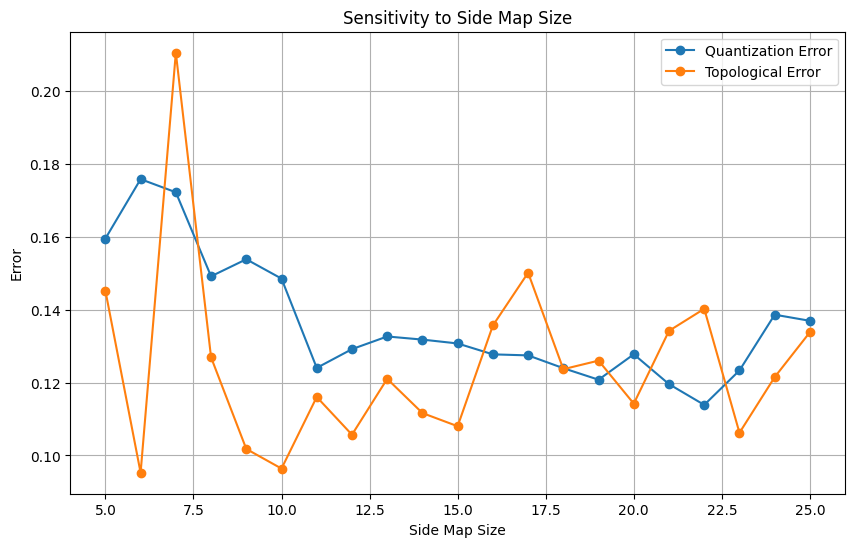

In [9]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

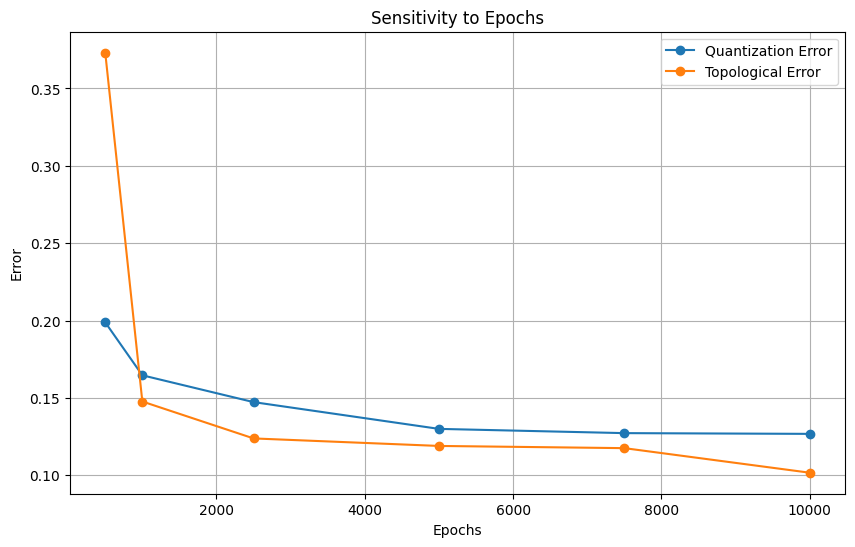

In [10]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

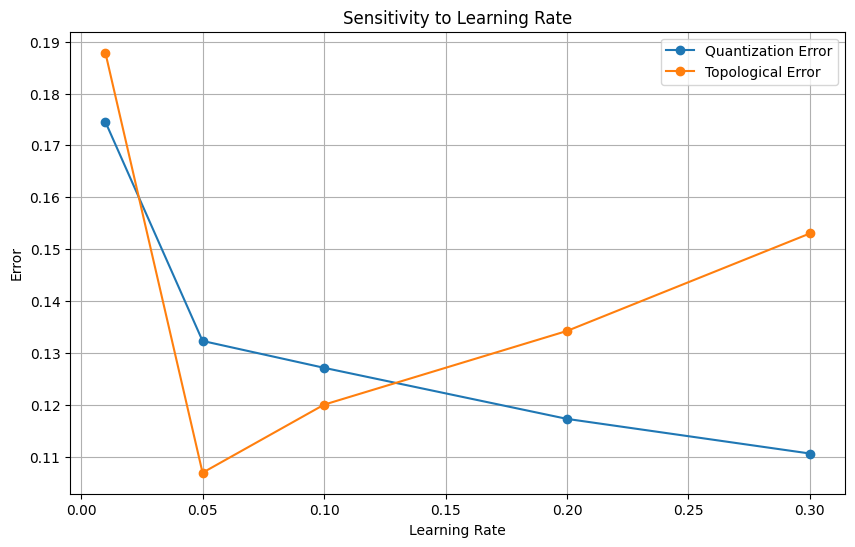

In [11]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()

# Fraud Dataset

## Import and Clean

In [12]:
#Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

url = 'src/creditcard.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)
data[3] = data[3].replace({1: 0, 2: 1})
data = data.iloc[1:]

In [13]:
data = data.astype(float)
filas_con_cero = data[data[30] == 0]

if len(filas_con_cero) >= 274000:
    data = data.drop(filas_con_cero.index[:274000])
datos_mode = wf.drop_missing_values_columns(data, 5)
datos_mode = wf.mode_imputation(datos_mode, 30)
datos_mode[30].value_counts()

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  31


30
0.0    10315
1.0      492
Name: count, dtype: int64

In [14]:
datos_mode=datos_mode.drop(columns = [30])
data_std = wf.min_max_normalization(datos_mode)
target = data[30].values
label_names={0:'No fraude', 1:'Fraude'}
data_som=data_std.to_numpy()
data_som.shape

(10807, 30)

## Grid Search

In [15]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-12 13:42:13,172] A new study created in memory with name: no-name-167229ff-f85d-4ae8-b838-fd892bc51902


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=18, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:42:25,179] Trial 0 finished with value: 0.43045127139816786 and parameters: {'side_map': 18, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 0 with value: 0.43045127139816786.


Trying: side_map=17, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:42:35,917] Trial 1 finished with value: 0.5832060682890718 and parameters: {'side_map': 17, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 0 with value: 0.43045127139816786.


Trying: side_map=15, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:42:46,303] Trial 2 finished with value: 0.5231406764134358 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 0 with value: 0.43045127139816786.


Trying: side_map=16, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:42:56,589] Trial 3 finished with value: 0.6468047635791616 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 0 with value: 0.43045127139816786.


Trying: side_map=10, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:43:09,476] Trial 4 finished with value: 0.3632166262607569 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 4 with value: 0.3632166262607569.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:43:20,105] Trial 5 finished with value: 0.3896127981863607 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 4 with value: 0.3632166262607569.


Trying: side_map=23, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:43:30,941] Trial 6 finished with value: 0.6405115971129823 and parameters: {'side_map': 23, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 4 with value: 0.3632166262607569.


Trying: side_map=19, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:43:43,262] Trial 7 finished with value: 0.3594921800684741 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 7 with value: 0.3594921800684741.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:43:56,096] Trial 8 finished with value: 0.3518078921069677 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 8 with value: 0.3518078921069677.


Trying: side_map=19, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:44:06,537] Trial 9 finished with value: 0.6803447422966595 and parameters: {'side_map': 19, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 8 with value: 0.3518078921069677.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:44:19,704] Trial 10 finished with value: 0.30437661145553807 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:44:33,425] Trial 11 finished with value: 0.3247548107707967 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:44:47,144] Trial 12 finished with value: 0.30897881003053573 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:45:00,594] Trial 13 finished with value: 0.3123556130285926 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:45:14,543] Trial 14 finished with value: 0.3076312797261035 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:45:26,342] Trial 15 finished with value: 0.34849278338114187 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:45:39,433] Trial 16 finished with value: 0.46916484500786526 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:45:52,339] Trial 17 finished with value: 0.44866072915702787 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:46:03,362] Trial 18 finished with value: 0.3356660386786342 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=24, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:46:15,742] Trial 19 finished with value: 0.45653550754140837 and parameters: {'side_map': 24, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:46:28,951] Trial 20 finished with value: 0.32451832515961876 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:46:42,286] Trial 21 finished with value: 0.3367990654205607 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:46:56,047] Trial 22 finished with value: 0.3067521004904229 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:47:08,550] Trial 23 finished with value: 0.3263225104099195 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:47:20,033] Trial 24 finished with value: 0.3533991024336079 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:47:33,663] Trial 25 finished with value: 0.42511129545664844 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:47:45,337] Trial 26 finished with value: 0.5256912038493569 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:47:57,771] Trial 27 finished with value: 0.9225383344128806 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=21, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:48:09,005] Trial 28 finished with value: 0.6254312667715369 and parameters: {'side_map': 21, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=13, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:48:19,671] Trial 29 finished with value: 0.35017492551124274 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:48:30,614] Trial 30 finished with value: 0.3251781956139539 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:48:43,120] Trial 31 finished with value: 0.31872001758119733 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:48:56,725] Trial 32 finished with value: 0.31303659572499304 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:49:09,766] Trial 33 finished with value: 0.31355949292125473 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:49:22,714] Trial 34 finished with value: 0.43758905709262513 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:49:35,313] Trial 35 finished with value: 0.3345049107060239 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=15, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:49:45,603] Trial 36 finished with value: 1.1210677311002128 and parameters: {'side_map': 15, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:49:57,440] Trial 37 finished with value: 0.5020463995558434 and parameters: {'side_map': 5, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:50:10,970] Trial 38 finished with value: 0.32304868696215416 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=10, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:50:22,324] Trial 39 finished with value: 0.34150390024983807 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:50:36,153] Trial 40 finished with value: 0.4475473628203942 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:50:48,949] Trial 41 finished with value: 0.3235397677431295 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:51:01,668] Trial 42 finished with value: 0.3143326899231979 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:51:15,033] Trial 43 finished with value: 0.3206898500971592 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:51:27,839] Trial 44 finished with value: 0.3699695854538725 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:51:40,168] Trial 45 finished with value: 0.35414928934949574 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:51:53,802] Trial 46 finished with value: 0.3173150513556029 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=17, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:52:04,383] Trial 47 finished with value: 0.5302040205422411 and parameters: {'side_map': 17, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:52:15,466] Trial 48 finished with value: 0.3353721708152124 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:52:27,608] Trial 49 finished with value: 0.5267830119367076 and parameters: {'side_map': 8, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:52:41,081] Trial 50 finished with value: 0.3415685944295364 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:52:54,249] Trial 51 finished with value: 0.31280074766355137 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:53:07,561] Trial 52 finished with value: 0.32944792356805774 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:53:21,256] Trial 53 finished with value: 0.32196938650874435 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:53:35,045] Trial 54 finished with value: 0.3425814814472102 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:53:48,023] Trial 55 finished with value: 0.31952823725363194 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:54:01,124] Trial 56 finished with value: 0.5113912501156658 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:54:13,427] Trial 57 finished with value: 0.3257689923197927 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:54:25,149] Trial 58 finished with value: 0.3210879864902378 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:54:38,030] Trial 59 finished with value: 0.43983171740538535 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:54:51,668] Trial 60 finished with value: 0.3804501970944758 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:55:05,030] Trial 61 finished with value: 0.3193296742851855 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:55:18,594] Trial 62 finished with value: 0.33429934394374017 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:55:31,967] Trial 63 finished with value: 0.32817753215508466 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=14, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:55:42,604] Trial 64 finished with value: 0.483832930508004 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:55:55,863] Trial 65 finished with value: 0.31389310539465165 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=6, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:56:08,497] Trial 66 finished with value: 0.46813994540575554 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:56:21,644] Trial 67 finished with value: 0.308861423151661 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=21, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:56:32,146] Trial 68 finished with value: 1.2354320357175905 and parameters: {'side_map': 21, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=25, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:56:44,896] Trial 69 finished with value: 0.4389475275284538 and parameters: {'side_map': 25, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:56:57,138] Trial 70 finished with value: 0.3125303044323124 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:57:09,536] Trial 71 finished with value: 0.32271468029980566 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:57:22,967] Trial 72 finished with value: 0.31423837605255855 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:57:36,081] Trial 73 finished with value: 0.3067050124919034 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:57:47,120] Trial 74 finished with value: 0.3186184399000648 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:57:58,844] Trial 75 finished with value: 0.31813655593596746 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:58:11,699] Trial 76 finished with value: 0.3789963403349681 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:58:24,798] Trial 77 finished with value: 0.32223372443786436 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:58:37,212] Trial 78 finished with value: 0.36797098084574814 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:58:49,724] Trial 79 finished with value: 0.47998511705376146 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:59:02,962] Trial 80 finished with value: 0.32916909688165075 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:59:16,264] Trial 81 finished with value: 0.30521962339224573 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 10 with value: 0.30437661145553807.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:59:29,739] Trial 82 finished with value: 0.29980948921995004 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:59:43,285] Trial 83 finished with value: 0.3318809826964005 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 13:59:56,676] Trial 84 finished with value: 0.3278221930230406 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=7, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:00:09,291] Trial 85 finished with value: 0.4892189895438142 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:00:22,404] Trial 86 finished with value: 0.3082182539095031 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:00:35,351] Trial 87 finished with value: 0.3222719172758397 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:00:46,412] Trial 88 finished with value: 0.32866537799574347 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:00:59,644] Trial 89 finished with value: 0.30948161099287497 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=6, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:01:12,350] Trial 90 finished with value: 0.6604462431757194 and parameters: {'side_map': 6, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:01:25,173] Trial 91 finished with value: 0.3314545017118534 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:01:37,442] Trial 92 finished with value: 0.32610042842602016 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=16, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:01:48,783] Trial 93 finished with value: 0.3723962820394189 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:02:02,085] Trial 94 finished with value: 0.3034705450171185 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 82 with value: 0.29980948921995004.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:02:15,562] Trial 95 finished with value: 0.2969065531599889 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:02:27,987] Trial 96 finished with value: 0.3168857860645877 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:02:41,494] Trial 97 finished with value: 0.42632001480521886 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:02:54,888] Trial 98 finished with value: 0.3010618275192005 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:03:08,104] Trial 99 finished with value: 0.325308289997224 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=8, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:03:21,229] Trial 100 finished with value: 0.3358688655501064 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:03:35,107] Trial 101 finished with value: 0.32591337096326456 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:03:49,073] Trial 102 finished with value: 0.30369486166373644 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:04:03,193] Trial 103 finished with value: 0.3500879494771908 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 95 with value: 0.2969065531599889.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:04:15,929] Trial 104 finished with value: 0.2955222143055427 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:04:29,244] Trial 105 finished with value: 0.3187249708522254 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:04:42,068] Trial 106 finished with value: 0.42216561025261407 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:04:55,535] Trial 107 finished with value: 0.32284899139446654 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:05:08,689] Trial 108 finished with value: 0.3126059979642824 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:05:22,276] Trial 109 finished with value: 0.5314512797261035 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:05:34,879] Trial 110 finished with value: 0.30534342925881375 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:05:47,713] Trial 111 finished with value: 0.31700515869343937 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:05:59,891] Trial 112 finished with value: 0.31576656056259833 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:06:12,981] Trial 113 finished with value: 0.29574978995095774 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:06:26,676] Trial 114 finished with value: 0.3147145294716387 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:06:40,222] Trial 115 finished with value: 0.3002070500601462 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:06:52,459] Trial 116 finished with value: 0.3149056028500046 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:07:05,658] Trial 117 finished with value: 0.3102830711575831 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:07:18,276] Trial 118 finished with value: 0.3405666975108726 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:07:31,783] Trial 119 finished with value: 0.3086071129823263 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=20, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:07:44,042] Trial 120 finished with value: 0.37333690478393633 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:07:58,025] Trial 121 finished with value: 0.33074892662163413 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:08:11,567] Trial 122 finished with value: 0.30365844637734796 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:08:24,981] Trial 123 finished with value: 0.328826016470806 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:08:38,484] Trial 124 finished with value: 0.3058844008513001 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:08:51,787] Trial 125 finished with value: 0.3172216257980938 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=5, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:09:04,837] Trial 126 finished with value: 0.590168847968909 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:09:17,617] Trial 127 finished with value: 0.33767465439067273 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:09:31,222] Trial 128 finished with value: 0.30974521606366245 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:09:44,806] Trial 129 finished with value: 0.31112120755066164 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:09:57,857] Trial 130 finished with value: 0.36559315906356993 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:10:11,429] Trial 131 finished with value: 0.3053932090311835 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:10:24,853] Trial 132 finished with value: 0.33852000370130475 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:10:37,642] Trial 133 finished with value: 0.3348075460349773 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:10:50,774] Trial 134 finished with value: 0.3248203636531878 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:11:04,481] Trial 135 finished with value: 0.31444949754788565 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=5, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:11:17,969] Trial 136 finished with value: 0.35366859072823176 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:11:30,309] Trial 137 finished with value: 0.4943376404182474 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:11:42,807] Trial 138 finished with value: 0.30494641158508373 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:11:55,993] Trial 139 finished with value: 0.33882335430739335 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:12:08,398] Trial 140 finished with value: 0.5565083547700564 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:12:21,523] Trial 141 finished with value: 0.3550860914222263 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:12:34,693] Trial 142 finished with value: 0.35695326640140645 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:12:48,416] Trial 143 finished with value: 0.32295442768575927 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:13:00,952] Trial 144 finished with value: 1.0351330952160636 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:13:14,797] Trial 145 finished with value: 0.31579814749699264 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:13:27,540] Trial 146 finished with value: 0.32505894235217914 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:13:40,487] Trial 147 finished with value: 0.30607021560099934 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:13:53,759] Trial 148 finished with value: 0.3309619589155177 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=5, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:14:05,302] Trial 149 finished with value: 0.35192624595169797 and parameters: {'side_map': 5, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:14:18,339] Trial 150 finished with value: 0.3009990663458869 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:14:31,433] Trial 151 finished with value: 0.314147575645415 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:14:44,716] Trial 152 finished with value: 0.31140330526510596 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:14:57,458] Trial 153 finished with value: 0.30604313778106784 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=18, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:15:08,581] Trial 154 finished with value: 0.3949839428148423 and parameters: {'side_map': 18, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:15:20,898] Trial 155 finished with value: 0.301006261682243 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:15:34,411] Trial 156 finished with value: 0.318064165818451 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=5, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:15:46,861] Trial 157 finished with value: 0.5325636328305727 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:15:59,445] Trial 158 finished with value: 0.31403573609697416 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:16:12,116] Trial 159 finished with value: 0.8620854103821598 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:16:23,331] Trial 160 finished with value: 0.3181276219117239 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:16:36,654] Trial 161 finished with value: 0.3011520079578051 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:16:50,229] Trial 162 finished with value: 0.329834280558897 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:17:03,872] Trial 163 finished with value: 0.3104742768575923 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:17:17,154] Trial 164 finished with value: 0.32366300638475065 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:17:29,242] Trial 165 finished with value: 0.9004819219024707 and parameters: {'side_map': 6, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:17:43,015] Trial 166 finished with value: 0.32286671786804844 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=5, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:17:55,886] Trial 167 finished with value: 0.31360274266679 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:18:09,731] Trial 168 finished with value: 0.33345849356898305 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=5000, learning_rate=0.2
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:18:22,837] Trial 169 finished with value: 0.43377848986767836 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.2}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=23, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:18:33,898] Trial 170 finished with value: 0.6618332747293421 and parameters: {'side_map': 23, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:18:47,259] Trial 171 finished with value: 0.3084868289071898 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:19:01,087] Trial 172 finished with value: 0.30281602387341544 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:19:14,912] Trial 173 finished with value: 0.32260134172295735 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:19:28,575] Trial 174 finished with value: 0.31880748218747107 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:19:41,169] Trial 175 finished with value: 0.31890530767095404 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:19:54,512] Trial 176 finished with value: 0.6315785740723605 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:20:08,305] Trial 177 finished with value: 0.31306327287868974 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:20:22,231] Trial 178 finished with value: 0.3137539280096234 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:20:35,584] Trial 179 finished with value: 0.325257278615712 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:20:48,980] Trial 180 finished with value: 0.3208693198852596 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:21:02,296] Trial 181 finished with value: 0.3066184352734339 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:21:15,578] Trial 182 finished with value: 0.3077425946146017 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:21:29,091] Trial 183 finished with value: 0.31246533080410843 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:21:42,580] Trial 184 finished with value: 0.3117250402516887 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:21:55,558] Trial 185 finished with value: 0.2996371074303692 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=9, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:22:07,711] Trial 186 finished with value: 0.31904101785879524 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:22:20,631] Trial 187 finished with value: 0.3063359091329693 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:22:33,471] Trial 188 finished with value: 0.310179061719256 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:22:46,622] Trial 189 finished with value: 0.3253118589802906 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=6, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:22:59,334] Trial 190 finished with value: 0.41230578698991394 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:23:11,702] Trial 191 finished with value: 0.36636512445637087 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:23:25,378] Trial 192 finished with value: 0.31541059961136303 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 104 with value: 0.2955222143055427.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:23:38,882] Trial 193 finished with value: 0.2842955538077172 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:23:52,400] Trial 194 finished with value: 0.32664422966595724 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:24:05,093] Trial 195 finished with value: 0.8876583797538632 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:24:18,636] Trial 196 finished with value: 0.30106272786157123 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:24:32,578] Trial 197 finished with value: 0.3024056241325067 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:24:44,233] Trial 198 finished with value: 1.0374286406958453 and parameters: {'side_map': 6, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:24:57,511] Trial 199 finished with value: 0.38620788377903215 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:25:10,287] Trial 200 finished with value: 0.3186630572776904 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:25:23,719] Trial 201 finished with value: 0.2956781826593875 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:25:37,426] Trial 202 finished with value: 0.32239343018413996 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:25:50,832] Trial 203 finished with value: 0.3307296705838808 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:26:04,218] Trial 204 finished with value: 0.3152475275284538 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:26:17,939] Trial 205 finished with value: 0.32068356158045713 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:26:31,976] Trial 206 finished with value: 0.3064653715184603 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:26:43,648] Trial 207 finished with value: 0.4719920681040066 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:26:57,148] Trial 208 finished with value: 0.3233620458961784 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:27:10,442] Trial 209 finished with value: 0.3188399611363006 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:27:22,799] Trial 210 finished with value: 0.3200968946053484 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:27:36,277] Trial 211 finished with value: 0.3219950652354955 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:27:49,851] Trial 212 finished with value: 0.30502327750532066 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:28:03,291] Trial 213 finished with value: 0.32251704358286293 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:28:16,932] Trial 214 finished with value: 0.31235867400758766 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:28:29,945] Trial 215 finished with value: 0.30783162949939863 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:28:43,713] Trial 216 finished with value: 0.2876354492458592 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:28:57,161] Trial 217 finished with value: 0.5315921245489035 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:29:10,456] Trial 218 finished with value: 0.30947347274914405 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:29:24,751] Trial 219 finished with value: 0.3298284528546313 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:29:41,738] Trial 220 finished with value: 0.3001043342278153 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:29:57,721] Trial 221 finished with value: 0.2976738438049412 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:30:11,782] Trial 222 finished with value: 0.30075759692791704 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:30:25,401] Trial 223 finished with value: 0.3117928490793005 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:30:39,365] Trial 224 finished with value: 0.3241362653835477 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:30:52,781] Trial 225 finished with value: 0.29762392615897104 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:31:06,532] Trial 226 finished with value: 0.34177904969001577 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:31:19,960] Trial 227 finished with value: 0.31346247154622003 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:31:33,021] Trial 228 finished with value: 0.29596426020172106 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:31:46,024] Trial 229 finished with value: 0.31977578051263067 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:31:59,128] Trial 230 finished with value: 0.3126446201536041 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:32:12,514] Trial 231 finished with value: 0.2919217997594152 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:32:26,300] Trial 232 finished with value: 0.32000650596835384 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:32:39,818] Trial 233 finished with value: 0.3199281835847136 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:32:52,656] Trial 234 finished with value: 0.298666287591376 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:33:05,761] Trial 235 finished with value: 0.334169504950495 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:33:18,601] Trial 236 finished with value: 0.30572234477653376 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:33:31,892] Trial 237 finished with value: 0.31537011659109837 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:33:44,360] Trial 238 finished with value: 0.318090318312205 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:33:56,893] Trial 239 finished with value: 0.3476799370778199 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:34:10,168] Trial 240 finished with value: 0.31325442028314976 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:34:23,711] Trial 241 finished with value: 0.32399614416581846 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:34:36,626] Trial 242 finished with value: 0.31781666604978254 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:34:50,403] Trial 243 finished with value: 0.3128052068104007 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:35:03,369] Trial 244 finished with value: 0.3048427315628759 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:35:16,723] Trial 245 finished with value: 0.32205639770519107 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:35:30,330] Trial 246 finished with value: 0.31145270195243824 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:35:41,937] Trial 247 finished with value: 0.32378294716387523 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:35:55,264] Trial 248 finished with value: 0.32054337003793837 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:36:08,146] Trial 249 finished with value: 0.3512438937725548 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:36:22,230] Trial 250 finished with value: 0.2986026316276488 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:36:34,992] Trial 251 finished with value: 0.3133718663829 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:36:48,655] Trial 252 finished with value: 0.31168732025539003 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:37:01,719] Trial 253 finished with value: 0.41290196169149623 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:37:13,672] Trial 254 finished with value: 0.9852762283705007 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:37:27,320] Trial 255 finished with value: 0.30045822985102244 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:37:40,768] Trial 256 finished with value: 0.2955887054686777 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:37:54,038] Trial 257 finished with value: 0.3104363097992042 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:38:07,723] Trial 258 finished with value: 0.3049008744332377 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:38:21,241] Trial 259 finished with value: 0.5201938965485333 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:38:33,350] Trial 260 finished with value: 0.31125666049782547 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:38:45,524] Trial 261 finished with value: 1.041350969741834 and parameters: {'side_map': 8, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:38:59,314] Trial 262 finished with value: 0.31249962616822424 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:39:12,652] Trial 263 finished with value: 0.3306085426112705 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:39:26,061] Trial 264 finished with value: 0.3253762653835477 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:39:39,563] Trial 265 finished with value: 0.3101045812899047 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:39:53,278] Trial 266 finished with value: 0.30463873137781067 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:40:06,874] Trial 267 finished with value: 0.31008244656241324 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:40:19,841] Trial 268 finished with value: 0.30049751179790873 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:40:32,926] Trial 269 finished with value: 0.31667299435551033 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:40:45,852] Trial 270 finished with value: 0.3109222827796798 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:40:59,289] Trial 271 finished with value: 0.3445493837327658 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:41:11,741] Trial 272 finished with value: 0.32718276209863983 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:41:23,234] Trial 273 finished with value: 0.3587093735541778 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:41:35,054] Trial 274 finished with value: 0.334684541500879 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:41:48,736] Trial 275 finished with value: 0.30408322198575 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:42:01,987] Trial 276 finished with value: 0.3011853696678079 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:42:15,192] Trial 277 finished with value: 0.3228598473211807 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:42:28,764] Trial 278 finished with value: 0.31198163320070327 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=15, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:42:40,658] Trial 279 finished with value: 0.34520929582677895 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:42:53,530] Trial 280 finished with value: 0.31375074026094196 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:43:07,205] Trial 281 finished with value: 0.5214709169982419 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:43:19,015] Trial 282 finished with value: 1.0134663440362728 and parameters: {'side_map': 9, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:43:32,071] Trial 283 finished with value: 0.30053401961691495 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:43:45,517] Trial 284 finished with value: 0.30237729712223554 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:43:59,046] Trial 285 finished with value: 0.3088292153234015 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:44:10,717] Trial 286 finished with value: 0.5027835319700195 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:44:23,997] Trial 287 finished with value: 0.30242000647728323 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:44:37,374] Trial 288 finished with value: 0.3128868205792542 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:44:50,202] Trial 289 finished with value: 0.3330460682890719 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:45:04,203] Trial 290 finished with value: 0.29596416766910333 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:45:17,166] Trial 291 finished with value: 0.31583934209308784 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:45:30,645] Trial 292 finished with value: 0.3093313380216526 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:45:43,777] Trial 293 finished with value: 0.33149131488849815 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:45:57,101] Trial 294 finished with value: 0.30923089756639216 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:46:11,090] Trial 295 finished with value: 0.3064158619413343 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:46:24,468] Trial 296 finished with value: 0.30661162672342 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:46:37,790] Trial 297 finished with value: 0.327440469140372 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:46:50,015] Trial 298 finished with value: 0.3622033126677154 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:47:02,393] Trial 299 finished with value: 0.3647612436383826 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:47:16,362] Trial 300 finished with value: 0.3092741510132322 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=14, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:47:28,097] Trial 301 finished with value: 0.34267671139076517 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:47:41,226] Trial 302 finished with value: 0.30644487091699824 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:47:53,582] Trial 303 finished with value: 0.33436271305635235 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=23, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:48:05,965] Trial 304 finished with value: 0.4451191246414361 and parameters: {'side_map': 23, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:48:19,347] Trial 305 finished with value: 0.3156599888960858 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:48:33,045] Trial 306 finished with value: 0.3172712732488202 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:48:44,935] Trial 307 finished with value: 1.0265016988988618 and parameters: {'side_map': 9, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:48:58,604] Trial 308 finished with value: 0.46063315721291753 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:49:12,151] Trial 309 finished with value: 0.3212793411677617 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=20, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:49:24,453] Trial 310 finished with value: 0.37617668085500133 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:49:38,434] Trial 311 finished with value: 0.31161816230221157 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:49:50,026] Trial 312 finished with value: 0.5365066466179329 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:50:03,192] Trial 313 finished with value: 0.31917475340057366 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:50:15,205] Trial 314 finished with value: 0.3285862783381142 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:50:28,129] Trial 315 finished with value: 0.3232674655315999 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:50:41,253] Trial 316 finished with value: 0.32374321550846674 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:50:54,538] Trial 317 finished with value: 0.2960760969741834 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:51:06,232] Trial 318 finished with value: 0.32228291940408993 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:51:19,258] Trial 319 finished with value: 0.31932969834366615 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:51:32,735] Trial 320 finished with value: 0.3127925030073101 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:51:45,559] Trial 321 finished with value: 0.32692228648098454 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:51:58,978] Trial 322 finished with value: 0.315269562320718 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:52:11,406] Trial 323 finished with value: 0.314455651892292 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:52:24,973] Trial 324 finished with value: 0.30796936800222074 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:52:37,785] Trial 325 finished with value: 0.3549247561765522 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:52:51,008] Trial 326 finished with value: 0.30680538447302674 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:53:04,039] Trial 327 finished with value: 0.3143849838067919 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:53:17,660] Trial 328 finished with value: 0.3059091283427408 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:53:31,022] Trial 329 finished with value: 0.31210630239659476 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:53:43,917] Trial 330 finished with value: 0.33783353289534557 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:53:57,357] Trial 331 finished with value: 0.31175183492180997 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:54:10,784] Trial 332 finished with value: 0.32066082631627646 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=25, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:54:21,489] Trial 333 finished with value: 1.1667412834274082 and parameters: {'side_map': 25, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:54:34,760] Trial 334 finished with value: 0.42802419820486726 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:54:47,513] Trial 335 finished with value: 0.30030017858795227 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:55:00,091] Trial 336 finished with value: 0.3095196196909411 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:55:11,744] Trial 337 finished with value: 1.0761072610345146 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:55:24,425] Trial 338 finished with value: 0.3176165975756454 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:55:37,113] Trial 339 finished with value: 0.3370810659757565 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:55:50,555] Trial 340 finished with value: 0.47609333395021747 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:56:03,045] Trial 341 finished with value: 0.31468371796058114 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:56:16,017] Trial 342 finished with value: 0.3329749551216804 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:56:29,213] Trial 343 finished with value: 0.2972969575275285 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:56:42,418] Trial 344 finished with value: 0.30534711945960946 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:56:55,335] Trial 345 finished with value: 0.3251115684278708 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:57:09,133] Trial 346 finished with value: 0.317934223188674 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:57:22,443] Trial 347 finished with value: 0.3000326732673267 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:57:35,070] Trial 348 finished with value: 0.3141998667530304 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:57:47,982] Trial 349 finished with value: 0.3148683038771167 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:57:59,848] Trial 350 finished with value: 0.3806349227352642 and parameters: {'side_map': 9, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:58:12,801] Trial 351 finished with value: 0.31019575737947624 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:58:25,989] Trial 352 finished with value: 0.3817693874340705 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=18, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:58:37,965] Trial 353 finished with value: 0.37507961969094106 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:58:50,214] Trial 354 finished with value: 0.32081043305265106 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:59:03,120] Trial 355 finished with value: 0.3017448320532987 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:59:16,729] Trial 356 finished with value: 0.3051054214860739 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:59:30,540] Trial 357 finished with value: 0.3214979624317572 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:59:43,634] Trial 358 finished with value: 0.3624963588414916 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 14:59:55,171] Trial 359 finished with value: 0.34385102156009995 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:00:07,867] Trial 360 finished with value: 0.30939638197464603 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:00:19,575] Trial 361 finished with value: 0.34866207087998524 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:00:32,837] Trial 362 finished with value: 0.4422314925511243 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:00:45,833] Trial 363 finished with value: 0.3157016100675488 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:00:59,542] Trial 364 finished with value: 0.3136362441010456 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:01:11,224] Trial 365 finished with value: 1.0125109253261775 and parameters: {'side_map': 9, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:01:23,537] Trial 366 finished with value: 0.37593705098547237 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:01:37,433] Trial 367 finished with value: 0.3234098639770519 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:01:50,838] Trial 368 finished with value: 0.3157260544091793 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:02:03,029] Trial 369 finished with value: 0.7944992005181826 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:02:15,993] Trial 370 finished with value: 0.3232599962986953 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:02:29,601] Trial 371 finished with value: 0.31941484593319147 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:02:43,049] Trial 372 finished with value: 0.3143564411955214 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:02:55,220] Trial 373 finished with value: 0.3263396567039882 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:03:07,831] Trial 374 finished with value: 0.3380664356435643 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:03:20,783] Trial 375 finished with value: 0.31995760803183126 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:03:34,225] Trial 376 finished with value: 0.31698054871842324 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:03:47,796] Trial 377 finished with value: 0.31905788192837975 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:04:00,727] Trial 378 finished with value: 0.311893712408624 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:04:13,246] Trial 379 finished with value: 0.3415805089293976 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:04:26,641] Trial 380 finished with value: 0.30818041362080134 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:04:39,856] Trial 381 finished with value: 0.3202969982418803 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:04:53,591] Trial 382 finished with value: 0.29987864994910707 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:05:07,148] Trial 383 finished with value: 0.31619532617747753 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:05:19,847] Trial 384 finished with value: 0.33225486536504123 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:05:33,104] Trial 385 finished with value: 0.3078612112519663 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:05:47,069] Trial 386 finished with value: 0.3489567234200055 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:06:00,554] Trial 387 finished with value: 0.31191582585361344 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:06:14,232] Trial 388 finished with value: 0.4989353104469325 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:06:27,005] Trial 389 finished with value: 0.30633794299990746 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:06:40,043] Trial 390 finished with value: 0.31569174516517073 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:06:51,733] Trial 391 finished with value: 1.002217180531137 and parameters: {'side_map': 9, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:07:05,546] Trial 392 finished with value: 0.3111249810308134 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:07:19,163] Trial 393 finished with value: 0.3154706532802813 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:07:32,600] Trial 394 finished with value: 0.4457042453965022 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:07:46,436] Trial 395 finished with value: 0.3195383862311465 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:08:00,200] Trial 396 finished with value: 0.3093051605440918 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:08:12,463] Trial 397 finished with value: 1.0785968057740354 and parameters: {'side_map': 8, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:08:25,970] Trial 398 finished with value: 0.30825608401961696 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:08:38,737] Trial 399 finished with value: 0.3155223780882761 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:08:52,301] Trial 400 finished with value: 0.31797366799296745 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:09:04,325] Trial 401 finished with value: 0.368429942629777 and parameters: {'side_map': 9, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:09:17,677] Trial 402 finished with value: 0.32182956139539187 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:09:31,201] Trial 403 finished with value: 0.31144822429906543 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:09:44,585] Trial 404 finished with value: 0.30336264365688903 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:09:57,105] Trial 405 finished with value: 0.36163953918756364 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:10:10,687] Trial 406 finished with value: 0.31640720088831314 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:10:23,528] Trial 407 finished with value: 0.313178274266679 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:10:37,275] Trial 408 finished with value: 0.2998783196076617 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:10:50,761] Trial 409 finished with value: 0.3221924030720829 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:11:04,107] Trial 410 finished with value: 0.3652823540297955 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:11:17,889] Trial 411 finished with value: 0.3188867012121773 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:11:31,353] Trial 412 finished with value: 0.3286308189136671 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:11:44,801] Trial 413 finished with value: 0.30838092625150365 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:11:58,615] Trial 414 finished with value: 0.307061871934857 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:12:12,371] Trial 415 finished with value: 0.3107269232904599 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:12:26,247] Trial 416 finished with value: 0.5501287970759693 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:12:39,946] Trial 417 finished with value: 0.2983910798556491 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:12:53,078] Trial 418 finished with value: 0.3170846099750162 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:13:05,289] Trial 419 finished with value: 0.9514724900527436 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:13:18,818] Trial 420 finished with value: 0.5059003118349218 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:13:32,177] Trial 421 finished with value: 0.3415159470713427 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:13:45,820] Trial 422 finished with value: 0.32544190802257794 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:13:57,871] Trial 423 finished with value: 0.867080922550199 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:14:10,715] Trial 424 finished with value: 0.31645330526510596 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:14:24,184] Trial 425 finished with value: 0.3214491570278523 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:14:37,075] Trial 426 finished with value: 0.33586908947904137 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:14:50,584] Trial 427 finished with value: 0.31167225872119925 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:15:03,949] Trial 428 finished with value: 0.29244281576755804 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:15:16,756] Trial 429 finished with value: 0.38103770241510126 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:15:30,573] Trial 430 finished with value: 0.3252455686129361 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:15:43,774] Trial 431 finished with value: 0.32774762838900706 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:15:57,341] Trial 432 finished with value: 0.4131467733876192 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:16:11,050] Trial 433 finished with value: 0.31671201443508834 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:16:24,061] Trial 434 finished with value: 0.31707302211529564 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:16:37,664] Trial 435 finished with value: 0.3230214851485148 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:16:50,487] Trial 436 finished with value: 0.33343304154714537 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:17:03,863] Trial 437 finished with value: 0.3316932090311835 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:17:17,144] Trial 438 finished with value: 0.3135720708799852 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:17:30,415] Trial 439 finished with value: 0.3129556768760988 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:17:43,913] Trial 440 finished with value: 0.3139367474784862 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:17:57,446] Trial 441 finished with value: 0.423531157583048 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:18:10,423] Trial 442 finished with value: 0.31315960303506984 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:18:23,942] Trial 443 finished with value: 0.32194117238826686 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:18:37,324] Trial 444 finished with value: 0.3266555741648931 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:18:49,562] Trial 445 finished with value: 0.9214871139076525 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:19:02,400] Trial 446 finished with value: 0.4461478365873971 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:19:15,974] Trial 447 finished with value: 0.3104734089016379 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=22, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:19:28,062] Trial 448 finished with value: 0.4691451623947442 and parameters: {'side_map': 22, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:19:41,444] Trial 449 finished with value: 0.30478299157953176 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:19:52,962] Trial 450 finished with value: 1.134759922272601 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:20:06,657] Trial 451 finished with value: 0.3191570954011289 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=19, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:20:19,312] Trial 452 finished with value: 0.38189025539002497 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:20:32,513] Trial 453 finished with value: 0.29701176459702044 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:20:45,320] Trial 454 finished with value: 0.31639381049319887 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:20:57,937] Trial 455 finished with value: 0.32787313500508924 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:21:11,242] Trial 456 finished with value: 0.32026593226612377 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:21:24,674] Trial 457 finished with value: 0.30769229851022484 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:21:37,420] Trial 458 finished with value: 0.3549275682428056 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:21:51,308] Trial 459 finished with value: 0.30883020449708515 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:22:04,663] Trial 460 finished with value: 0.30602340427500696 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:22:18,229] Trial 461 finished with value: 0.3202295290089756 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:22:31,825] Trial 462 finished with value: 0.3193770879985195 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:22:45,064] Trial 463 finished with value: 0.3062584056629962 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:22:58,108] Trial 464 finished with value: 0.3771778069769594 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:23:10,870] Trial 465 finished with value: 0.3161655898954381 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:23:24,047] Trial 466 finished with value: 0.2985382640880911 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:23:37,243] Trial 467 finished with value: 0.3042444619228278 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:23:48,572] Trial 468 finished with value: 0.38203980012954564 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:24:01,581] Trial 469 finished with value: 0.30982786619783476 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:24:14,738] Trial 470 finished with value: 0.32150151660960485 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:24:28,436] Trial 471 finished with value: 0.30879156657721846 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=15, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:24:39,531] Trial 472 finished with value: 0.3583947894882946 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:24:52,566] Trial 473 finished with value: 0.32303921624872767 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:25:05,892] Trial 474 finished with value: 0.3173424706208938 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:25:18,325] Trial 475 finished with value: 0.31630626168224296 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:25:29,561] Trial 476 finished with value: 0.3484406218191912 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:25:41,750] Trial 477 finished with value: 0.734423164615527 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:25:54,090] Trial 478 finished with value: 0.4109235884149163 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:26:07,611] Trial 479 finished with value: 0.31880244008513 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:26:19,620] Trial 480 finished with value: 1.0424460738410288 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:26:33,329] Trial 481 finished with value: 0.29311214398075325 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:26:46,545] Trial 482 finished with value: 0.3072861561950588 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:27:00,140] Trial 483 finished with value: 0.30844501526788193 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:27:12,398] Trial 484 finished with value: 0.322401939483668 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:27:25,416] Trial 485 finished with value: 0.3706133866938096 and parameters: {'side_map': 7, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:27:38,376] Trial 486 finished with value: 0.29858089756639217 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:27:51,364] Trial 487 finished with value: 0.30067947626538355 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:28:05,106] Trial 488 finished with value: 0.3189285657444249 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:28:18,140] Trial 489 finished with value: 0.3129172721384288 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:28:31,918] Trial 490 finished with value: 0.3211403506986213 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:28:45,254] Trial 491 finished with value: 0.3652274905154067 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:28:58,186] Trial 492 finished with value: 0.32121812806514294 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:29:11,621] Trial 493 finished with value: 0.3039512797261035 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:29:24,015] Trial 494 finished with value: 0.3141946738225224 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:29:36,995] Trial 495 finished with value: 0.45210778847043587 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:29:50,261] Trial 496 finished with value: 0.3207155741648931 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:30:03,851] Trial 497 finished with value: 0.3008803978902563 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:30:17,348] Trial 498 finished with value: 0.3037801767372999 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:30:30,534] Trial 499 finished with value: 0.3255424114000185 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:30:43,889] Trial 500 finished with value: 0.3228647348940502 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:30:57,466] Trial 501 finished with value: 0.4621939465161469 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=16, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:31:09,419] Trial 502 finished with value: 0.3327100879059869 and parameters: {'side_map': 16, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:31:22,938] Trial 503 finished with value: 0.33149347552512265 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:31:35,320] Trial 504 finished with value: 0.9037836171000277 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:31:48,755] Trial 505 finished with value: 0.3208791255667623 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:32:02,035] Trial 506 finished with value: 0.31991918663829005 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:32:15,070] Trial 507 finished with value: 0.3088396678079023 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:32:27,050] Trial 508 finished with value: 1.035912470620894 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:32:41,075] Trial 509 finished with value: 0.3145410696770612 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:32:54,211] Trial 510 finished with value: 0.3122633450541316 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:33:07,612] Trial 511 finished with value: 0.3056367826408809 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:33:20,060] Trial 512 finished with value: 0.3705894697881003 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:33:33,479] Trial 513 finished with value: 0.3147627556213565 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:33:47,059] Trial 514 finished with value: 0.30372925973905807 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:34:00,021] Trial 515 finished with value: 0.31817459054316644 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:34:13,742] Trial 516 finished with value: 0.31845424169519754 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:34:26,210] Trial 517 finished with value: 0.3592914361062275 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:34:39,322] Trial 518 finished with value: 0.3114203914129731 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:34:52,965] Trial 519 finished with value: 0.3296936485611178 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:35:04,510] Trial 520 finished with value: 0.32216110113815116 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:35:18,177] Trial 521 finished with value: 0.3176113102618673 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:35:30,911] Trial 522 finished with value: 0.41430077727398906 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:35:43,714] Trial 523 finished with value: 0.3015634449893587 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:35:57,072] Trial 524 finished with value: 0.32527793559729806 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:36:10,632] Trial 525 finished with value: 0.3104531035439993 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=24, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:36:23,261] Trial 526 finished with value: 0.43869339779772365 and parameters: {'side_map': 24, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:36:36,890] Trial 527 finished with value: 0.30965962709355044 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:36:50,381] Trial 528 finished with value: 0.31162772832423435 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:37:03,649] Trial 529 finished with value: 0.29687473304339773 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:37:15,692] Trial 530 finished with value: 0.31304898584250945 and parameters: {'side_map': 5, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:37:29,308] Trial 531 finished with value: 0.3059692143980753 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:37:42,489] Trial 532 finished with value: 0.3260020718053114 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:37:53,764] Trial 533 finished with value: 0.3212110326640141 and parameters: {'side_map': 5, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:38:06,521] Trial 534 finished with value: 0.30917104654390676 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:38:18,672] Trial 535 finished with value: 0.30106506801147404 and parameters: {'side_map': 5, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:38:31,727] Trial 536 finished with value: 0.320197882853706 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:38:44,301] Trial 537 finished with value: 0.32766302489127413 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:38:57,412] Trial 538 finished with value: 0.3222570787452577 and parameters: {'side_map': 6, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:39:09,599] Trial 539 finished with value: 0.9871018839640973 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:39:22,363] Trial 540 finished with value: 0.3604297214768206 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:39:35,202] Trial 541 finished with value: 0.3247941158508374 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:39:47,496] Trial 542 finished with value: 1.099469671509207 and parameters: {'side_map': 8, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:40:00,607] Trial 543 finished with value: 0.316985719441103 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:40:12,968] Trial 544 finished with value: 0.3681519616914963 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:40:25,842] Trial 545 finished with value: 0.32138978902563153 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=18, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:40:37,574] Trial 546 finished with value: 0.36627202553900245 and parameters: {'side_map': 18, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:40:50,628] Trial 547 finished with value: 0.42277383732765794 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:41:04,546] Trial 548 finished with value: 0.33933649578976594 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:41:17,695] Trial 549 finished with value: 0.3194576163597668 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:41:30,633] Trial 550 finished with value: 0.3172600712501157 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:41:44,182] Trial 551 finished with value: 0.3062070324789488 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:41:57,429] Trial 552 finished with value: 0.2949747311927454 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:42:11,684] Trial 553 finished with value: 0.3184866290367355 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:42:24,395] Trial 554 finished with value: 0.4475136346812251 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:42:37,806] Trial 555 finished with value: 0.3127252040344221 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:42:51,904] Trial 556 finished with value: 0.3195755251226057 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:43:03,782] Trial 557 finished with value: 0.3261367391505506 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:43:17,196] Trial 558 finished with value: 0.31506338761913577 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:43:29,942] Trial 559 finished with value: 0.32600688350143425 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:43:42,867] Trial 560 finished with value: 0.318699024706209 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:43:55,043] Trial 561 finished with value: 0.3202796335708337 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:44:08,558] Trial 562 finished with value: 0.326291042842602 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:44:21,989] Trial 563 finished with value: 0.33746200148052186 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:44:36,050] Trial 564 finished with value: 0.3297592162487277 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:44:49,084] Trial 565 finished with value: 0.3453916017396132 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:45:02,912] Trial 566 finished with value: 0.2954011640603313 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:45:16,578] Trial 567 finished with value: 0.3098662311464791 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:45:30,059] Trial 568 finished with value: 0.336627757934672 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:45:43,341] Trial 569 finished with value: 0.2960248440825391 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:45:56,842] Trial 570 finished with value: 0.3085094540575553 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:46:10,338] Trial 571 finished with value: 0.34242568520403444 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:46:23,360] Trial 572 finished with value: 0.30426638197464606 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:46:36,832] Trial 573 finished with value: 0.3137835828629592 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:46:50,301] Trial 574 finished with value: 0.3049939002498381 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:47:04,062] Trial 575 finished with value: 0.4341621199222726 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:47:17,727] Trial 576 finished with value: 0.32181338299250484 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:47:31,040] Trial 577 finished with value: 0.3161443240492274 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:47:44,735] Trial 578 finished with value: 0.30874891089108913 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:47:58,028] Trial 579 finished with value: 0.31164197927269366 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:48:11,566] Trial 580 finished with value: 0.32611129268066996 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:48:24,479] Trial 581 finished with value: 0.5220827001017858 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:48:36,943] Trial 582 finished with value: 0.959788545387249 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:48:50,214] Trial 583 finished with value: 0.32619640880910517 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:49:04,119] Trial 584 finished with value: 0.31120968631442586 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:49:17,753] Trial 585 finished with value: 0.3087506181178866 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:49:30,589] Trial 586 finished with value: 0.33161089201443505 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=17, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:49:42,398] Trial 587 finished with value: 0.3661422022763024 and parameters: {'side_map': 17, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:49:55,880] Trial 588 finished with value: 0.34096574257425744 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:50:09,510] Trial 589 finished with value: 0.3171337077819931 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:50:22,681] Trial 590 finished with value: 0.31947459146849266 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=20, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:50:34,779] Trial 591 finished with value: 0.3878964846858518 and parameters: {'side_map': 20, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:50:48,110] Trial 592 finished with value: 0.3198842713056352 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:51:02,187] Trial 593 finished with value: 0.40534859165355785 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:51:16,560] Trial 594 finished with value: 0.31260279911168687 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:51:29,611] Trial 595 finished with value: 0.32062742851855275 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:51:42,852] Trial 596 finished with value: 0.30228159248635145 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:51:56,453] Trial 597 finished with value: 0.3692549023780883 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:52:09,554] Trial 598 finished with value: 0.319743754048302 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:52:22,928] Trial 599 finished with value: 0.30111315906356995 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:52:34,853] Trial 600 finished with value: 0.8293945646340335 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:52:48,457] Trial 601 finished with value: 0.30890753955769407 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:53:01,825] Trial 602 finished with value: 0.4784850282224484 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:53:14,409] Trial 603 finished with value: 1.1333021041917277 and parameters: {'side_map': 8, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:53:27,612] Trial 604 finished with value: 0.30879210604237994 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:53:41,123] Trial 605 finished with value: 0.32643424724715464 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:53:54,344] Trial 606 finished with value: 0.3104492837975386 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:54:08,030] Trial 607 finished with value: 0.5159176394929212 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:54:21,007] Trial 608 finished with value: 0.3025564300916073 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:54:33,330] Trial 609 finished with value: 0.3518646405107801 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:54:46,632] Trial 610 finished with value: 0.30759893494956975 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:55:00,305] Trial 611 finished with value: 0.29108370870731937 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:55:13,538] Trial 612 finished with value: 0.3120075904506338 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=21, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:55:26,664] Trial 613 finished with value: 0.3993151327843065 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:55:39,925] Trial 614 finished with value: 0.32020875173498664 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:55:53,021] Trial 615 finished with value: 0.32027861108540756 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:56:06,557] Trial 616 finished with value: 0.308469082076432 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:56:19,939] Trial 617 finished with value: 0.3274679069121866 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:56:33,669] Trial 618 finished with value: 0.30547694919959284 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:56:46,815] Trial 619 finished with value: 0.4752485537151846 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:57:00,652] Trial 620 finished with value: 0.3058097908762839 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:57:14,390] Trial 621 finished with value: 0.3020138798926622 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:57:28,785] Trial 622 finished with value: 0.30201247709817713 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=6, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:57:41,456] Trial 623 finished with value: 0.31452635976681775 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:57:55,393] Trial 624 finished with value: 0.34184895530674564 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:58:07,675] Trial 625 finished with value: 0.9547518395484409 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:58:21,237] Trial 626 finished with value: 0.3083180845748126 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:58:33,878] Trial 627 finished with value: 0.7690489627093551 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=5, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:58:46,535] Trial 628 finished with value: 0.6944825122605718 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 193 with value: 0.2842955538077172.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10807 [00:00<?, ?it/s]

[I 2025-03-12 15:58:59,856] Trial 629 finished with value: 0.335459144998612 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 193 with value: 0.2842955538077172.


In [16]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")

Mejores hiperparámetros: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}

Training Time Statistics:
Median Training Time: 1.26 seconds
Standard Deviation: 0.42 seconds
Total Training Time: 11 minutes 36 seconds


## Sensitivity Analysis

In [17]:
errors_df = pd.DataFrame(errors)

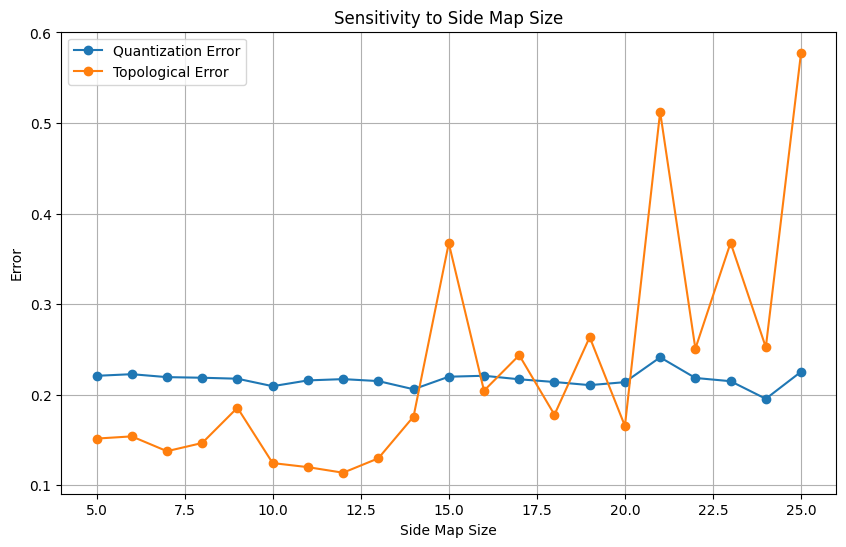

In [18]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

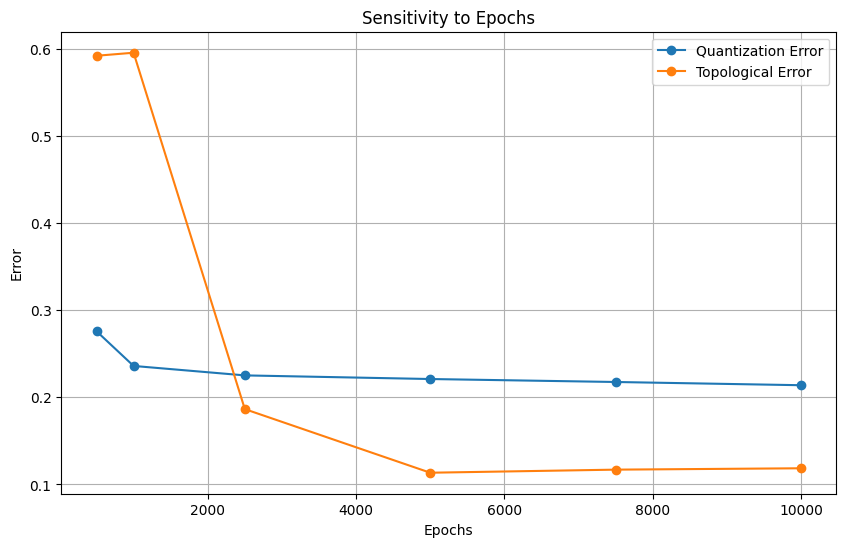

In [19]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

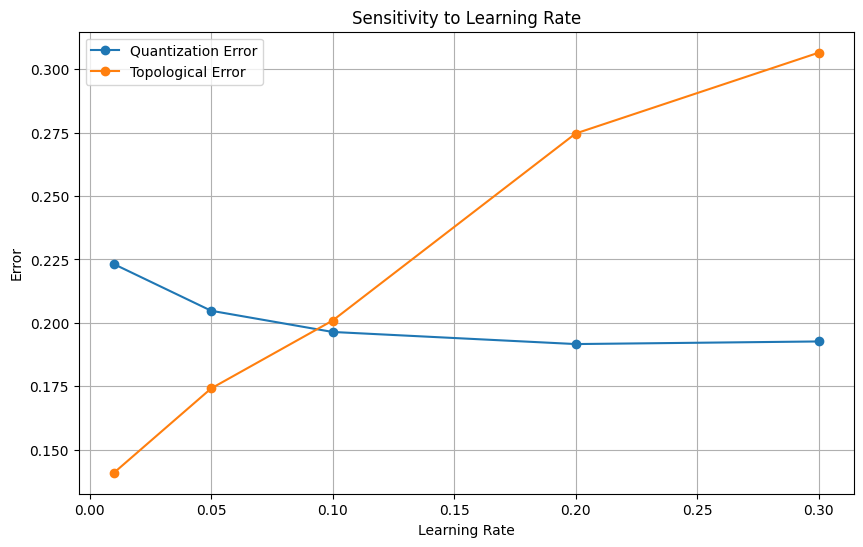

In [20]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()

# Microcalcification Dataset

## Import and Clean

In [2]:
# https://www.kaggle.com/datasets/sudhanshu2198/microcalcification-classification
url = 'src/microcalcification.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)
data = data.iloc[1:]
data[6] = data[6].str.strip("'").astype(int)
data[6] = data[6].replace({-1: 0})

In [3]:
data = data.astype(float)
'''# Contar cuántas filas tienen un valor de 0 en la columna "columna_nombre"
filas_con_cero = data[data[30] == 0]

# Verificar si hay suficientes filas con 0 antes de eliminar
if len(filas_con_cero) >= 274000:
    # Eliminar las primeras 180,000 filas con 0
    data = data.drop(filas_con_cero.index[:274000])'''
datos_mode = wf.drop_missing_values_columns(data, 5)
datos_mode = wf.mode_imputation(datos_mode, 6)
datos_mode[6].value_counts()

Columnas dropeadas:  []
Numero de columnas dropeadas:  0
Numero de columnas tras aplicar el porcentaje:  7


6
0.0    10923
1.0      260
Name: count, dtype: int64

In [4]:
datos_mode=datos_mode.drop(columns = [6])
data_std = wf.min_max_normalization(datos_mode)
target = data[6].values
label_names={0:'Micro', 1:'No micro'}
data_som=data_std.to_numpy()

## Gridsearch

In [5]:
training_times = []
total_times = []
errors = []

study = optuna.create_study(direction='minimize')

with tqdm(total=n_trials, desc="Optimizando Hiperparámetros") as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=n_trials, callbacks=[callback])

best_params = study.best_params

median_time = np.median(training_times)
std_time = np.std(training_times)
total_time = sum(training_times)

[I 2025-03-14 09:10:55,607] A new study created in memory with name: no-name-e4001d02-172f-471e-8eab-4710ec13b11e


Optimizando Hiperparámetros:   0%|          | 0/630 [00:00<?, ?it/s]

Trying: side_map=20, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:11:06,849] Trial 0 finished with value: 0.14267524188500402 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:11:19,753] Trial 1 finished with value: 0.16052298399356166 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=16, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:11:33,304] Trial 2 finished with value: 1.160512337476527 and parameters: {'side_map': 16, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=22, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:11:49,954] Trial 3 finished with value: 0.24818251005991238 and parameters: {'side_map': 22, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=5, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:12:16,264] Trial 4 finished with value: 0.14711904855584368 and parameters: {'side_map': 5, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=19, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:12:31,683] Trial 5 finished with value: 0.16265507645533397 and parameters: {'side_map': 19, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=21, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:12:46,563] Trial 6 finished with value: 0.15073276401681124 and parameters: {'side_map': 21, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=7, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:13:02,868] Trial 7 finished with value: 0.23015839488509343 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=13, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:13:18,878] Trial 8 finished with value: 0.15728910757399625 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:13:34,944] Trial 9 finished with value: 0.15786471876956093 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=25, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:13:48,729] Trial 10 finished with value: 0.19348082357149246 and parameters: {'side_map': 25, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=10, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:14:02,516] Trial 11 finished with value: 0.18003884646338192 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=17, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:14:17,278] Trial 12 finished with value: 0.1570566395421622 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=10, epochs=1000, learning_rate=0.2
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:14:31,681] Trial 13 finished with value: 0.17252493874631136 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.2}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=25, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:14:47,035] Trial 14 finished with value: 0.20402807922739874 and parameters: {'side_map': 25, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 0 with value: 0.14267524188500402.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:15:01,765] Trial 15 finished with value: 0.13883492175623713 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 15 with value: 0.13883492175623713.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:15:18,551] Trial 16 finished with value: 0.13121720289725475 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:15:38,121] Trial 17 finished with value: 0.17381498524546188 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=8, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:15:54,437] Trial 18 finished with value: 0.19587115353661808 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:16:08,225] Trial 19 finished with value: 0.190086376643119 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=9, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:16:24,247] Trial 20 finished with value: 0.18577361173209336 and parameters: {'side_map': 9, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=15, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:16:36,566] Trial 21 finished with value: 0.2837165268711437 and parameters: {'side_map': 15, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=17, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:16:49,313] Trial 22 finished with value: 0.15079693195028168 and parameters: {'side_map': 17, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=19, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:17:01,768] Trial 23 finished with value: 0.1618567906644013 and parameters: {'side_map': 19, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=13, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:17:14,246] Trial 24 finished with value: 0.15693448090852186 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=22, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:17:26,569] Trial 25 finished with value: 0.33975389966914066 and parameters: {'side_map': 22, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:17:40,287] Trial 26 finished with value: 0.14142194133953323 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:17:52,878] Trial 27 finished with value: 0.1705072887418403 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=8, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:18:07,664] Trial 28 finished with value: 0.2290038075650541 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:18:22,778] Trial 29 finished with value: 0.14086621479030673 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=10, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:18:35,871] Trial 30 finished with value: 0.26008746221944024 and parameters: {'side_map': 10, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:18:49,982] Trial 31 finished with value: 0.1327305204327998 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:19:03,343] Trial 32 finished with value: 0.1626197120629527 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:19:16,860] Trial 33 finished with value: 0.1414491531789323 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=15, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:19:29,967] Trial 34 finished with value: 0.2183956165608513 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:19:45,513] Trial 35 finished with value: 0.14357576321201826 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=14, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:19:57,781] Trial 36 finished with value: 0.21430304569435749 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:20:11,247] Trial 37 finished with value: 0.17281339980327282 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=5, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:20:24,803] Trial 38 finished with value: 0.16703954931592596 and parameters: {'side_map': 5, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=8, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:20:40,342] Trial 39 finished with value: 0.19112534114280605 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=13, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:20:53,988] Trial 40 finished with value: 0.18029173924707143 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:21:08,446] Trial 41 finished with value: 0.14284629258696235 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:21:23,672] Trial 42 finished with value: 0.1348204524725029 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:21:37,365] Trial 43 finished with value: 0.15164619601180362 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:21:52,608] Trial 44 finished with value: 0.14295938478047035 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=16, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:22:04,851] Trial 45 finished with value: 0.8019020262899044 and parameters: {'side_map': 16, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:22:18,416] Trial 46 finished with value: 0.15836305463650183 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=6, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:22:33,156] Trial 47 finished with value: 0.2055124268979701 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:22:47,125] Trial 48 finished with value: 0.18562508897433605 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=13, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:23:00,689] Trial 49 finished with value: 0.15754018420817312 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=7, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:23:14,344] Trial 50 finished with value: 0.22089038808906375 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:23:28,991] Trial 51 finished with value: 0.1567895421622105 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 16 with value: 0.13121720289725475.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:23:42,557] Trial 52 finished with value: 0.12083592148797281 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:23:56,873] Trial 53 finished with value: 0.15606927121523742 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:24:10,574] Trial 54 finished with value: 0.14047549137083074 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=9, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:24:24,743] Trial 55 finished with value: 0.1772393552713941 and parameters: {'side_map': 9, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=13, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:24:38,405] Trial 56 finished with value: 0.1617487552535098 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=14, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:24:53,218] Trial 57 finished with value: 0.1950561074845748 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=10, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:25:06,650] Trial 58 finished with value: 0.18688856031476347 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=16, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:25:19,362] Trial 59 finished with value: 0.18752488330501654 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=11, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:25:33,042] Trial 60 finished with value: 0.22716173567021372 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:25:47,865] Trial 61 finished with value: 0.13247274523830815 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:26:01,463] Trial 62 finished with value: 0.16495647590092105 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:26:14,884] Trial 63 finished with value: 0.17036218903693107 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=11, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:26:28,496] Trial 64 finished with value: 0.13686635786461593 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=12, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:26:41,794] Trial 65 finished with value: 0.20922912366985605 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=9, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:26:57,688] Trial 66 finished with value: 0.16260077617812752 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=10, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:27:11,621] Trial 67 finished with value: 0.14860664401323437 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=13, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:27:24,901] Trial 68 finished with value: 0.14461848877760886 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:27:38,390] Trial 69 finished with value: 0.15333537601716893 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 52 with value: 0.12083592148797281.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:27:54,059] Trial 70 finished with value: 0.11668504336939997 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:28:11,633] Trial 71 finished with value: 0.1265093311276044 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:28:26,971] Trial 72 finished with value: 0.14727214700885272 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:28:42,389] Trial 73 finished with value: 0.1407484315478852 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:28:58,934] Trial 74 finished with value: 0.1554611955646964 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:29:16,190] Trial 75 finished with value: 0.12562504068675667 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:29:32,309] Trial 76 finished with value: 0.149888765984083 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:29:48,463] Trial 77 finished with value: 0.1392252928552267 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:30:04,003] Trial 78 finished with value: 0.2382594902977734 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=5, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:30:19,577] Trial 79 finished with value: 0.17719552713940803 and parameters: {'side_map': 5, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=9, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:30:35,499] Trial 80 finished with value: 0.15380680407761782 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:30:50,329] Trial 81 finished with value: 0.16958356970401503 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:31:06,502] Trial 82 finished with value: 0.12390878655101493 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:31:22,221] Trial 83 finished with value: 0.13336353572386658 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=7, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:31:36,971] Trial 84 finished with value: 0.17228702137172494 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:31:52,355] Trial 85 finished with value: 0.1602944049002951 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:32:08,240] Trial 86 finished with value: 0.1596630832513637 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=7, epochs=1000, learning_rate=0.3
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:32:22,061] Trial 87 finished with value: 0.2531081677546276 and parameters: {'side_map': 7, 'epochs': 1000, 'learning_rate': 0.3}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:32:37,943] Trial 88 finished with value: 0.1937309729053027 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=6, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:32:53,163] Trial 89 finished with value: 0.16233473307699187 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=24, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:33:08,064] Trial 90 finished with value: 0.18714610033085935 and parameters: {'side_map': 24, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:33:23,342] Trial 91 finished with value: 0.1469855727443441 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:33:38,311] Trial 92 finished with value: 0.14165688992220332 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 70 with value: 0.11668504336939997.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:33:52,541] Trial 93 finished with value: 0.113750531163373 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:34:06,454] Trial 94 finished with value: 0.15533711437002595 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=9, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:34:20,849] Trial 95 finished with value: 0.21139507824376286 and parameters: {'side_map': 9, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:34:35,897] Trial 96 finished with value: 0.1252875641598855 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:34:49,878] Trial 97 finished with value: 0.15212211213448984 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:35:04,368] Trial 98 finished with value: 0.14950886881874273 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 93 with value: 0.113750531163373.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:35:20,217] Trial 99 finished with value: 0.10819421174997763 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 99 with value: 0.10819421174997763.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:35:36,245] Trial 100 finished with value: 0.16886716355181974 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 99 with value: 0.10819421174997763.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:35:50,181] Trial 101 finished with value: 0.15124173656442816 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 99 with value: 0.10819421174997763.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:36:04,649] Trial 102 finished with value: 0.10004254314584637 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:36:18,527] Trial 103 finished with value: 0.15425619601180363 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:36:33,753] Trial 104 finished with value: 0.15673968165966198 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:36:47,004] Trial 105 finished with value: 0.7861988366270232 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:37:02,982] Trial 106 finished with value: 0.15964027362961636 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:37:18,760] Trial 107 finished with value: 0.12955598855405526 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:37:34,110] Trial 108 finished with value: 0.13636791469194312 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:37:50,040] Trial 109 finished with value: 0.20185725207904853 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:38:05,615] Trial 110 finished with value: 0.1980638782079943 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:38:21,130] Trial 111 finished with value: 0.20133541893946166 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:38:35,543] Trial 112 finished with value: 0.18022575426987392 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:38:49,715] Trial 113 finished with value: 0.203417544487168 and parameters: {'side_map': 10, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:39:04,075] Trial 114 finished with value: 0.1824246302423321 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:39:18,750] Trial 115 finished with value: 0.16001718143610838 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:39:32,596] Trial 116 finished with value: 0.1308434758114996 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:39:46,599] Trial 117 finished with value: 0.13871399803272824 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:40:01,031] Trial 118 finished with value: 0.14639974693731556 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:40:17,125] Trial 119 finished with value: 0.18183161048019314 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:40:31,904] Trial 120 finished with value: 0.1461470043816507 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:40:45,220] Trial 121 finished with value: 0.15329283823660914 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:40:59,431] Trial 122 finished with value: 0.1609247724224269 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:41:14,419] Trial 123 finished with value: 0.15816762943753912 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:41:32,913] Trial 124 finished with value: 0.13452618796387372 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:41:48,510] Trial 125 finished with value: 0.15368699096843425 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:42:03,522] Trial 126 finished with value: 0.15545748994008765 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:42:19,123] Trial 127 finished with value: 0.1718113842439417 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:42:38,898] Trial 128 finished with value: 0.19404353393543772 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:42:56,488] Trial 129 finished with value: 0.1466316918537065 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:43:14,415] Trial 130 finished with value: 0.16294008316194222 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:43:32,130] Trial 131 finished with value: 0.18355667799338282 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:43:49,999] Trial 132 finished with value: 0.12841414021282305 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:44:06,763] Trial 133 finished with value: 0.14527495484217115 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:44:23,398] Trial 134 finished with value: 0.1605849423231691 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:44:41,375] Trial 135 finished with value: 0.11078314226951623 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:44:59,186] Trial 136 finished with value: 0.16570471161584546 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:45:15,345] Trial 137 finished with value: 0.14867201108825895 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:45:34,895] Trial 138 finished with value: 0.83729369578825 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:45:54,354] Trial 139 finished with value: 0.12267410265581685 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:46:12,525] Trial 140 finished with value: 0.16001260574085666 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:46:29,311] Trial 141 finished with value: 0.1564370777072342 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:46:45,059] Trial 142 finished with value: 0.1562154028436019 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:47:00,834] Trial 143 finished with value: 0.16476215326835375 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:47:17,554] Trial 144 finished with value: 0.15790074756326566 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:47:35,405] Trial 145 finished with value: 0.13927570329965125 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:47:56,010] Trial 146 finished with value: 0.21282606813913973 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:48:14,806] Trial 147 finished with value: 0.1799724179558258 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:48:32,348] Trial 148 finished with value: 0.14507950460520433 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:48:51,840] Trial 149 finished with value: 0.14253190109988376 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:49:09,866] Trial 150 finished with value: 0.16306349816686042 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:49:26,478] Trial 151 finished with value: 0.15124150675131895 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:49:41,801] Trial 152 finished with value: 0.15351013413216488 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:49:59,936] Trial 153 finished with value: 0.1328226316730752 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:50:17,561] Trial 154 finished with value: 0.1407474729500134 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:50:35,721] Trial 155 finished with value: 0.13830102924081195 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:50:52,761] Trial 156 finished with value: 0.13012803809353485 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:51:10,022] Trial 157 finished with value: 0.14298634445139943 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:51:27,355] Trial 158 finished with value: 0.18524718590718053 and parameters: {'side_map': 8, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:51:45,474] Trial 159 finished with value: 0.12139478494142895 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:52:05,068] Trial 160 finished with value: 0.14271188500402396 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:52:23,022] Trial 161 finished with value: 0.14458279978538852 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:52:41,003] Trial 162 finished with value: 0.1334847724224269 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:52:58,673] Trial 163 finished with value: 0.18177459894482698 and parameters: {'side_map': 6, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.2
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:53:16,817] Trial 164 finished with value: 0.18278567647321828 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:53:37,943] Trial 165 finished with value: 0.20363087364750065 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:53:52,594] Trial 166 finished with value: 0.1513169551998569 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:54:06,634] Trial 167 finished with value: 0.18350478672985782 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:54:20,406] Trial 168 finished with value: 0.14195808012161315 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:54:36,278] Trial 169 finished with value: 0.16403976303317536 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:54:49,122] Trial 170 finished with value: 0.190965766788876 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:55:04,278] Trial 171 finished with value: 0.13181605204327998 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:55:18,413] Trial 172 finished with value: 0.13782288831261735 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:55:32,379] Trial 173 finished with value: 0.1373815818653313 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:55:46,519] Trial 174 finished with value: 0.1310869060180631 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:56:00,709] Trial 175 finished with value: 0.1589945587051775 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:56:16,971] Trial 176 finished with value: 0.15190561030135027 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:56:30,918] Trial 177 finished with value: 0.1391163650183314 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:56:45,602] Trial 178 finished with value: 0.1791008468210677 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=21, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:56:58,779] Trial 179 finished with value: 0.1595777438969865 and parameters: {'side_map': 21, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:57:13,368] Trial 180 finished with value: 0.14732978181167844 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:57:26,943] Trial 181 finished with value: 0.13435767861933293 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:57:40,390] Trial 182 finished with value: 0.1623789144236788 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:57:53,672] Trial 183 finished with value: 0.12675853169990164 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:58:07,574] Trial 184 finished with value: 0.12234897254761692 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:58:22,031] Trial 185 finished with value: 0.16091083340785123 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:58:35,590] Trial 186 finished with value: 0.15580727801126712 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:58:50,350] Trial 187 finished with value: 0.2063739166592149 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:59:03,943] Trial 188 finished with value: 0.13394275686309576 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:59:16,824] Trial 189 finished with value: 0.1398798873289815 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:59:30,583] Trial 190 finished with value: 0.16952769292676384 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:59:43,565] Trial 191 finished with value: 0.1311941947599034 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 09:59:57,360] Trial 192 finished with value: 0.15744427166234462 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:00:11,461] Trial 193 finished with value: 0.15925990521327013 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:00:26,295] Trial 194 finished with value: 0.1487600160958598 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:00:39,434] Trial 195 finished with value: 0.13659379862290977 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:00:52,826] Trial 196 finished with value: 0.19278396226415095 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:01:06,485] Trial 197 finished with value: 0.14139241348475365 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:01:19,563] Trial 198 finished with value: 0.2139955700617008 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:01:33,336] Trial 199 finished with value: 0.13781604399535008 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:01:46,959] Trial 200 finished with value: 0.16526136725386747 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:02:00,015] Trial 201 finished with value: 0.13787537512295447 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:02:14,132] Trial 202 finished with value: 0.16435005007600823 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:02:27,276] Trial 203 finished with value: 0.17750588929625324 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:02:40,354] Trial 204 finished with value: 0.19377510507019585 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:02:54,297] Trial 205 finished with value: 0.1566048108736475 and parameters: {'side_map': 9, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:03:07,749] Trial 206 finished with value: 0.1542660636680676 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:03:21,609] Trial 207 finished with value: 0.17068391308235714 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:03:35,602] Trial 208 finished with value: 0.14834705535187337 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:03:51,575] Trial 209 finished with value: 0.17451256371277832 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:04:05,301] Trial 210 finished with value: 0.11517930430117142 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:04:19,406] Trial 211 finished with value: 0.12326262809621748 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:04:33,176] Trial 212 finished with value: 0.1677242045962622 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:04:47,978] Trial 213 finished with value: 0.13139169900742198 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:05:03,266] Trial 214 finished with value: 0.1279576857730484 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:05:17,383] Trial 215 finished with value: 0.1560451891263525 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:05:31,029] Trial 216 finished with value: 0.1351143744970044 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:05:44,144] Trial 217 finished with value: 0.10663992488598767 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:05:57,107] Trial 218 finished with value: 0.13250950549941876 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:06:10,251] Trial 219 finished with value: 0.15918110703746757 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:06:23,593] Trial 220 finished with value: 0.137430126084235 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:06:38,227] Trial 221 finished with value: 0.10893829026200484 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:06:51,916] Trial 222 finished with value: 0.13532467316462488 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:07:05,085] Trial 223 finished with value: 0.12756518554949478 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:07:18,486] Trial 224 finished with value: 0.11918681570240544 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:07:32,045] Trial 225 finished with value: 0.16623427792184567 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:07:45,267] Trial 226 finished with value: 0.15156551819726372 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:07:58,180] Trial 227 finished with value: 0.133546661897523 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:08:10,883] Trial 228 finished with value: 0.12261471698113208 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:08:23,809] Trial 229 finished with value: 0.13595335688098004 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:08:37,527] Trial 230 finished with value: 0.1396793829920415 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:08:51,246] Trial 231 finished with value: 0.1695277108110525 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:09:04,445] Trial 232 finished with value: 0.1426384950371099 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:09:17,692] Trial 233 finished with value: 0.14244745417151033 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:09:30,840] Trial 234 finished with value: 0.13261895555754272 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:09:43,396] Trial 235 finished with value: 0.2088930626844317 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:09:56,543] Trial 236 finished with value: 0.1413509809532326 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:10:09,610] Trial 237 finished with value: 0.12773364750067068 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:10:22,437] Trial 238 finished with value: 0.1620744978985961 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=5, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:10:38,095] Trial 239 finished with value: 0.13117826701242957 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:10:51,814] Trial 240 finished with value: 0.1296288098005902 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:11:06,998] Trial 241 finished with value: 0.12471717607082178 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:11:21,002] Trial 242 finished with value: 0.13349167396941788 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:11:33,929] Trial 243 finished with value: 0.1420655512831977 and parameters: {'side_map': 15, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:11:47,782] Trial 244 finished with value: 0.12465111061432532 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:12:01,401] Trial 245 finished with value: 0.1586162747026737 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:12:15,269] Trial 246 finished with value: 0.15499546633282663 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:12:28,966] Trial 247 finished with value: 0.14010244746490208 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:12:44,594] Trial 248 finished with value: 0.16577483591165162 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:12:58,544] Trial 249 finished with value: 0.13896887954931592 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:13:12,238] Trial 250 finished with value: 0.1590510855763212 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:13:26,017] Trial 251 finished with value: 0.16500183224537243 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:13:40,160] Trial 252 finished with value: 0.15208593490118932 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:13:53,342] Trial 253 finished with value: 0.15537809085218635 and parameters: {'side_map': 14, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:14:09,479] Trial 254 finished with value: 0.12379114280604489 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:14:25,240] Trial 255 finished with value: 0.19582496378431546 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:14:41,632] Trial 256 finished with value: 0.15375805150675131 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:15:00,229] Trial 257 finished with value: 0.1633697800232496 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:15:15,996] Trial 258 finished with value: 0.1453262666547438 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:15:31,919] Trial 259 finished with value: 0.15824356076187068 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:15:46,762] Trial 260 finished with value: 0.13201362425109542 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:16:02,953] Trial 261 finished with value: 0.12805248144505052 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:16:21,939] Trial 262 finished with value: 0.13579968970759188 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:16:38,340] Trial 263 finished with value: 0.16885502995618348 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:16:53,834] Trial 264 finished with value: 0.2619803800411339 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:17:09,302] Trial 265 finished with value: 0.12150289099526065 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:17:24,782] Trial 266 finished with value: 0.1540641500491818 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:17:40,178] Trial 267 finished with value: 0.16704425198962713 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:17:56,307] Trial 268 finished with value: 0.1496439166592149 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:18:11,332] Trial 269 finished with value: 0.169568168648842 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:18:27,689] Trial 270 finished with value: 0.150138958240186 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:18:43,189] Trial 271 finished with value: 0.14763222569972279 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:18:59,013] Trial 272 finished with value: 0.1569764499687025 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:19:14,027] Trial 273 finished with value: 0.163660570508808 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:19:30,568] Trial 274 finished with value: 0.1292375963516051 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:19:50,593] Trial 275 finished with value: 0.15518257086649379 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=24, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:20:07,368] Trial 276 finished with value: 0.1751616176339086 and parameters: {'side_map': 24, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:20:22,825] Trial 277 finished with value: 0.15113529732629885 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:20:40,237] Trial 278 finished with value: 0.1363293338102477 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:21:00,475] Trial 279 finished with value: 0.14258328802646875 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=17, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:21:15,272] Trial 280 finished with value: 0.14578483680586604 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:21:31,050] Trial 281 finished with value: 0.1775757185012966 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:21:45,233] Trial 282 finished with value: 0.15033942770276312 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:22:02,167] Trial 283 finished with value: 0.20495095144415632 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:22:16,120] Trial 284 finished with value: 0.14033837521237594 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:22:29,208] Trial 285 finished with value: 0.1563886568899222 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:22:43,036] Trial 286 finished with value: 0.1446710578556738 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:22:56,145] Trial 287 finished with value: 0.1422400134132165 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:23:11,418] Trial 288 finished with value: 0.21394670034874363 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:23:25,776] Trial 289 finished with value: 0.14486155950997048 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:23:40,623] Trial 290 finished with value: 0.14639814361083786 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:23:53,931] Trial 291 finished with value: 0.1602190592864169 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:24:06,510] Trial 292 finished with value: 0.2270588929625324 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:24:20,267] Trial 293 finished with value: 0.13128816238934096 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:24:36,541] Trial 294 finished with value: 0.1580110471251006 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:24:51,842] Trial 295 finished with value: 0.1519949584190289 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:25:17,269] Trial 296 finished with value: 0.13383940981847448 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:25:40,186] Trial 297 finished with value: 0.2142621380667084 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:26:02,934] Trial 298 finished with value: 0.15345803988196371 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:26:18,623] Trial 299 finished with value: 0.16055652418850042 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:26:34,718] Trial 300 finished with value: 0.1620283358669409 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:26:50,429] Trial 301 finished with value: 0.16036100777966555 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:27:06,050] Trial 302 finished with value: 0.1569880398819637 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:27:24,384] Trial 303 finished with value: 0.15999456854153626 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:27:40,861] Trial 304 finished with value: 0.13564574085665743 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:27:55,500] Trial 305 finished with value: 0.15781491281409282 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:28:09,455] Trial 306 finished with value: 0.13122338996691407 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:28:24,905] Trial 307 finished with value: 0.16518307967450596 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=18, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:28:39,132] Trial 308 finished with value: 0.20581442904408476 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=16, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:28:53,907] Trial 309 finished with value: 0.13646648663149424 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:29:07,864] Trial 310 finished with value: 0.1267154931592596 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:29:22,811] Trial 311 finished with value: 0.1368026924796566 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=5000, learning_rate=0.3
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:29:37,439] Trial 312 finished with value: 0.18705691496020743 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:29:51,719] Trial 313 finished with value: 0.16063462934811767 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:30:05,817] Trial 314 finished with value: 0.14418762675489583 and parameters: {'side_map': 10, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=5000, learning_rate=0.05
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:30:20,964] Trial 315 finished with value: 0.15566186801394974 and parameters: {'side_map': 8, 'epochs': 5000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:30:35,896] Trial 316 finished with value: 0.14793344272556558 and parameters: {'side_map': 13, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:30:50,792] Trial 317 finished with value: 0.1353305097022266 and parameters: {'side_map': 14, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:31:05,245] Trial 318 finished with value: 0.10241804345882141 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:31:20,665] Trial 319 finished with value: 0.16028505588840203 and parameters: {'side_map': 9, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:31:36,608] Trial 320 finished with value: 0.7594838021997674 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:31:51,184] Trial 321 finished with value: 0.15329754269873916 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:32:06,442] Trial 322 finished with value: 0.13674040418492356 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:32:22,494] Trial 323 finished with value: 0.15683227398730215 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:32:37,145] Trial 324 finished with value: 0.13409386747742108 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:32:51,971] Trial 325 finished with value: 0.14850806939103997 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:33:06,177] Trial 326 finished with value: 0.16898531342215864 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:33:20,846] Trial 327 finished with value: 0.11676114459447376 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:33:36,639] Trial 328 finished with value: 0.13820397031208084 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:33:51,345] Trial 329 finished with value: 0.1309561405705088 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:34:05,975] Trial 330 finished with value: 0.14357209872127336 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.2
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:34:24,648] Trial 331 finished with value: 0.15121438433336315 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:34:41,239] Trial 332 finished with value: 0.14671693463292498 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:34:58,461] Trial 333 finished with value: 0.15262698649736206 and parameters: {'side_map': 7, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:35:15,556] Trial 334 finished with value: 0.18264165966198695 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:35:31,561] Trial 335 finished with value: 0.14544384959313242 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:35:51,811] Trial 336 finished with value: 0.1528695233837074 and parameters: {'side_map': 9, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:36:07,272] Trial 337 finished with value: 0.16641048645265136 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:36:24,066] Trial 338 finished with value: 0.13924458016632388 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:36:41,962] Trial 339 finished with value: 0.20298590628632746 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:36:56,988] Trial 340 finished with value: 0.21504608870607173 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:37:13,580] Trial 341 finished with value: 0.15760999821157112 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:37:32,683] Trial 342 finished with value: 0.19408773584905661 and parameters: {'side_map': 10, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=5, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:37:52,312] Trial 343 finished with value: 0.1559395341142806 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:38:08,495] Trial 344 finished with value: 0.12733896181704374 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:38:25,080] Trial 345 finished with value: 0.15301732629884646 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:38:42,755] Trial 346 finished with value: 0.156856337297684 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:38:59,422] Trial 347 finished with value: 0.14218886166502728 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:39:15,398] Trial 348 finished with value: 0.15467061343110078 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:39:31,597] Trial 349 finished with value: 0.16102038719484935 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:39:45,977] Trial 350 finished with value: 0.28012253420370203 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:40:03,286] Trial 351 finished with value: 0.1469999034248413 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:40:18,046] Trial 352 finished with value: 0.15034316820173477 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:40:33,709] Trial 353 finished with value: 0.14546021818832156 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:40:49,278] Trial 354 finished with value: 0.13251050344272555 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:41:05,763] Trial 355 finished with value: 0.1593727935258875 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=10000, learning_rate=0.1
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:41:23,158] Trial 356 finished with value: 0.13435760261110613 and parameters: {'side_map': 8, 'epochs': 10000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:41:38,620] Trial 357 finished with value: 0.14580642045962622 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:41:58,079] Trial 358 finished with value: 0.1415204873468658 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:42:13,952] Trial 359 finished with value: 0.16067409103102925 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:42:31,135] Trial 360 finished with value: 0.1915298327819011 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:42:47,787] Trial 361 finished with value: 0.12667559778234821 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:43:04,569] Trial 362 finished with value: 0.1264551104354824 and parameters: {'side_map': 8, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=20, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:43:20,074] Trial 363 finished with value: 0.19710804524725029 and parameters: {'side_map': 20, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:43:36,957] Trial 364 finished with value: 0.1684204077617813 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:43:52,835] Trial 365 finished with value: 0.12840651971742822 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:44:09,771] Trial 366 finished with value: 0.16115653134221586 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:44:25,440] Trial 367 finished with value: 0.16378708843780737 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:44:41,005] Trial 368 finished with value: 0.14451004560493608 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:44:56,753] Trial 369 finished with value: 0.14568765179289994 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:45:12,272] Trial 370 finished with value: 0.14048862201555934 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=8, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:45:27,759] Trial 371 finished with value: 0.2141706196906018 and parameters: {'side_map': 8, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:45:42,161] Trial 372 finished with value: 0.21537306894393274 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:45:58,980] Trial 373 finished with value: 0.17692660466779936 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:46:16,839] Trial 374 finished with value: 0.14252967540016095 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:46:32,667] Trial 375 finished with value: 0.16828464007869087 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:46:49,083] Trial 376 finished with value: 0.11689987033890725 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:47:07,036] Trial 377 finished with value: 0.14869945363498166 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:47:27,927] Trial 378 finished with value: 0.16457789323079675 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:47:51,881] Trial 379 finished with value: 0.13053428596977557 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:48:14,724] Trial 380 finished with value: 0.2031919404453188 and parameters: {'side_map': 7, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:48:32,491] Trial 381 finished with value: 0.13680331038182955 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:48:48,867] Trial 382 finished with value: 0.13255222838236608 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:49:06,753] Trial 383 finished with value: 0.17186602342841814 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:49:27,401] Trial 384 finished with value: 0.1517606742376822 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:49:45,131] Trial 385 finished with value: 0.23797460699275685 and parameters: {'side_map': 14, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:50:01,354] Trial 386 finished with value: 0.18824700885272289 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:50:21,608] Trial 387 finished with value: 0.11929881695430564 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:50:41,692] Trial 388 finished with value: 0.164840888849146 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:50:58,296] Trial 389 finished with value: 0.1769215022802468 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:51:14,675] Trial 390 finished with value: 0.15778470893320218 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:51:30,660] Trial 391 finished with value: 0.1630804685683627 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:51:46,858] Trial 392 finished with value: 0.16429836716444604 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:52:03,355] Trial 393 finished with value: 0.13407410802110345 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:52:19,598] Trial 394 finished with value: 0.16275477599928462 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:52:37,301] Trial 395 finished with value: 0.12365962621836718 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:52:53,769] Trial 396 finished with value: 0.14291945542341053 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:53:10,048] Trial 397 finished with value: 0.14254101493338103 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:53:26,124] Trial 398 finished with value: 0.12341989269426809 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:53:42,462] Trial 399 finished with value: 0.15216320754716983 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:53:58,989] Trial 400 finished with value: 0.14453024322632568 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:54:14,812] Trial 401 finished with value: 0.130880245908969 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:54:31,650] Trial 402 finished with value: 0.13361394885093447 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:54:48,414] Trial 403 finished with value: 0.14108358490566036 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:55:05,802] Trial 404 finished with value: 0.1265034650809264 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:55:25,081] Trial 405 finished with value: 0.14812496646695877 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:55:39,381] Trial 406 finished with value: 0.16548335419833676 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:55:52,906] Trial 407 finished with value: 0.205962999195207 and parameters: {'side_map': 10, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:56:07,112] Trial 408 finished with value: 0.1535243056424931 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:56:23,147] Trial 409 finished with value: 0.14443642671912724 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:56:36,882] Trial 410 finished with value: 0.1654420969328445 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:56:52,720] Trial 411 finished with value: 0.16555260037557004 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:57:07,742] Trial 412 finished with value: 0.15098914513100242 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:57:21,977] Trial 413 finished with value: 0.13981668157024055 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:57:35,480] Trial 414 finished with value: 0.15414099078959134 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:57:49,455] Trial 415 finished with value: 0.1544889010104623 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:58:02,629] Trial 416 finished with value: 0.15552555754269873 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:58:14,840] Trial 417 finished with value: 0.18038670303138693 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=16, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:58:27,920] Trial 418 finished with value: 0.14417485021908255 and parameters: {'side_map': 16, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:58:41,911] Trial 419 finished with value: 0.1394549977644639 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:58:55,937] Trial 420 finished with value: 0.17249946168291155 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=23, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:59:08,834] Trial 421 finished with value: 0.21550100420280782 and parameters: {'side_map': 23, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:59:22,311] Trial 422 finished with value: 0.13546509970490922 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:59:36,370] Trial 423 finished with value: 0.16409223643029597 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 10:59:49,776] Trial 424 finished with value: 0.1772078923365823 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:00:02,884] Trial 425 finished with value: 0.10857745774836806 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:00:16,081] Trial 426 finished with value: 0.20370382544934276 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:00:29,368] Trial 427 finished with value: 0.1392120584816239 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:00:42,402] Trial 428 finished with value: 0.1937558383260306 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:00:56,265] Trial 429 finished with value: 0.14550977108110524 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:01:12,922] Trial 430 finished with value: 0.1351695475274971 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:01:28,304] Trial 431 finished with value: 0.15947752392023606 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:01:44,309] Trial 432 finished with value: 0.15039101493338103 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:02:01,160] Trial 433 finished with value: 0.12839499776446392 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:02:18,139] Trial 434 finished with value: 0.15921991415541448 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:02:36,813] Trial 435 finished with value: 0.13178075024590896 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:02:55,470] Trial 436 finished with value: 0.16266448537959402 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=1000, learning_rate=0.01
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:03:12,122] Trial 437 finished with value: 0.34706798980595543 and parameters: {'side_map': 6, 'epochs': 1000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:03:28,309] Trial 438 finished with value: 0.15946417598140034 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:03:49,974] Trial 439 finished with value: 0.14696146561745507 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:04:10,825] Trial 440 finished with value: 0.1761175301797371 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:04:30,140] Trial 441 finished with value: 0.12481366270231602 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:04:44,877] Trial 442 finished with value: 0.15530666994545292 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:05:00,807] Trial 443 finished with value: 0.13869986765626396 and parameters: {'side_map': 7, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=5, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:05:16,279] Trial 444 finished with value: 0.21950543056424932 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:05:30,470] Trial 445 finished with value: 0.11793387105427881 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:05:44,797] Trial 446 finished with value: 0.15781075561119556 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:05:59,171] Trial 447 finished with value: 0.14977095949208621 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.3
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:06:12,206] Trial 448 finished with value: 0.20950748099794334 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:06:26,463] Trial 449 finished with value: 0.15884117499776446 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:06:40,657] Trial 450 finished with value: 0.15170039434856478 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:06:56,407] Trial 451 finished with value: 0.14022296789770186 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:07:13,599] Trial 452 finished with value: 0.1719365322364303 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:07:28,423] Trial 453 finished with value: 0.14253174997764465 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:07:44,596] Trial 454 finished with value: 0.16415706787087542 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:07:59,755] Trial 455 finished with value: 0.2114865787355808 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:08:15,674] Trial 456 finished with value: 0.13929877045515515 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:08:32,186] Trial 457 finished with value: 0.1779273441831351 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:08:47,595] Trial 458 finished with value: 0.14702928820531164 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:09:02,065] Trial 459 finished with value: 0.17487997406778144 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:09:17,244] Trial 460 finished with value: 0.12449839935616562 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:09:31,567] Trial 461 finished with value: 0.11913852901725834 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:09:47,908] Trial 462 finished with value: 0.1335456085129214 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:10:03,326] Trial 463 finished with value: 0.17183060180631315 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:10:18,775] Trial 464 finished with value: 0.12009393364928911 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:10:33,423] Trial 465 finished with value: 0.14347406956988287 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:10:50,047] Trial 466 finished with value: 0.15359182240901367 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:11:05,679] Trial 467 finished with value: 0.1547731369042296 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:11:25,261] Trial 468 finished with value: 0.15984469462577125 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:11:47,183] Trial 469 finished with value: 0.14272027541804524 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:12:08,472] Trial 470 finished with value: 0.14065994277027632 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:12:23,201] Trial 471 finished with value: 0.1453641831351158 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:12:37,431] Trial 472 finished with value: 0.18662766341768758 and parameters: {'side_map': 12, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:12:54,809] Trial 473 finished with value: 0.15755280336224625 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:13:11,762] Trial 474 finished with value: 0.14298009746937315 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:13:29,054] Trial 475 finished with value: 0.1219188098005902 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:13:43,155] Trial 476 finished with value: 0.14329024859161227 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:13:57,029] Trial 477 finished with value: 0.14537285343825448 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:14:11,083] Trial 478 finished with value: 0.18522781185728338 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:14:24,825] Trial 479 finished with value: 0.18618839577930787 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:14:38,054] Trial 480 finished with value: 0.15853280604488956 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:14:52,048] Trial 481 finished with value: 0.1707236260395243 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:15:06,079] Trial 482 finished with value: 0.1388964991504963 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:15:21,193] Trial 483 finished with value: 0.15901539121881428 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:15:36,241] Trial 484 finished with value: 0.16828469104891353 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:15:50,177] Trial 485 finished with value: 0.13816063936331932 and parameters: {'side_map': 13, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:16:04,295] Trial 486 finished with value: 0.14960727711705268 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:16:19,507] Trial 487 finished with value: 0.2655802333899669 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:16:35,868] Trial 488 finished with value: 0.17350798086381114 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:16:52,659] Trial 489 finished with value: 0.16085551462040598 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:17:08,006] Trial 490 finished with value: 0.13513739157650004 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:17:23,971] Trial 491 finished with value: 0.15124517750156485 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:17:41,548] Trial 492 finished with value: 0.13496309934722345 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:17:58,137] Trial 493 finished with value: 0.133488075650541 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:18:24,270] Trial 494 finished with value: 0.14008993561656086 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:18:38,725] Trial 495 finished with value: 0.16243403111866225 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:18:55,804] Trial 496 finished with value: 0.18680598229455425 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:19:09,377] Trial 497 finished with value: 1.2242407842260574 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:19:23,387] Trial 498 finished with value: 0.14278157739425915 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:19:37,449] Trial 499 finished with value: 0.1340052329428597 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:19:50,978] Trial 500 finished with value: 0.18645756684252884 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:20:05,721] Trial 501 finished with value: 0.16282245551283198 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:20:25,862] Trial 502 finished with value: 0.11403153715460967 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:20:42,588] Trial 503 finished with value: 0.14018875078243762 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:20:58,480] Trial 504 finished with value: 0.1399753670750246 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:21:12,729] Trial 505 finished with value: 0.129266589466154 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:21:26,839] Trial 506 finished with value: 0.13954382276669944 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:21:41,472] Trial 507 finished with value: 0.16128993651077528 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:21:54,931] Trial 508 finished with value: 0.15185809353482965 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:22:08,539] Trial 509 finished with value: 0.14352806670839668 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:22:22,432] Trial 510 finished with value: 0.1313456880980059 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:22:36,129] Trial 511 finished with value: 0.15185088169543057 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:22:49,720] Trial 512 finished with value: 0.14272143163730663 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=25, epochs=1000, learning_rate=0.1
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:23:04,084] Trial 513 finished with value: 0.25271783063578646 and parameters: {'side_map': 25, 'epochs': 1000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:23:20,660] Trial 514 finished with value: 0.17062275954573908 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:23:34,574] Trial 515 finished with value: 0.1181775793615309 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:23:49,319] Trial 516 finished with value: 0.13048631673075206 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:24:04,065] Trial 517 finished with value: 0.15850328534382546 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:24:18,861] Trial 518 finished with value: 0.20525959492086202 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:24:32,533] Trial 519 finished with value: 0.1575056773674327 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:24:46,585] Trial 520 finished with value: 0.1749814030224448 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:24:59,937] Trial 521 finished with value: 0.14387927479209517 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:25:13,605] Trial 522 finished with value: 0.14692334525619244 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:25:26,816] Trial 523 finished with value: 0.19181990968434232 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:25:40,603] Trial 524 finished with value: 0.1520013046588572 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:25:54,686] Trial 525 finished with value: 0.14028189662881158 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:26:07,802] Trial 526 finished with value: 0.1322844496110167 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=500, learning_rate=0.01
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:26:19,962] Trial 527 finished with value: 1.179928195475275 and parameters: {'side_map': 13, 'epochs': 500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:26:33,071] Trial 528 finished with value: 0.16511949566306 and parameters: {'side_map': 15, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:26:46,926] Trial 529 finished with value: 0.14043293660019673 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=21, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:27:00,173] Trial 530 finished with value: 0.15137697218993115 and parameters: {'side_map': 21, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:27:14,898] Trial 531 finished with value: 0.14827096217472951 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:27:28,958] Trial 532 finished with value: 0.1847059125458285 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:27:42,118] Trial 533 finished with value: 0.1582188732898149 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=15, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:27:55,314] Trial 534 finished with value: 0.18841511132969685 and parameters: {'side_map': 15, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:28:08,366] Trial 535 finished with value: 0.20159136367700975 and parameters: {'side_map': 10, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:28:22,288] Trial 536 finished with value: 0.14770403201287668 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:28:36,411] Trial 537 finished with value: 0.17129348743628722 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:28:52,309] Trial 538 finished with value: 0.15331418492354468 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:29:05,981] Trial 539 finished with value: 0.1577205123848699 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:29:19,088] Trial 540 finished with value: 0.1507827434498793 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:29:33,763] Trial 541 finished with value: 0.11062867656263972 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:29:49,108] Trial 542 finished with value: 0.12553278905481535 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:30:04,017] Trial 543 finished with value: 0.1400239721005097 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:30:17,704] Trial 544 finished with value: 0.15567568005007598 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:30:32,192] Trial 545 finished with value: 0.1572724644549763 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:30:47,394] Trial 546 finished with value: 0.15224019315031745 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:31:00,661] Trial 547 finished with value: 0.17136001430743092 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=500, learning_rate=0.2
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:31:13,411] Trial 548 finished with value: 0.15636536349816688 and parameters: {'side_map': 10, 'epochs': 500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:31:26,409] Trial 549 finished with value: 0.1672597531968166 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:31:41,552] Trial 550 finished with value: 0.1350823079674506 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:31:59,813] Trial 551 finished with value: 0.10118889922203345 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:32:16,338] Trial 552 finished with value: 0.15114085755164086 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:32:31,389] Trial 553 finished with value: 0.1493604739336493 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:32:46,030] Trial 554 finished with value: 0.20774708664937852 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.01
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:32:59,824] Trial 555 finished with value: 0.19962416435661273 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:33:13,314] Trial 556 finished with value: 0.19907691406599304 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:33:26,705] Trial 557 finished with value: 0.13414133953322005 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:33:40,486] Trial 558 finished with value: 0.209745806134311 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:33:53,749] Trial 559 finished with value: 0.1457551149065546 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:34:07,006] Trial 560 finished with value: 0.1589279093266565 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:34:21,574] Trial 561 finished with value: 0.14492293749441115 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:34:34,715] Trial 562 finished with value: 0.13533071179468836 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:34:48,805] Trial 563 finished with value: 0.15003209872127332 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:35:03,104] Trial 564 finished with value: 0.1315261978002325 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=2500, learning_rate=0.3
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:35:16,180] Trial 565 finished with value: 0.18762891889475097 and parameters: {'side_map': 11, 'epochs': 2500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:35:29,596] Trial 566 finished with value: 0.1805780980059018 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:35:41,930] Trial 567 finished with value: 0.21714836179915945 and parameters: {'side_map': 12, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:35:55,389] Trial 568 finished with value: 0.14208660466779935 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:36:09,772] Trial 569 finished with value: 0.12500402128230348 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:36:24,577] Trial 570 finished with value: 0.14535024233211125 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:36:38,177] Trial 571 finished with value: 0.1728803836179916 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:36:50,882] Trial 572 finished with value: 0.14113739783600107 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:37:05,865] Trial 573 finished with value: 0.13067825807028524 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:37:20,517] Trial 574 finished with value: 0.12535079674505947 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:37:33,899] Trial 575 finished with value: 0.13105113654654385 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:37:47,101] Trial 576 finished with value: 0.15760668961817045 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=500, learning_rate=0.1
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:37:59,388] Trial 577 finished with value: 0.23222743807565055 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=17, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:38:12,370] Trial 578 finished with value: 0.13476187248502192 and parameters: {'side_map': 17, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:38:25,913] Trial 579 finished with value: 0.1939290816417777 and parameters: {'side_map': 13, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:38:39,166] Trial 580 finished with value: 0.14901897165340247 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:38:52,202] Trial 581 finished with value: 0.14554150228024682 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=22, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:39:05,365] Trial 582 finished with value: 0.17067417598140033 and parameters: {'side_map': 22, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=18, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:39:18,782] Trial 583 finished with value: 0.15905428507556113 and parameters: {'side_map': 18, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.3
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:39:32,365] Trial 584 finished with value: 0.18683178485200752 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=14, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:39:45,546] Trial 585 finished with value: 0.1589578726638648 and parameters: {'side_map': 14, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:39:58,583] Trial 586 finished with value: 0.13206253956898864 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:40:13,434] Trial 587 finished with value: 0.16240328892068318 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=5000, learning_rate=0.1
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:40:28,463] Trial 588 finished with value: 0.16030355360815524 and parameters: {'side_map': 11, 'epochs': 5000, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:40:41,709] Trial 589 finished with value: 0.13936273093087723 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=5, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:40:56,468] Trial 590 finished with value: 0.1544638102476974 and parameters: {'side_map': 5, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:41:10,261] Trial 591 finished with value: 0.17861937852096935 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:41:23,473] Trial 592 finished with value: 0.14850118483412322 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.1
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:41:36,394] Trial 593 finished with value: 0.1833163542877582 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:41:49,306] Trial 594 finished with value: 0.22702493785209693 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:42:04,985] Trial 595 finished with value: 0.1462933747652687 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:42:20,374] Trial 596 finished with value: 0.13463420012519 and parameters: {'side_map': 12, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:42:36,512] Trial 597 finished with value: 0.16565899222033442 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=13, epochs=7500, learning_rate=0.1
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:42:52,044] Trial 598 finished with value: 0.1421264446034159 and parameters: {'side_map': 13, 'epochs': 7500, 'learning_rate': 0.1}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:43:07,766] Trial 599 finished with value: 0.11890812840919252 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:43:22,939] Trial 600 finished with value: 0.1438346901546991 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:43:36,743] Trial 601 finished with value: 0.13212877134936957 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:43:50,898] Trial 602 finished with value: 0.15137065098810695 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:44:04,750] Trial 603 finished with value: 0.14217737548064024 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=500, learning_rate=0.05
TRAINING...


  0%|          | 0/500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:44:19,102] Trial 604 finished with value: 0.23371417240454262 and parameters: {'side_map': 11, 'epochs': 500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:44:40,009] Trial 605 finished with value: 0.14878736206742377 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:44:56,352] Trial 606 finished with value: 0.14549916569793436 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:45:16,193] Trial 607 finished with value: 0.14748360010730574 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:45:31,478] Trial 608 finished with value: 0.13656106411517482 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=16, epochs=2500, learning_rate=0.05
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:45:44,528] Trial 609 finished with value: 0.14974605919699543 and parameters: {'side_map': 16, 'epochs': 2500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:45:59,228] Trial 610 finished with value: 0.16187318161495126 and parameters: {'side_map': 6, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.2
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:46:14,686] Trial 611 finished with value: 0.1688495394795672 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.2}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:46:29,100] Trial 612 finished with value: 0.1327803675221318 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:46:42,790] Trial 613 finished with value: 0.19594485111329696 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:46:56,861] Trial 614 finished with value: 0.14870215595099706 and parameters: {'side_map': 11, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:47:10,329] Trial 615 finished with value: 0.18970733166413306 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=5000, learning_rate=0.01
TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:47:23,027] Trial 616 finished with value: 0.1554167575784673 and parameters: {'side_map': 12, 'epochs': 5000, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:47:36,302] Trial 617 finished with value: 0.14130382634355718 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:47:49,838] Trial 618 finished with value: 0.13057879459894484 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:48:02,985] Trial 619 finished with value: 0.13195991862648665 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=7, epochs=7500, learning_rate=0.3
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:48:16,797] Trial 620 finished with value: 0.1853419869444693 and parameters: {'side_map': 7, 'epochs': 7500, 'learning_rate': 0.3}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=10, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:48:30,667] Trial 621 finished with value: 0.21727701779486722 and parameters: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=1000, learning_rate=0.05
TRAINING...


  0%|          | 0/1000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:48:43,497] Trial 622 finished with value: 0.13086715282124653 and parameters: {'side_map': 11, 'epochs': 1000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:48:59,019] Trial 623 finished with value: 0.12361612894572119 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=2500, learning_rate=0.01
TRAINING...


  0%|          | 0/2500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:49:12,243] Trial 624 finished with value: 0.2277462335688098 and parameters: {'side_map': 12, 'epochs': 2500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=11, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:49:26,294] Trial 625 finished with value: 0.1404289117410355 and parameters: {'side_map': 11, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=6, epochs=10000, learning_rate=0.05
TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:49:41,370] Trial 626 finished with value: 0.13558788339443797 and parameters: {'side_map': 6, 'epochs': 10000, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:49:54,656] Trial 627 finished with value: 0.14448856836269336 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=12, epochs=7500, learning_rate=0.01
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:50:08,080] Trial 628 finished with value: 0.15701558258070286 and parameters: {'side_map': 12, 'epochs': 7500, 'learning_rate': 0.01}. Best is trial 102 with value: 0.10004254314584637.


Trying: side_map=9, epochs=7500, learning_rate=0.05
TRAINING...


  0%|          | 0/7500 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/11183 [00:00<?, ?it/s]

[I 2025-03-14 11:50:21,758] Trial 629 finished with value: 0.1679094795672002 and parameters: {'side_map': 9, 'epochs': 7500, 'learning_rate': 0.05}. Best is trial 102 with value: 0.10004254314584637.


In [6]:
print("Mejores hiperparámetros:", best_params)
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)

print("\nTraining Time Statistics:")
print(f"Median Training Time: {median_time:.2f} seconds")
print(f"Standard Deviation: {std_time:.2f} seconds")
print(f"Total Training Time: {total_minutes} minutes {total_seconds} seconds")

Mejores hiperparámetros: {'side_map': 10, 'epochs': 7500, 'learning_rate': 0.01}

Training Time Statistics:
Median Training Time: 1.21 seconds
Standard Deviation: 0.45 seconds
Total Training Time: 12 minutes 6 seconds


## Sensitivity Analysis

In [7]:
errors_df = pd.DataFrame(errors)

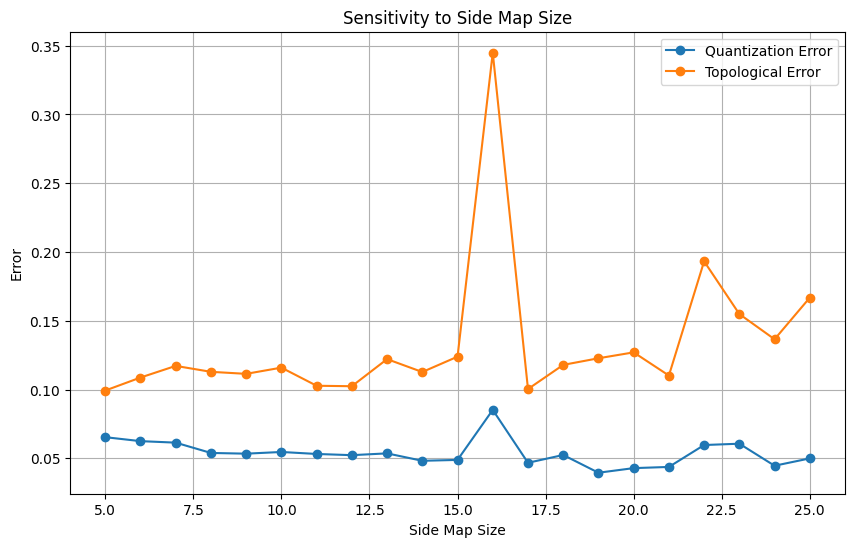

In [8]:
side_map_sensitivity = errors_df.groupby("side_map")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(side_map_sensitivity.index, side_map_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(side_map_sensitivity.index, side_map_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Side Map Size")
plt.ylabel("Error")
plt.title("Sensitivity to Side Map Size")
plt.legend()
plt.grid()
plt.show()

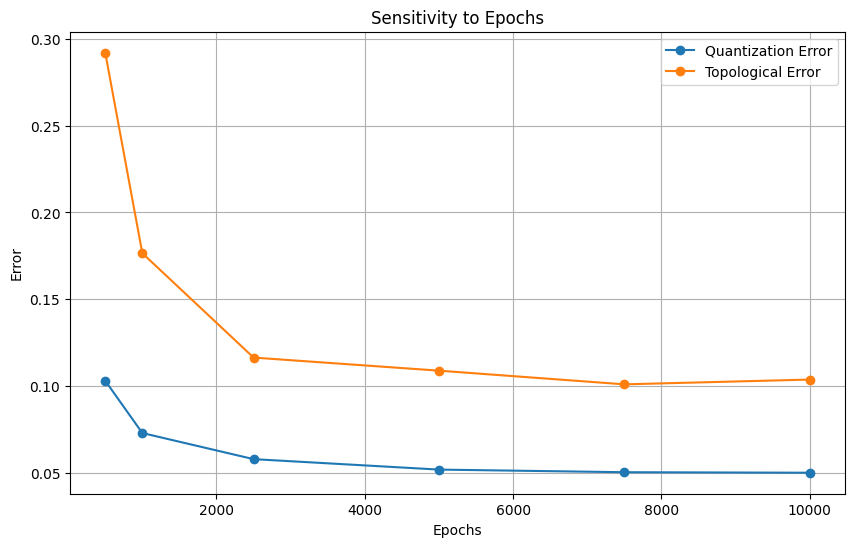

In [9]:
epochs_sensitivity = errors_df.groupby("epochs")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(epochs_sensitivity.index, epochs_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(epochs_sensitivity.index, epochs_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Sensitivity to Epochs")
plt.legend()
plt.grid()
plt.show()

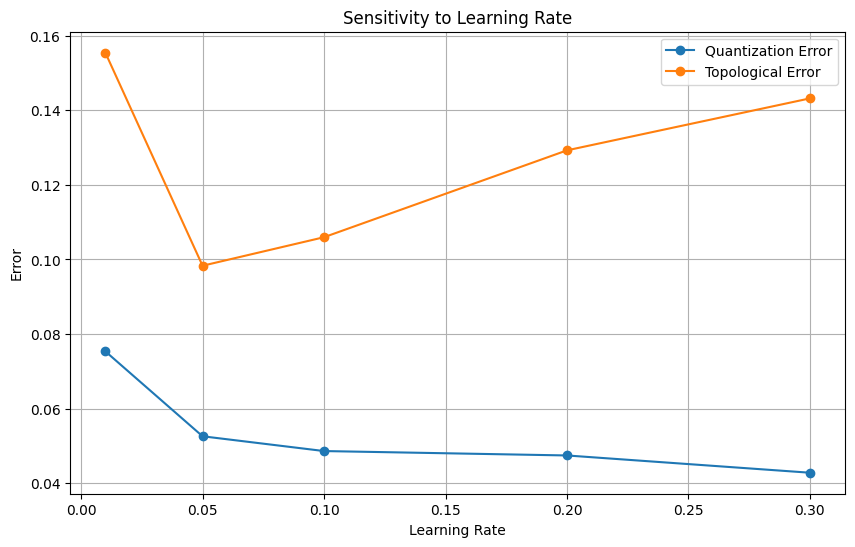

In [10]:
learning_rate_sensitivity = errors_df.groupby("learning_rate")[["quantization_error", "topological_error"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["quantization_error"], marker='o', label="Quantization Error")
plt.plot(learning_rate_sensitivity.index, learning_rate_sensitivity["topological_error"], marker='o', label="Topological Error")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Sensitivity to Learning Rate")
plt.legend()
plt.grid()
plt.show()